In [250]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", None)

# Oil and Gas Production and Emissions Data on the Norwegian Continental Shelf

## Part 3: Data Processing

---

This notebook is part of a series of notebooks. The series consist of other following parts:

#### Part 1: [Data Collection](https://github.com/percw/Norwegian_oil_gas_decarbonization/blob/main/notebooks/01_data_building/01_production_and_emission_data_building.ipynb)

#### Part 2: [Data Cleaning](https://github.com/percw/Norwegian_oil_gas_decarbonization/blob/main/notebooks/02_data_cleaning/02_production_and_emission_data_cleaning.ipynb)

---


This notebook aims to process the cleaned data from the previous notebook. It's based on the main dataframe called `fields_prod_emissions_1997_2023.csv`. The data will be processed to create statistics and visualizations that will help to understand the emissions, production and carbon intensity of Norwegian Oil and Gas production better. The dataframe contains over 60 different columns. A description follows.


### Table of Contents

1. [Data Loading](#Data-Loading)
2. [Data Description](#Data-Descritpion)
3. [Conversion Rates](#Conversion-Rates)
4. [Data Processing](#Data-Processing)
5. [Manual Data Registration](#Manual-Data-Registration)
6. [Calculating CO2 Equivalent Emissions](#Calculating-CO2-Equivalent-Emissions)
7. [Emission Intensity](#Emission-Intensity)
8. [Data Analysis: Explorative Data Analysis](#Data-Analysis:-Explorative-Data-Analysis)


### Data Loading


In [251]:
# Importing the dataset from the csv file
url_path = (
    "https://raw.githubusercontent.com/percw/Norwegian_oil_gas_decarbonization/main/"
)
filename = (
    "/data/output/emissions_and_production/cleaned/fields_prod_emissions_1997_2023.csv"
)

# Creating a check if import is successful
try:
    fields_prod_emissions_1997_2023_df = pd.read_csv("".join([url_path, filename]))
    print("Data import successful")
except:
    print("Data import failed")

Data import successful


In [252]:
fields_prod_emissions_1997_2023_df.info()
fields_prod_emissions_1997_2023_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 88 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   field                                       1803 non-null   object 
 1   year                                        1803 non-null   int64  
 2   net_oil_prod_yearly_mill_sm3                1803 non-null   float64
 3   net_gas_prod_yearly_bill_sm3                1803 non-null   float64
 4   net_ngl_prod_yearly_mill_sm3                1803 non-null   float64
 5   net_condensate_prod_yearly_mill_sm3         1803 non-null   float64
 6   net_oil_eq_prod_yearly_mill_sm3             1803 non-null   float64
 7   produced_water_yearly_mill_sm3              1803 non-null   float64
 8   field_id                                    1803 non-null   int64  
 9   net_oil_prod_monthly_sm3_volatility         1803 non-null   float64
 10  net_gas_prod

field  year  net_oil_prod_yearly_mill_sm3  \
0  statfjord nord  1997                       3.93531   
1      veslefrikk  1997                       3.47468   
2            frøy  1997                       1.39602   
3             hod  1997                       0.46766   
4      albuskjell  1997                       0.04615   

   net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
0                       0.17288                       0.09230   
1                       0.13919                       0.08596   
2                       0.28878                       0.00000   
3                       0.09469                       0.02645   
4                       0.19171                       0.02005   

   net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
0                              0.00000                          4.20051   
1                              0.00000                          3.69981   
2                              0.01732                          1.70211   
3                              0.00000                          0.58879   
4                              0.00000                          0.25789   

   produced_water_yearly_mill_sm3  field_id  \
0                             0.0     43679   
1                             0.0     43618   
2                             0.0     43597   
3                             0.0     43485   
4                             0.0     43437   

   net_oil_prod_monthly_sm3_volatility  net_gas_prod_monthly_sm3_volatility  \
0                             0.053898                             0.000405   
1                             0.052851                             0.008952   
2                             0.026260                             0.005287   
3                             0.003632                             0.001044   
4                             0.000487                             0.001819   

   net_ngl_prod_monthly_sm3_volatility  \
0                             0.000334   
1                             0.005461   
2                             0.000000   
3                             0.000238   
4                             0.000225   

   net_condensate_prod_monthly_sm3_volatility  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000942   
3                                    0.000000   
4                                    0.000000   

   net_oil_eq_prod_monthly_sm3_volatility  produced_water_in_field_volatility  \
0                                0.054005                                 0.0   
1                                0.053418                                 0.0   
2                                0.030860                                 0.0   
3                                0.004729                                 0.0   
4                                0.002297                                 0.0   

      status current_status  field_owner processing_field  field_in_emissions  \
0  Producing      Producing      21084.0        statfjord                True   
1  Producing      Shut down      21212.0       veslefrikk                True   
2  Producing      Shut down    3810636.0            frigg               False   
3  Producing      Producing      21052.0          valhall                True   
4  Producing      Shut down      20900.0       albuskjell               False   

   facilities_lifetime_mean  facilities_lifetime_std  \
0                      27.5                     15.0   
1                       NaN                      NaN   
2                       NaN                      NaN   
3                      30.0                      0.0   
4                       NaN                      NaN   

   facilities_water_depth_mean  facilities_water_depth_std  \
0                       241.75                   65.030121   
1                          NaN                         NaN   
2                       

### Data Description


#### Field Information

| Field              | Description                     | Unit    | Note |
| ------------------ | ------------------------------- | ------- | ---- |
| field              | Name of the field               | string  | -    |
| year               | Year of data                    | numeric | -    |
| field_id           | Unique identifier for the field | numeric | -    |
| status             | Status of the field             | string  | -    |
| current_status     | Current status of the field     | string  | -    |
| field_owner        | Owner of the field              | string  | -    |
| processing_field   | Processing field                | string  | -    |
| field_in_emissions | Field emissions status          | boolean | -    |

#### Production Data

| Field                               | Description                          | Unit           | Note |
| ----------------------------------- | ------------------------------------ | -------------- | ---- |
| net_oil_prod_yearly_mill_sm3        | Net oil production yearly            | million $sm^3$ | -    |
| net_gas_prod_yearly_bill_sm3        | Net gas production yearly            | billion $sm^3$ | -    |
| net_ngl_prod_yearly_mill_sm3        | Net NGL production yearly            | million $sm^3$ | -    |
| net_condensate_prod_yearly_mill_sm3 | Net condensate production yearly     | million $sm^3$ | -    |
| net_oil_eq_prod_yearly_mill_sm3     | Net oil equivalent production yearly | million $sm^3$ | -    |
| produced_water_yearly_mill_sm3      | Produced water yearly                | million $sm^3$ | -    |

#### Production Volatility

| Field                                      | Description                                      | Unit   | Note |
| ------------------------------------------ | ------------------------------------------------ | ------ | ---- |
| net_oil_prod_monthly_sm3_volatility        | Net oil production monthly volatility            | $sm^3$ | -    |
| net_gas_prod_monthly_sm3_volatility        | Net gas production monthly volatility            | $sm^3$ | -    |
| net_ngl_prod_monthly_sm3_volatility        | Net NGL production monthly volatility            | $sm^3$ | -    |
| net_condensate_prod_monthly_sm3_volatility | Net condensate production monthly volatility     | $sm^3$ | -    |
| net_oil_eq_prod_monthly_sm3_volatility     | Net oil equivalent production monthly volatility | $sm^3$ | -    |
| produced_water_in_field_volatility         | Produced water in field volatility               | $sm^3$ | -    |

#### Facilities Information

| Field                       | Description                                  | Unit   | Note |
| --------------------------- | -------------------------------------------- | ------ | ---- |
| facilities_lifetime_mean    | Mean lifetime of facilities                  | years  | -    |
| facilities_lifetime_std     | Standard deviation of facilities lifetime    | years  | -    |
| facilities_water_depth_mean | Mean water depth of facilities               | meters | -    |
| facilities_water_depth_std  | Standard deviation of facilities water depth | meters | -    |

#### Facilities Status

| Field                        | Description                             | Unit    | Note |
| ---------------------------- | --------------------------------------- | ------- | ---- |
| subsea_facilites_shut_down   | Number of subsea facilities shut down   | numeric | -    |
| surface_facilites_shut_down  | Number of surface facilities shut down  | numeric | -    |
| subsea_facilites_in_service  | Number of subsea facilities in service  | numeric | -    |
| surface_facilites_in_service | Number of surface facilities in service | numeric | -    |

#### Facility Types

| Field                               | Description                          | Unit    | Note |
| ----------------------------------- | ------------------------------------ | ------- | ---- |
| facility_kind_multi well template   | Facility type: multi well template   | numeric | -    |
| facility_kind_single well template  | Facility type: single well template  | numeric | -    |
| facility_kind_offshore wind turbine | Facility type: offshore wind turbine | numeric | -    |
| facility_kind_subsea structure      | Facility type: subsea structure      | numeric | -    |
| facility_kind_fpso                  | Facility type: FPSO                  | numeric | -    |
| facility_kind_jacket 8 legs         | Facility type: jacket with 8 legs    | numeric | -    |
| facility_kind_condeep monoshaft     | Facility type: condeep monoshaft     | numeric | -    |
| facility_kind_loading system        | Facility type: loading system        | numeric | -    |
| facility_kind_jacket 4 legs         | Facility type: jacket with 4 legs    | numeric | -    |
| facility_kind_jacket tripod         | Facility type: jacket tripod         | numeric | -    |
| facility_kind_fsu                   | Facility type: FSU                   | numeric | -    |
| facility_kind_semisub steel         | Facility type: semisub steel         | numeric | -    |
| facility_kind_condeep 4 shafts      | Facility type: condeep with 4 shafts | numeric | -    |
| facility_kind_landfall              | Facility type: landfall              | numeric | -    |
| facility_kind_tlp concrete          | Facility type: TLP concrete          | numeric | -    |
| facility_kind_jack-up 3 legs        | Facility type: jack-up with 3 legs   | numeric | -    |
| facility_kind_jacket 6 legs         | Facility type: jacket with 6 legs    | numeric | -    |
| facility_kind_tlp steel             | Facility type: TLP steel             | numeric | -    |
| facility_kind_semisub concrete      | Facility type: semisub concrete      | numeric | -    |
| facility_kind_mopustor              | Facility type: mopustor              | numeric | -    |
| facility_kind_spar                  | Facility type: spar                  | numeric | -    |

#### Well Status

| Field                          | Description                              | Unit    | Note                     |
| ------------------------------ | ---------------------------------------- | ------- | ------------------------ |
| well_status_closed             | Well status: closed                      | numeric | total accumulated yearly |
| well_status_drilling           | Well status: drilling                    | numeric | total accumulated yearly |
| well_status_injecting          | Well status: injecting                   | numeric | total accumulated yearly |
| well_status_junked             | Well status: junked                      | numeric | total accumulated yearly |
| well_status_online/operational | Well status: online/operational          | numeric | total accumulated yearly |
| well_status_p&a                | Well status: P&A (plugged and abandoned) | numeric | total accumulated yearly |
| well_status_plugged            | Well status: plugged                     | numeric | total accumulated yearly |
| well_status_producing          | Well status: producing                   | numeric | total accumulated yearly |
| well_status_suspended          | Well status: suspended                   | numeric | total accumulated yearly |

#### Well Purpose

| Field                    | Description               | Unit    | Note |
| ------------------------ | ------------------------- | ------- | ---- |
| well_purpose_injection   | Well purpose: injection   | numeric | -    |
| well_purpose_observation | Well purpose: observation | numeric | -    |
| well_purpose_production  | Well purpose: production  | numeric | -    |

#### Well Information

| Field                          | Description                                         | Unit    | Note                         |
| ------------------------------ | --------------------------------------------------- | ------- | ---------------------------- |
| well_subsea_no                 | Well subsea: no                                     | boolean |                              |
| well_subsea_yes                | Well subsea: yes                                    | boolean |                              |
| well_final_vertical_depth_mean | Mean final vertical depth of wells                  | meters  | average for field            |
| well_final_vertical_depth_std  | Standard deviation of final vertical depth of wells | meters  | standard deviation for field |
| well_water_depth_mean          | Mean water depth of wells                           | meters  | average for field            |
| well_water_depth_std           | Standard deviation of water depth of wells          | meters  | standard deviation for field |

#### Financial and Environmental Data

| Field                            | Description                                       | Unit              | Note |
| -------------------------------- | ------------------------------------------------- | ----------------- | ---- |
| investments_mill_nok             | Investments                                       | million NOK       | -    |
| future_investments_mill_nok      | Future investments                                | million NOK       | -    |
| yearly_co2_emissions_1000_tonnes | Yearly CO2 emissions                              | 1000 tonnes       | -    |
| yearly_ch4_emissions_tons        | Yearly CH4 emissions                              | tons              | -    |
| yearly_nox_emissions_tons        | Yearly emissions                                  | tons              | -    |
| yearly_oil_spill_emissions_tons  | Yearly oil spill emissions                        | tons              | -    |
| yearly_water_emissions_m3        | Yearly water emissions                            | cubic meters (m3) | -    |
| org_number                       | Organization number                               | numeric           | -    |
| operator                         | Operator of the field                             | string            | -    |
| ownership_original               | Ownership structure, as reported                  | object            | -    |
| ownership_new_name               | Ownership structure, cleaned (mostly due to M&As) | object            | -    |

#### Remaining Recoverable Reserves

| Field                             | Description                   | Unit           | Note |
| --------------------------------- | ----------------------------- | -------------- | ---- |
| current_remaining_recoverable_oil | As of 2023                    | million $sm^3$ | -    |
| current_remaining_recoverable_gas | As of 2023                    | billion $sm^3$ | -    |
| current_remaining_recoverable_ngl | As of 2023                    | million $sm^3$ | -    |
| current_remaining_recoverable_oe  | As of 2023                    | million $sm^3$ | -    |
| original_recoverable_oil          | Original total reserve volume | million $sm^3$ | -    |
| original_recoverable_gas          | Original total reserve volume | billion $sm^3$ | -    |
| original_recoverable_ngl          | Original total reserve volume | million $sm^3$ | -    |
| original_recoverable_oe           | Original total reserve volume | million $sm^3$ | -    |


### Conversion Rates

#### NGL, Oil, Gas, and Condensate to Oil Equivalent


To accurately compare and aggregate different types of petroleum products such as Natural Gas Liquids (NGL), crude oil, natural gas, and condensate, we use a common unit of measurement called the oil equivalent (o.e.). We'll explain the conversion rates typically used to convert these substances into oil equivalents, based on sources from the Norwegian Petroleum Directorate and the International Energy Agency (IEA).

#### Conversion Factors

According to the Norwegian Petroleum Directorate, the following conversion factors are used:

1. **Crude Oil:**
   $
   1 \text{ Sm}^3 \text{ oil} = 1 \text{ Sm}^3 \text{ o.e.}
   $

2. **Condensate:**
   $
   1 \text{ Sm}^3 \text{ condensate} = 1 \text{ Sm}^3 \text{ o.e.}
   $

3. **Natural Gas:**
   $
   1000 \text{ Sm}^3 \text{ gas} = 1 \text{ Sm}^3 \text{ o.e.}
   $

4. **NGL:**
   $
   1 \text{ Sm}^3 \text{ NGL} = 1 \text{ Sm}^3 \text{ o.e.}
   $
   $
   1 \text{ tonne NGL} = 1.9 \text{ Sm}^3 \text{ o.e.}
   $

#### Additional Conversions

For other conversions between units typically used in the energy sector, the IEA provides these factors:

- **Standard Cubic Meters (Sm³) to Barrels:**
  $
  1 \text{ Sm}^3 = 6.2898 \text{ barrels} (\text{bbl})
  $
  $
  1 \text{ bbl} = 0.1590 \text{ Sm}^3
  $

- **Energy Content:**
  $
  1 \text{ Sm}^3 \text{ natural gas} \approx 40 \text{ MJ}
  $
  $
  1 \text{ Sm}^3 \text{ crude oil} \approx 36,000 \text{ MJ}
  $

#### Practical Application

Using these conversion factors, we can convert the quantities of NGL, oil, gas, and condensate into a single unit of measurement, facilitating easier comparison and aggregation for analysis and reporting purposes.

$
\text{Oil Equivalent} (\text{Sm}^3 \text{ o.e.}) = \begin{cases} 
\text{Volume of Oil} (\text{Sm}^3) \\
\text{Volume of Condensate} (\text{Sm}^3) \\
\frac{\text{Volume of Gas} (\text{Sm}^3)}{1000} \\
\text{Volume of NGL} (\text{Sm}^3) \\
1.9 \times \text{Mass of NGL (tonnes)}
\end{cases}
$

#### Other Useful Conversions

$1Sm_3 	 ≈ 	40 MJ = 11.111 kWh$

$1Sm_3 	 ≈ 	37913 \text{ BTU (British Thermal Units)}$

$1Sm_3 	 ≈ 	6.2898 \text{ bbl (barrels)}$

$1Sm_3 	 ≈ 	0.84 \text{ toe (tonne of oil eq)}$

#### Further Reading

For more detailed information, you can visit the sources:

- [Norwegian Petroleum Directorate](https://www.norskpetroleum.no/en/calculator/about-energy-calculator/)
- [IEA Unit Converter](https://www.iea.org/data-and-statistics/data-tools/unit-converter)


### Data Processing


For some fields, we need to estimate the emissions based on production. This is due to the fact that some facilites transport their production directly and hence do not have emissions.


In [253]:
# Fields where emissions in NaN

field_without_emissions = fields_prod_emissions_1997_2023_df[
    fields_prod_emissions_1997_2023_df["field_in_emissions"] == False
].field.unique()

# Checking which of the fields without emissions have processing_field set

fields_without_emissions_and_processing_field = fields_prod_emissions_1997_2023_df[
    (fields_prod_emissions_1997_2023_df["field_in_emissions"] == False)
    & (fields_prod_emissions_1997_2023_df["processing_field"].isna())
].field.unique()
fields_without_emissions_and_processing_field

array(['cod', 'edda', 'murchison'], dtype=object)

In [254]:
# Removing cod, edda and murchison from the the dataframe

fields_prod_emissions_1997_2023_df = fields_prod_emissions_1997_2023_df[
    ~fields_prod_emissions_1997_2023_df["field"].isin(["cod", "edda", "murchison"])
]

In [255]:
# Checking which fields are their own processing field and is not in the emission data

fields_own_processing_field = fields_prod_emissions_1997_2023_df[
    (
        fields_prod_emissions_1997_2023_df["field"]
        == fields_prod_emissions_1997_2023_df["processing_field"]
    )
    & (fields_prod_emissions_1997_2023_df["field_in_emissions"] == False)
]

fields_own_processing_field

field  year  net_oil_prod_yearly_mill_sm3  \
4    albuskjell  1997                       0.04615   
18        frigg  1997                       0.00000   
53   albuskjell  1998                       0.02955   
73        frigg  1998                       0.00000   
115       frigg  1999                       0.00000   
144       frigg  2000                       0.00000   
199       frigg  2001                       0.00000   
208       frigg  2002                       0.00000   
263       frigg  2003                       0.00000   
337       frigg  2004                       0.00000   

     net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
4                         0.19171                       0.02005   
18                        0.47991                       0.00000   
53                        0.10564                       0.01160   
73                        0.60081                       0.00000   
115                       0.33227                       0.00000   
144                       0.60258                       0.00000   
199                       0.73724                       0.00000   
208                       0.71699                       0.00000   
263                       0.70768                       0.00000   
337                       0.86317                       0.00000   

     net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
4                                0.00000                          0.25789   
18                               0.00023                          0.48016   
53                               0.00000                          0.14678   
73                               0.00059                          0.60143   
115                              0.00030                          0.33257   
144                              0.00051                          0.60310   
199                              0.00232                          0.73957   
208                              0.00130                          0.71831   
263                              0.00116                          0.70882   
337                              0.00118                          0.86433   

     produced_water_yearly_mill_sm3  field_id  \
4                           0.00000     43437   
18                          0.00000     43555   
53                          0.00000     43437   
73                          0.00000     43555   
115                         0.00000     43555   
144                         0.00545     43555   
199                         0.00508     43555   
208                         0.00377     43555   
263                         0.00178     43555   
337                         0.04884     43555   

     net_oil_prod_monthly_sm3_volatility  net_gas_prod_monthly_sm3_volatility  \
4                               0.000487                             0.001819   
18                              0.000000                             0.026888   
53                              0.000205                             0.000837   
73                              0.000000                             0.026859   
115                             0.000000                             0.023888   
144                             0.000000                             0.017307   
199                             0.000000                             0.016395   
208                             0.000000                             0.010989   
263                             0.000000                             0.007793   
337                             0.000000                             0.040042   

     net_ngl_prod_monthly_sm3_volatility  \
4                               0.000225   
18                              0.000000   
53                              0.000161   
73                              0.000000   
115                             0.000000   
144                             0.000000   
199                             0.000000   
208                             0.

In [256]:
# Removing frigg and albuskjell from the main df

fields_prod_emissions_1997_2023_df = fields_prod_emissions_1997_2023_df[
    ~fields_prod_emissions_1997_2023_df["field"].isin(["frigg", "albuskjell"])
]

#### CO2 Equivalent Emissions

$ CO_2E \text{(GWP100)} = CO_2 + (CH_4 \times 30) + (N_2O \times 296)$

$ CO_2E \text{(GWP20)} = CO_2 + (CH_4 \times 84) + (N_2O \times 296)$

Source: [IPCC (for GWP100)](https://www.ipcc.ch/site/assets/uploads/2018/03/TAR-04.pdf), [IEA (for GWP20)](https://www.iea.org/reports/methane-tracker-2021/methane-and-climate-change)


In [344]:
# Computing the co2e per field
# GWP100
fields_prod_emissions_1997_2023_df["yearly_tco2e_gwp100"] = (
    fields_prod_emissions_1997_2023_df["yearly_co2_emissions_1000_tonnes"] * 1000
    + fields_prod_emissions_1997_2023_df["yearly_ch4_emissions_tons"] * 30
    + fields_prod_emissions_1997_2023_df["yearly_nox_emissions_tons"] * 296
)

# GWP20
fields_prod_emissions_1997_2023_df["yearly_tco2e_gwp20"] = (
    fields_prod_emissions_1997_2023_df["yearly_co2_emissions_1000_tonnes"] * 1000
    + fields_prod_emissions_1997_2023_df["yearly_ch4_emissions_tons"] * 84
    + fields_prod_emissions_1997_2023_df["yearly_nox_emissions_tons"] * 296
)

### Manual Data Registration


Adding electrification data to the dataframe.

Fields directly connected to shore grid:

- Troll A: Electrified in 1996, 195-218 MW.
- Johan Sverdrup: Electrified in 2019, 100-300 MW. Includes other fields at “utsirahøyden”:
  - Edvard Grieg electrified in 2022
    - Solveig electrified in 2022
    - Ivar Aasen electrified in 2022
  - Gina Krog electrified in 2022
  - Sleipner Øst
- Nyhamna /Ormen Lange (ocean floor field)/: Electrified in 2007, 300 MW
- Gjøa: Electrified in 2010, 65 MW. Gjøa is host power facility for:
  - Vega electrified in 2010
  - Duva electrified in 2021
  - Nova electrified in 2022
- Martin Linge: Electrified in 2018, 55 MW
- Goliat: Electrified in 2016, 70 MW
- Valhall, electrified in 2010, 78 MW. Valhall is host power facility for:
  - Hod electrified in 2012
- Gullfaks: Partly electrified in 2023 with power from Haywind Tampen
- Snorre: Partly electrified in 2023 with power from Haywind Tampen

Further data can be found on [Offshore Norge's](https://www.offshorenorge.no/rapporter/klima-og-miljo/feltspesifikke-utslipp-2023/) website.


In [258]:
fields_electricity_data = [
    {
        "field": "troll",
        "year_electrified": 1996,
        "power_capacity_MW": 200,
        "imported_power_2023_gwh/y": 1282,
    },
    {
        "field": "gullfaks",
        "year_electrified": 2023,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": 108,
    },
    {
        "field": "snorre",
        "year_electrified": 2023,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": 75,
    },
    {
        "field": "johan sverdrup",
        "year_electrified": 2019,
        "power_capacity_MW": 200,
        "imported_power_2023_gwh/y": 632,
    },
    {
        "field": "edvard grieg",
        "year_electrified": 2022,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": 328,
    },
    {
        "field": "solveig",
        "year_electrified": 2022,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": None,
    },
    {
        "field": "ivar aasen",
        "year_electrified": 2007,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": 146,
    },
    {
        "field": "gina krog",
        "year_electrified": 2022,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": 1.97,
    },
    {
        "field": "sleipner øst",
        "year_electrified": 2007,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": 0,
    },
    {
        "field": "ormen lange",
        "year_electrified": 2007,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": None,
    },
    {
        "field": "vega",
        "year_electrified": 2010,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": None,
    },
    {
        "field": "duva",
        "year_electrified": 2021,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": None,
    },
    {
        "field": "nova",
        "year_electrified": 2022,
        "power_capacity_MW": None,
        "imported_power_2023_gwh/y": None,
    },
    {
        "field": "gjøa",
        "year_electrified": 2010,
        "power_capacity_MW": 65,
        "imported_power_2023_gwh/y": 357,
    },
    {
        "field": "martin linge",
        "year_electrified": 2018,
        "power_capacity_MW": 55,
        "imported_power_2023_gwh/y": 224,
    },
    {
        "field": "goliat",
        "year_electrified": 2016,
        "power_capacity_MW": 70,
        "imported_power_2023_gwh/y": 414,
    },
    {
        "field": "valhall",
        "year_electrified": 2010,
        "power_capacity_MW": 78,
        "imported_power_2023_gwh/y": 388,
    },
    {
        "field": "hod",
        "year_electrified": 2010,
        "power_capacity_MW": 78,
        "imported_power_2023_gwh/y": None,
    },
]

# Valhall and Hod are the same field, but the electricity data is split between the two fields

#### Remark on Electrification Data

For statistical tests i propose using the following fields for checking the effect of electrification on emissions:

- Troll
- Gullfaks
- Snorre
- Johan Sverdrup
- Edvard Grieg
- Ivar Aasen
- Gina Krog
- Gjøa
- Martin Linge
- Golia
- Valhall

We can assume that the power delivered is 100% renewable as Norways electricity mix consists of 98% hydro power.


In [259]:
# Adding electrification data to the fields_prod_emissions_1997_2023_df

# Add new columns with default values
fields_prod_emissions_1997_2023_df["electrified"] = 0
fields_prod_emissions_1997_2023_df["years_electrified"] = 0
fields_prod_emissions_1997_2023_df["electricity_mw"] = 0
fields_prod_emissions_1997_2023_df["imported_power_2023_gwh/y"] = 0

# Loop through fields_electricity_data and update the DataFrame
for field_data in fields_electricity_data:
    field_name = field_data["field"].lower()
    year_electrified = field_data["year_electrified"]
    power_capacity_MW = field_data["power_capacity_MW"]
    imported_power = field_data["imported_power_2023_gwh/y"]

    # Calculate the number of years electrified
    years_electrified = 2023 - year_electrified if year_electrified else 0

    # Update the DataFrame
    fields_prod_emissions_1997_2023_df.loc[
        fields_prod_emissions_1997_2023_df["field"] == field_name, "electrified"
    ] = 1
    fields_prod_emissions_1997_2023_df.loc[
        fields_prod_emissions_1997_2023_df["field"] == field_name, "years_electrified"
    ] = years_electrified
    fields_prod_emissions_1997_2023_df.loc[
        fields_prod_emissions_1997_2023_df["field"] == field_name, "electricity_mw"
    ] = power_capacity_MW if power_capacity_MW else 0
    fields_prod_emissions_1997_2023_df.loc[
        fields_prod_emissions_1997_2023_df["field"] == field_name,
        "imported_power_2023_gwh/y",
    ] = imported_power if imported_power else 0

# Display the updated DataFrame
fields_prod_emissions_1997_2023_df

field  year  net_oil_prod_yearly_mill_sm3  \
0     statfjord nord  1997                       3.93531   
1         veslefrikk  1997                       3.47468   
2               frøy  1997                       1.39602   
3                hod  1997                       0.46766   
5                yme  1997                       1.97977   
...              ...   ...                           ...   
1798      visund sør  2023                       0.05782   
1799           skuld  2023                       0.02175   
1800         byrding  2023                       0.01183   
1801            hyme  2023                       0.30909   
1802       statfjord  2023                       0.72349   

      net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
0                          0.17288                       0.09230   
1                          0.13919                       0.08596   
2                          0.28878                       0.00000   
3                          0.09469                       0.02645   
5                          0.00000                       0.00000   
...                            ...                           ...   
1798                       0.11078                       0.02729   
1799                       0.00000                       0.00000   
1800                       0.00000                       0.00000   
1801                       0.05169                       0.03130   
1802                       0.65238                       0.25352   

      net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
0                                 0.00000                          4.20051   
1                                 0.00000                          3.69981   
2                                 0.01732                          1.70211   
3                                 0.00000                          0.58879   
5                                 0.00000                          1.97977   
...                                   ...                              ...   
1798                              0.00000                          0.19589   
1799                              0.00000                          0.02175   
1800                              0.00000                          0.01183   
1801                              0.00000                          0.39208   
1802                              0.00000                          1.62934   

      produced_water_yearly_mill_sm3  field_id  \
0                            0.00000     43679   
1                            0.00000     43618   
2                            0.00000     43597   
3                            0.00000     43485   
5                            0.00000     43807   
...                              ...       ...   
1798                         0.00596  20461008   
1799                         0.10527  21350124   
1800                         0.00000  28975067   
1801                         0.29335  20474183   
1802                        12.13402     43658   

      net_oil_prod_monthly_sm3_volatility  \
0                                0.053898   
1                                0.052851   
2                                0.026260   
3                                0.003632   
5                                0.056455   
...                                   ...   
1798                             0.008405   
1799                             0.002882   
1800                             0.000421   
1801                             0.018244   
1802                             0.015100   

      net_gas_prod_monthly_sm3_volatility  \
0                                0.000405   
1                                0.008952   
2                                0.005287   
3                                0.001044   
5                                0.000000   
...                                   ...   
1798                             0.019391   
1799                             0.000

In [260]:
display(fields_prod_emissions_1997_2023_df.electrified.unique())
display(fields_prod_emissions_1997_2023_df["imported_power_2023_gwh/y"].unique())
display(fields_prod_emissions_1997_2023_df.years_electrified.unique())

array([0, 1])

array([   0.  ,  388.  , 1282.  ,  108.  ,   75.  ,  357.  ,  328.  ,
        146.  ,  414.  ,    1.97,  632.  ,  224.  ])

array([ 0, 13, 27, 16,  1,  7,  4,  5,  2])

In [261]:
# Electrified fields to plot

electrified_fields_to_plot_df = fields_prod_emissions_1997_2023_df[
    fields_prod_emissions_1997_2023_df["electrified"] == 1
]

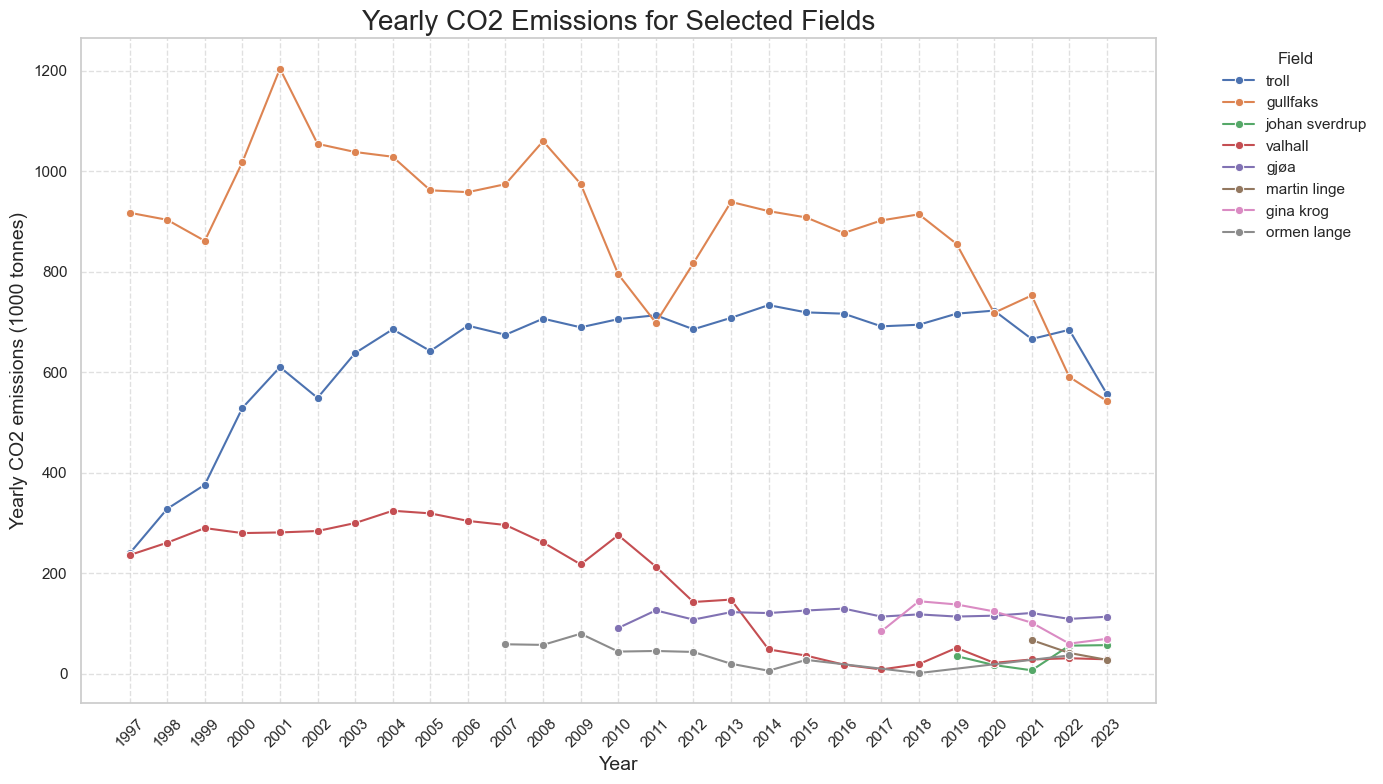

In [262]:
# Set up the plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

fields_to_plot = [
    "troll",
    "gullfaks",
    "johan sverdrup",
    "snorre" "goliat",
    "valhall",
    "gjøa",
    "martin linge",
    "gina krog",
    "ormen lange",
]

# Plot each field's data
for field in fields_to_plot:
    field_data = electrified_fields_to_plot_df[
        electrified_fields_to_plot_df["field"] == field
    ]
    sns.lineplot(
        data=field_data,
        x="year",
        y="yearly_co2_emissions_1000_tonnes",
        label=field,
        marker="o",
    )


# Customize the plot
plt.title("Yearly CO2 Emissions for Selected Fields", fontsize=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Yearly CO2 emissions (1000 tonnes)", fontsize=14)
plt.xticks(rotation=45)
plt.xticks(np.arange(1997, 2024, 1))
plt.legend(title="Field", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=False)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

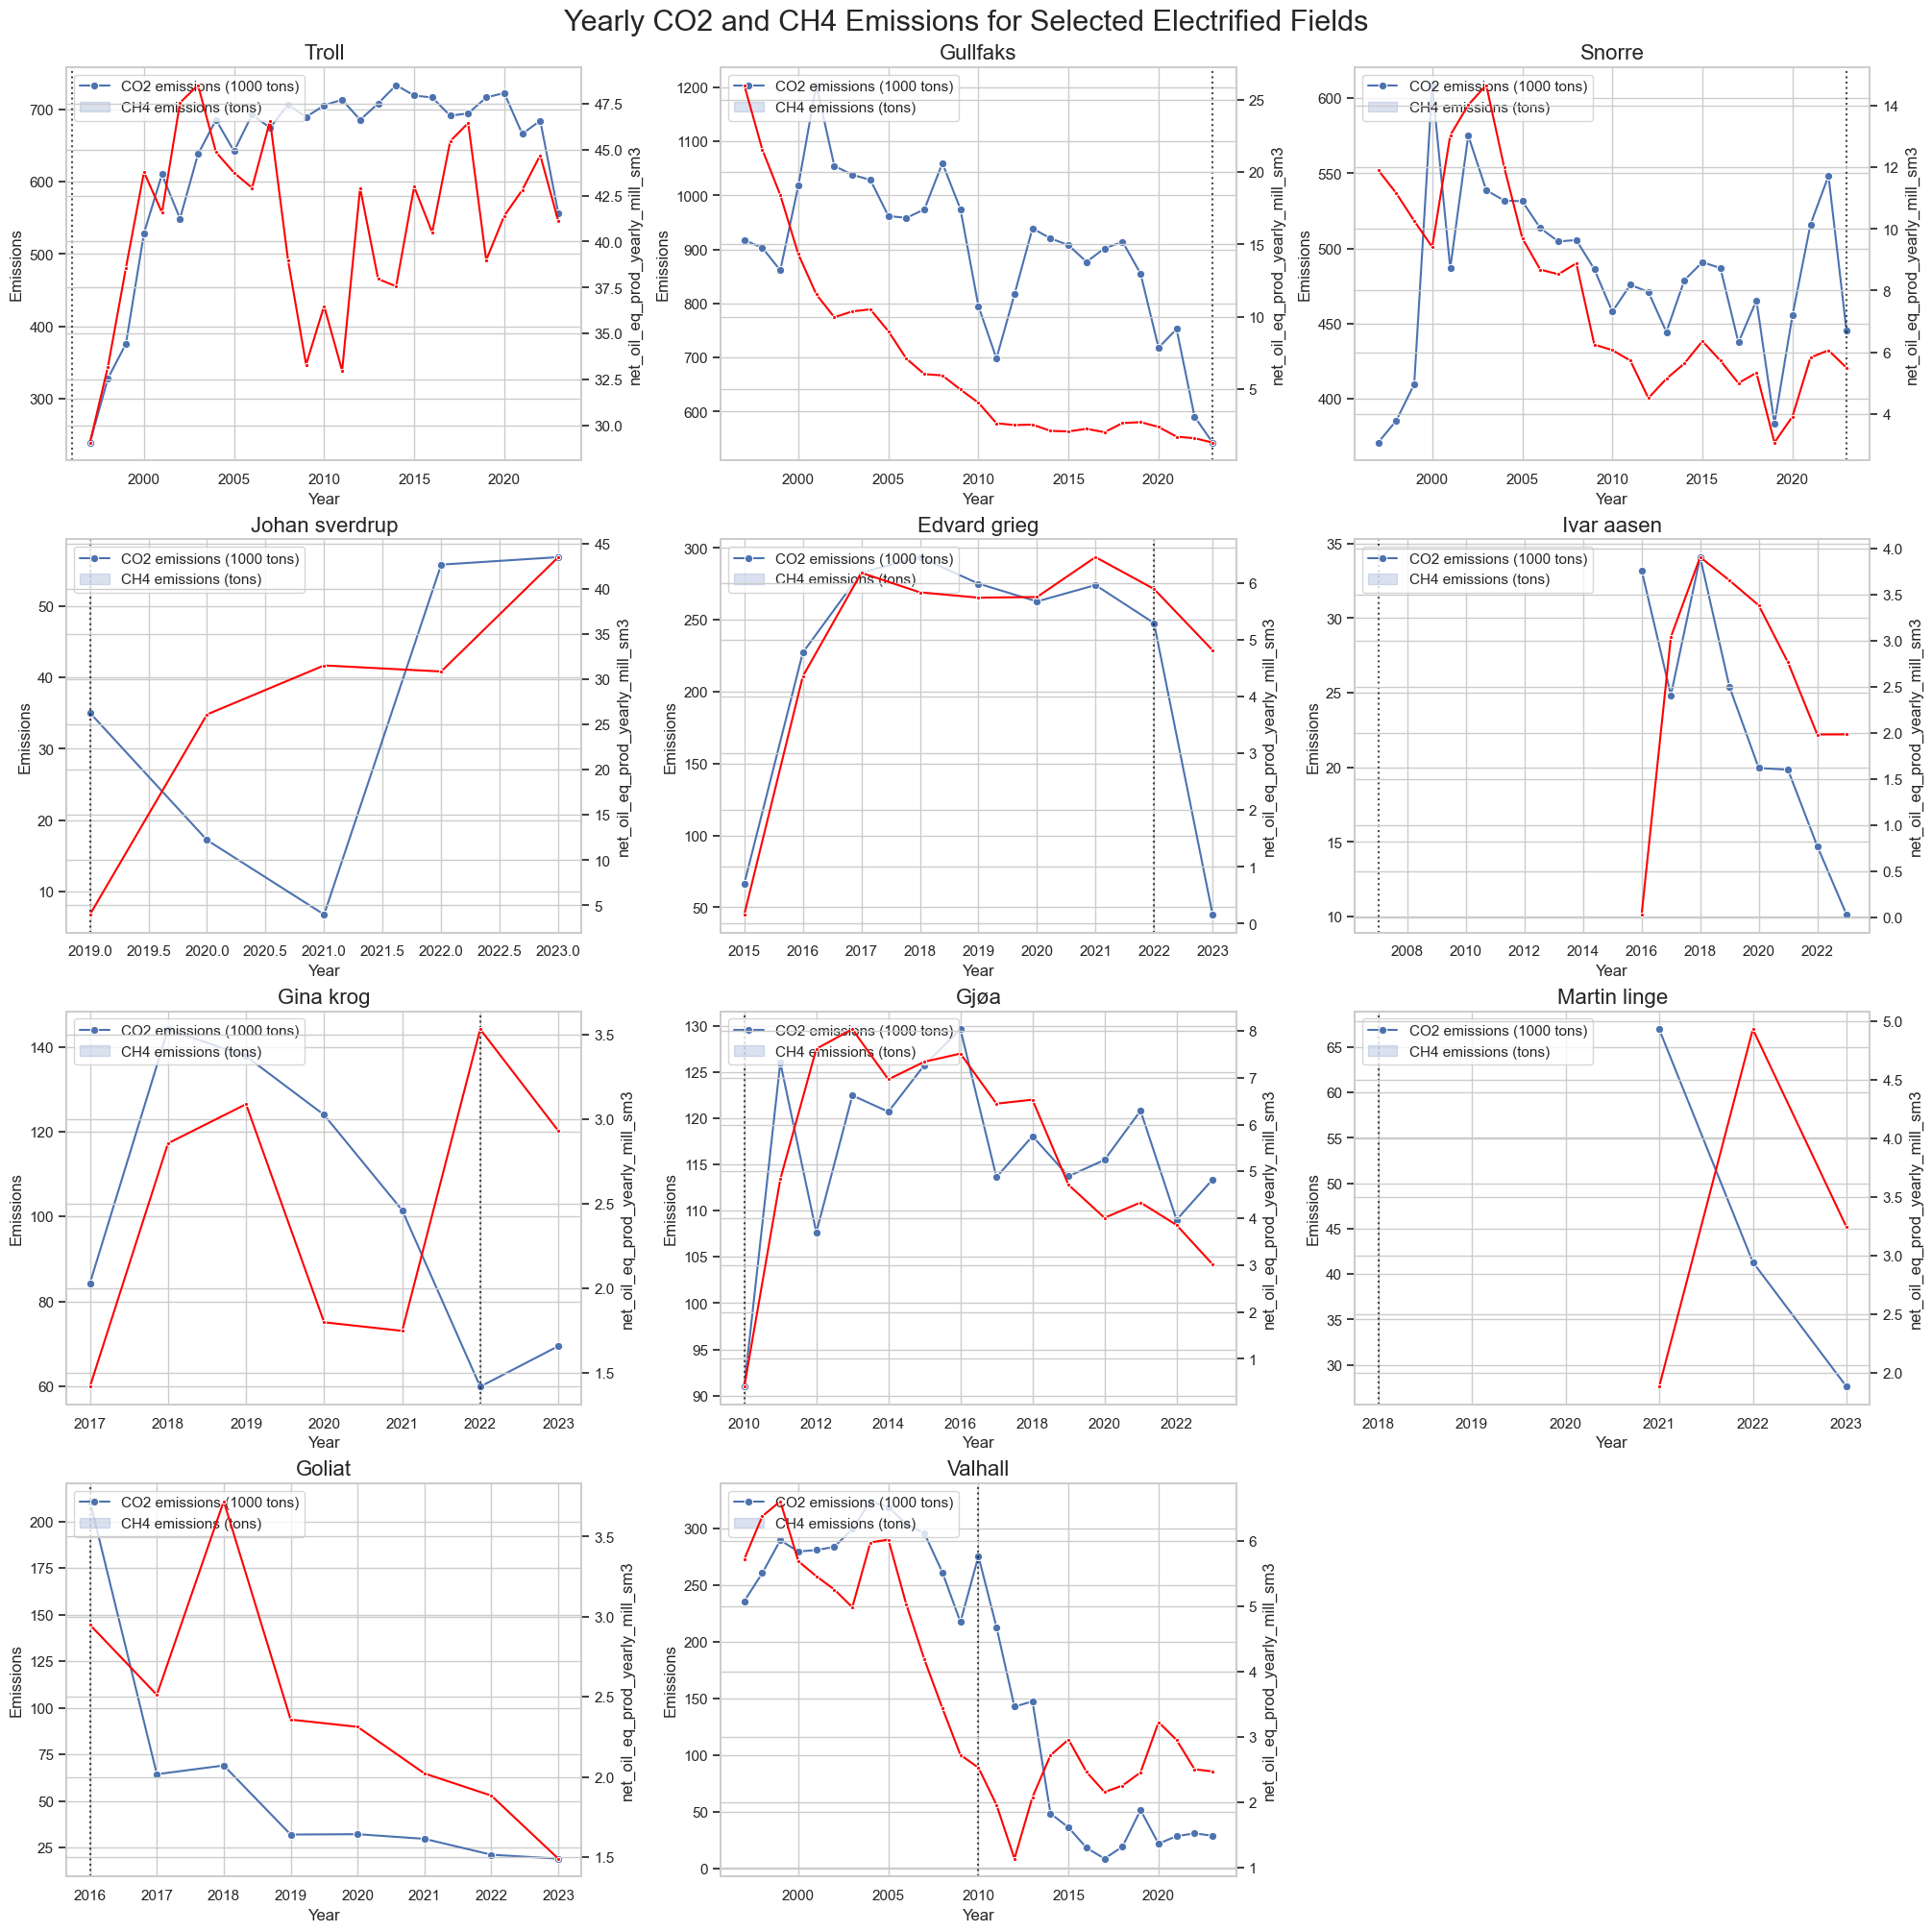

In [263]:
# Fields to plot
fields_to_plot = [
    "troll",
    "gullfaks",
    "snorre",
    "johan sverdrup",
    "edvard grieg",
    "ivar aasen",
    "gina krog",
    "gjøa",
    "martin linge",
    "goliat",
    "valhall",
]

# Set up the plot grid
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20), constrained_layout=True)
axes = axes.flatten()

# Plot each field's data in its own subplot
for i, field in enumerate(fields_to_plot):
    ax = axes[i]
    field_data = electrified_fields_to_plot_df[
        electrified_fields_to_plot_df["field"] == field
    ]
    sns.lineplot(
        data=field_data,
        x="year",
        y="yearly_co2_emissions_1000_tonnes",
        ax=ax,
        marker="o",
    )

    # sns.lineplot(
    #    data=field_data,
    #    x="year",
    #    y="yearly_ch4_emissions_tons",
    #    ax=ax,
    #    marker=".",
    #    # color = navy blue
    #    color="#001f3f",
    # )

    # plot production data as a secondary y-axis
    ax2 = ax.twinx()
    sns.lineplot(
        data=field_data,
        x="year",
        y="net_oil_eq_prod_yearly_mill_sm3",
        ax=ax2,
        marker=".",
        color="red",
    )

    field_title = field.capitalize()
    ax.set_title(f"{field_title}", fontsize=16)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Emissions", fontsize=12)
    ax.grid(True)

    # Adding a legend
    ax.legend(["CO2 emissions (1000 tons)", "CH4 emissions (tons)"], loc="upper left")

    # Add a vertical line for the electrification year
    for field_data in fields_electricity_data:
        if field_data["field"] == field:
            year_electrified = field_data["year_electrified"]
            ax.axvline(x=year_electrified, color="black", linestyle=":", alpha=0.7)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a main title
plt.suptitle(
    "Yearly CO2 and CH4 Emissions for Selected Electrified Fields", fontsize=22
)
plt.show()

In [264]:
# Calculating average emission intensity for electrified fields

# Filter the DataFrame for electrified fields
electrified_fields_df = fields_prod_emissions_1997_2023_df[
    fields_prod_emissions_1997_2023_df["electrified"] == 1
]

# Calculate the average emission intensity for each field
electrified_fields_int = (
    electrified_fields_df["yearly_co2_emissions_1000_tonnes"].sum()
    / electrified_fields_df["net_oil_eq_prod_yearly_mill_sm3"].sum()
)

print(electrified_fields_int)

# Calculating average emission intensity for non-electrified fields

# Filter the DataFrame for non-electrified fields
non_electrified_fields_df = fields_prod_emissions_1997_2023_df[
    fields_prod_emissions_1997_2023_df["electrified"] == 0
]

# Calculate the average emission intensity for each field
non_electrified_fields_int = (
    non_electrified_fields_df["yearly_co2_emissions_1000_tonnes"].sum()
    / non_electrified_fields_df["net_oil_eq_prod_yearly_mill_sm3"].sum()
)

print(non_electrified_fields_int)

30.656797971023398
51.995706712434675


In [265]:
fields_prod_emissions_1997_2023_df[
    fields_prod_emissions_1997_2023_df["electrified"] == 1
]

field  year  net_oil_prod_yearly_mill_sm3  \
3                hod  1997                       0.46766   
17           valhall  1997                       4.52686   
24             troll  1997                      14.76705   
31          gullfaks  1997                      24.12130   
34      sleipner øst  1997                       0.00000   
...              ...   ...                           ...   
1775    sleipner øst  2023                       0.01610   
1779  johan sverdrup  2023                      41.28919   
1780    edvard grieg  2023                       4.14002   
1785            vega  2023                       0.38256   
1791         valhall  2023                       2.00528   

      net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
3                          0.09469                       0.02645   
17                         0.94041                       0.25121   
24                        14.31718                       0.00000   
31                         1.68412                       0.18906   
34                         7.50047                       2.18703   
...                            ...                           ...   
1775                       0.08822                       0.00528   
1779                       1.38139                       0.82222   
1780                       0.42522                       0.25418   
1785                       1.62195                       0.44182   
1791                       0.34347                       0.12560   

      net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
3                                 0.00000                          0.58879   
17                                0.00000                          5.71849   
24                                0.00000                         29.08419   
31                                0.00000                         25.99445   
34                                2.69961                         12.38711   
...                                   ...                              ...   
1775                              0.00000                          0.10958   
1779                              0.00000                         43.49277   
1780                              0.00000                          4.81942   
1785                              0.00000                          2.44633   
1791                              0.00000                          2.47432   

      produced_water_yearly_mill_sm3  field_id  \
3                            0.00000     43485   
17                           0.00000     43548   
24                           0.00000     46437   
31                           0.00000     43686   
34                           0.00000     43478   
...                              ...       ...   
1775                         0.01414     43478   
1779                         3.46195  26376286   
1780                         3.04165  21675433   
1785                         0.02702   4467595   
1791                         0.66691     43548   

      net_oil_prod_monthly_sm3_volatility  \
3                                0.003632   
17                               0.034498   
24                               0.113838   
31                               0.376821   
34                               0.000000   
...                                   ...   
1775                             0.000484   
1779                             0.268379   
1780                             0.048319   
1785                             0.008115   
1791                             0.031634   

      net_gas_prod_monthly_sm3_volatility  \
3                                0.001044   
17                               0.004204   
24                               0.497360   
31                               0.037515   
34                               0.135725   
...                                   ...   
1775                             0.001789   
1779                             0.020

In [266]:
# Calculating the average emission intensity for electrified fields only during the years they are electrified, and make sure that the year is greater than 2023-years_electrified

# Filter the DataFrame for electrified fields
electrified_intra_fields_df = fields_prod_emissions_1997_2023_df[
    (fields_prod_emissions_1997_2023_df["electrified"] == 1)
    & (
        fields_prod_emissions_1997_2023_df["year"]
        > (2023 - fields_prod_emissions_1997_2023_df["years_electrified"])
    )
]

electrified_intra_fields_df

field  year  net_oil_prod_yearly_mill_sm3  \
24             troll  1997                      14.76705   
59             troll  1998                      13.25389   
114            troll  1999                      12.90877   
130            troll  2000                      18.36151   
196            troll  2001                      19.50288   
...              ...   ...                           ...   
1775    sleipner øst  2023                       0.01610   
1779  johan sverdrup  2023                      41.28919   
1780    edvard grieg  2023                       4.14002   
1785            vega  2023                       0.38256   
1791         valhall  2023                       2.00528   

      net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
24                        14.31718                       0.00000   
59                        19.95431                       0.00000   
114                       25.46137                       0.00000   
130                       24.66589                       0.00000   
196                       21.43322                       0.00000   
...                            ...                           ...   
1775                       0.08822                       0.00528   
1779                       1.38139                       0.82222   
1780                       0.42522                       0.25418   
1785                       1.62195                       0.44182   
1791                       0.34347                       0.12560   

      net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
24                                0.00000                         29.08419   
59                                0.00000                         33.20822   
114                               0.21754                         38.58770   
130                               0.75031                         43.77769   
196                               0.63947                         41.57560   
...                                   ...                              ...   
1775                              0.00000                          0.10958   
1779                              0.00000                         43.49277   
1780                              0.00000                          4.81942   
1785                              0.00000                          2.44633   
1791                              0.00000                          2.47432   

      produced_water_yearly_mill_sm3  field_id  \
24                           0.00000     46437   
59                           0.00000     46437   
114                          0.00000     46437   
130                         15.81369     46437   
196                         18.49151     46437   
...                              ...       ...   
1775                         0.01414     43478   
1779                         3.46195  26376286   
1780                         3.04165  21675433   
1785                         0.02702   4467595   
1791                         0.66691     43548   

      net_oil_prod_monthly_sm3_volatility  \
24                               0.113838   
59                               0.062934   
114                              0.104175   
130                              0.085937   
196                              0.175973   
...                                   ...   
1775                             0.000484   
1779                             0.268379   
1780                             0.048319   
1785                             0.008115   
1791                             0.031634   

      net_gas_prod_monthly_sm3_volatility  \
24                               0.497360   
59                               0.582215   
114                              0.434179   
130                              0.554190   
196                              0.496897   
...                                   ...   
1775                             0.001789   
1779                             0.020

In [345]:
# Calculate the average emission intensity for electrified_intra_fields_df

electrified_intra_fields_int = (
    electrified_intra_fields_df["yearly_co2_emissions_1000_tonnes"].sum()
    / electrified_intra_fields_df["net_oil_eq_prod_yearly_mill_sm3"].sum()
)

print(
    f"The average emission intensity for the elctrified fields during electrified years are: {electrified_intra_fields_int.round(2)}kgCO2/Sm3oe"
)

# printing the toe eq
print(
    f"The average emission intensity for the elctrified fields during electrified years are: {(electrified_intra_fields_int/0.84).round(2)}kgCO2/toe"
)

# in boe
print(
    f"The average emission intensity for the elctrified fields during electrified years are: {(electrified_intra_fields_int/6.2898).round(2)}kgCO2/boe"
)

The average emission intensity for the elctrified fields during electrified years are: 16.14kgCO2/Sm3oe
The average emission intensity for the elctrified fields during electrified years are: 19.21kgCO2/toe
The average emission intensity for the elctrified fields during electrified years are: 2.57kgCO2/boe


In [347]:
# Calculating the average emission intensity for non-electrified

# Filter the DataFrame for non-electrified fields
non_electrified_intra_fields_df = fields_prod_emissions_1997_2023_df[
    (fields_prod_emissions_1997_2023_df["electrified"] == 0)
    | (
        (fields_prod_emissions_1997_2023_df["electrified"] == 1)
        & (
            fields_prod_emissions_1997_2023_df["year"]
            > (2023 - fields_prod_emissions_1997_2023_df["years_electrified"])
        )
    )
]

# Calculate the average emission intensity for non-electrified_intra_fields_df
non_electrified_intra_fields_int = (
    non_electrified_intra_fields_df["yearly_co2_emissions_1000_tonnes"].sum()
    / non_electrified_intra_fields_df["net_oil_eq_prod_yearly_mill_sm3"].sum()
)

print(
    f"The average emission intensity for the non-elctrified fields and electrified during non-electrified years are: {non_electrified_intra_fields_int.round(2)}kgCO2/Sm3oe"
)

# toe
print(
    f"The average emission intensity for the non-elctrified fields and electrified during non-electrified years are: {(non_electrified_intra_fields_int/0.84).round(2)}kgCO2/toe"
)

# boe
print(
    f"The average emission intensity for the non-elctrified fields and electrified during non-electrified years are: {(non_electrified_intra_fields_int/6.2898).round(2)}kgCO2/boe"
)

The average emission intensity for the non-elctrified fields and electrified during non-electrified years are: 40.79kgCO2/Sm3oe
The average emission intensity for the non-elctrified fields and electrified during non-electrified years are: 48.56kgCO2/toe
The average emission intensity for the non-elctrified fields and electrified during non-electrified years are: 6.49kgCO2/boe


In [269]:
non_electrified_intra_fields_df

field  year  net_oil_prod_yearly_mill_sm3  \
0     statfjord nord  1997                       3.93531   
1         veslefrikk  1997                       3.47468   
2               frøy  1997                       1.39602   
5                yme  1997                       1.97977   
7              njord  1997                       0.36702   
...              ...   ...                           ...   
1798      visund sør  2023                       0.05782   
1799           skuld  2023                       0.02175   
1800         byrding  2023                       0.01183   
1801            hyme  2023                       0.30909   
1802       statfjord  2023                       0.72349   

      net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
0                          0.17288                       0.09230   
1                          0.13919                       0.08596   
2                          0.28878                       0.00000   
5                          0.00000                       0.00000   
7                          0.00000                       0.00000   
...                            ...                           ...   
1798                       0.11078                       0.02729   
1799                       0.00000                       0.00000   
1800                       0.00000                       0.00000   
1801                       0.05169                       0.03130   
1802                       0.65238                       0.25352   

      net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
0                                 0.00000                          4.20051   
1                                 0.00000                          3.69981   
2                                 0.01732                          1.70211   
5                                 0.00000                          1.97977   
7                                 0.00000                          0.36702   
...                                   ...                              ...   
1798                              0.00000                          0.19589   
1799                              0.00000                          0.02175   
1800                              0.00000                          0.01183   
1801                              0.00000                          0.39208   
1802                              0.00000                          1.62934   

      produced_water_yearly_mill_sm3  field_id  \
0                            0.00000     43679   
1                            0.00000     43618   
2                            0.00000     43597   
5                            0.00000     43807   
7                            0.00000     43751   
...                              ...       ...   
1798                         0.00596  20461008   
1799                         0.10527  21350124   
1800                         0.00000  28975067   
1801                         0.29335  20474183   
1802                        12.13402     43658   

      net_oil_prod_monthly_sm3_volatility  \
0                                0.053898   
1                                0.052851   
2                                0.026260   
5                                0.056455   
7                                0.064136   
...                                   ...   
1798                             0.008405   
1799                             0.002882   
1800                             0.000421   
1801                             0.018244   
1802                             0.015100   

      net_gas_prod_monthly_sm3_volatility  \
0                                0.000405   
1                                0.008952   
2                                0.005287   
5                                0.000000   
7                                0.000000   
...                                   ...   
1798                             0.019391   
1799                             0.000

##### Emission Intensities based on reported emissions

The norwegian directorate on petroleum are reporting the emissions where they happen. This is called the "point source" emissions.


In [270]:
#
# Electrified fields
#
emissions_from_electrified_fields = electrified_intra_fields_df.groupby(["year"])[
    "yearly_co2_emissions_1000_tonnes"
].sum()

production_from_electrified_fields = electrified_intra_fields_df.groupby(["year"])[
    "net_oil_eq_prod_yearly_mill_sm3"
].sum()

electrified_intensity = (
    emissions_from_electrified_fields / production_from_electrified_fields
)

#
# Non-electrified fields
#
emissions_from_non_electrified_fields = non_electrified_intra_fields_df.groupby(
    ["year"]
)["yearly_co2_emissions_1000_tonnes"].sum()

production_from_non_electrified_fields = non_electrified_intra_fields_df.groupby(
    ["year"]
)["net_oil_eq_prod_yearly_mill_sm3"].sum()

non_electrified_intensity = (
    emissions_from_non_electrified_fields / production_from_non_electrified_fields
)

In [349]:
# Electrified intensity to get /toe
electrified_intensity = (
    emissions_from_electrified_fields / (production_from_electrified_fields) / 0.84
)


# Non-electrified intensity to get /toe
non_electrified_intensity = (
    emissions_from_non_electrified_fields / production_from_non_electrified_fields
) / 0.84

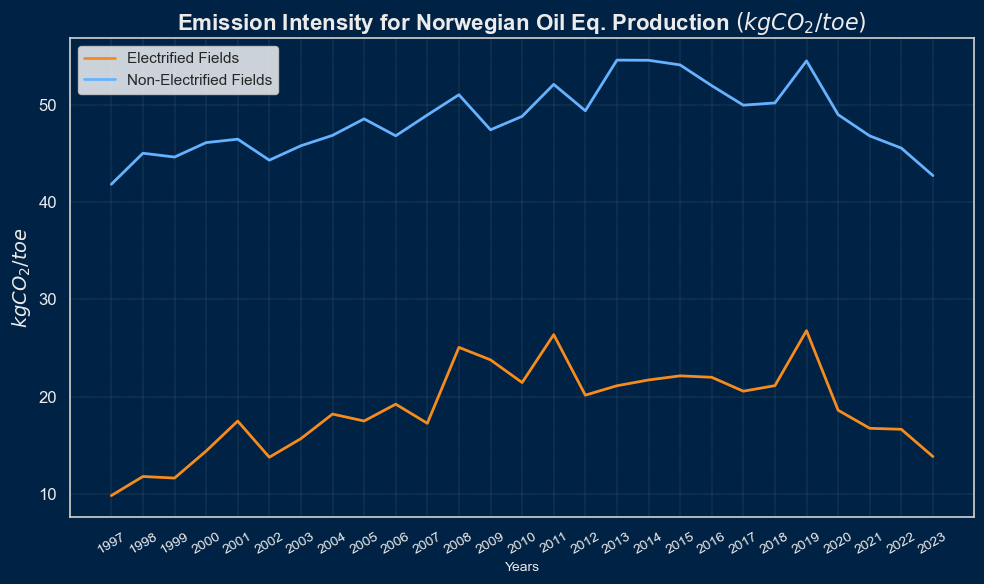

In [350]:
# Plotting the Annual Carbon Emission Intensity for Norwegian Oil Eq. Production (kgCO2/toe):

text_color = "#EBEBEB"
background_color = "#002244"
line_1_color = "#F68B1E"  # Orange
line_2_color = "#66B2FF"  # Light Blue
line_3_color = "#D49DB1"  # Light purple
line_4_color = "#FFD700"  # Gold

plt.figure(figsize=(10, 6))


# Plotting the electrified intensity
plt.plot(
    electrified_intensity.index, electrified_intensity, color=line_1_color, linewidth=2
)

# Plotting the non-electrified intensity
plt.plot(
    non_electrified_intensity.index,
    non_electrified_intensity,
    color=line_2_color,
    linewidth=2,
)

# Titles and labels
plt.title(
    "Emission Intensity for Norwegian Oil Eq. Production $(kgCO_2/toe)$",
    fontsize=16,
    fontweight="bold",
    color=text_color,
)

# X axis show every year
plt.xticks(np.arange(1997, 2024, 1))

# Customizing ticks
plt.xticks(fontsize=10, color=text_color, rotation=30)
plt.yticks(fontsize=12, color=text_color)

plt.xlabel("Years", fontsize=10, color=text_color)

plt.ylabel("$kgCO_2/toe$", fontsize=14, color=text_color)

# Legend
plt.legend(["Electrified Fields", "Non-Electrified Fields"], loc="upper left")


# Grid and layout
plt.grid(True, which="both", linestyle=":", linewidth=0.25)
plt.tight_layout()

# dark blue backround
plt.gca().patch.set_facecolor(background_color)
plt.gcf().patch.set_facecolor(background_color)

# Show plot
plt.show()

In [357]:
#
# GWP100 intensity : electrified
#
emissions_from_electrified_fields_gwp100 = electrified_intra_fields_df.groupby(
    ["year"]
)["yearly_tco2e_gwp100"].sum()

production_from_electrified_fields = electrified_intra_fields_df.groupby(["year"])[
    "net_oil_eq_prod_yearly_mill_sm3"
].sum()

electrified_intensity_gwp_100 = (
    emissions_from_electrified_fields_gwp100 / production_from_electrified_fields
) * 0.00119

#
# GWP 100 : non-electrified
#
emissions_from_non_electrified_fields_gwp100 = non_electrified_intra_fields_df.groupby(
    ["year"]
)["yearly_tco2e_gwp100"].sum()

production_from_non_electrified_fields = non_electrified_intra_fields_df.groupby(
    ["year"]
)["net_oil_eq_prod_yearly_mill_sm3"].sum()

non_electrified_intensity_gwp_100 = (
    emissions_from_non_electrified_fields_gwp100
    / production_from_non_electrified_fields
) * 0.00119

#
# GWP 20
#
# electrified
electrified_intensity_gwp_20 = (
    (electrified_intra_fields_df.groupby(["year"])["yearly_tco2e_gwp20"].sum())
    / (
        electrified_intra_fields_df.groupby(["year"])[
            "net_oil_eq_prod_yearly_mill_sm3"
        ].sum()
    )
    * 0.00119
)

# non-electrified
non_electrified_intensity_gwp_20 = (
    (non_electrified_intra_fields_df.groupby(["year"])["yearly_tco2e_gwp20"].sum())
    / (
        non_electrified_intra_fields_df.groupby(["year"])[
            "net_oil_eq_prod_yearly_mill_sm3"
        ].sum()
    )
    * 0.00119
)

In [370]:
# Printing the average CO2e intensity of electrified fields GWP100
print(
    f"The average CO2e intensity of electrified fields is: {np.round(electrified_intensity_gwp_100.mean(), 2)}kgCO2e/toe"
)

# boe
print(
    f"The average CO2e intensity of electrified fields is: {np.round(electrified_intensity_gwp_100.mean()/6.2898, 2)}kgCO2e/boe"
)

The average CO2e intensity of electrified fields is: 52.73kgCO2e/toe
The average CO2e intensity of electrified fields is: 8.38kgCO2e/boe


In [371]:
# Printing the average CO2e intensity of electrified fields GWP20
print(
    f"The average CO2e intensity of electrified fields is: {np.round(electrified_intensity_gwp_20.mean(), 2)}kgCO2e/toe"
)

# boe
print(
    f"The average CO2e intensity of electrified fields is: {np.round(electrified_intensity_gwp_20.mean()/6.2898, 2)}kgCO2e/boe"
)

The average CO2e intensity of electrified fields is: 54.31kgCO2e/toe
The average CO2e intensity of electrified fields is: 8.63kgCO2e/boe


In [372]:
# Printing the average CO2e intensity of non-electrified fields
print(
    f"The average CO2e intensity of electrified fields is: {np.round(non_electrified_intensity_gwp_100.mean(), 2)}kgCO2e/toe"
)

# boe
print(
    f"The average CO2e intensity of electrified fields is: {np.round(non_electrified_intensity_gwp_100.mean()/6.2898, 2)}kgCO2e/boe"
)

The average CO2e intensity of electrified fields is: 110.08kgCO2e/toe
The average CO2e intensity of electrified fields is: 17.5kgCO2e/boe


In [373]:
# Printing the average CO2e intensity of non-electrified fields
print(
    f"The average CO2e intensity of electrified fields is: {np.round(non_electrified_intensity_gwp_20.mean(), 2)}kgCO2e/toe"
)

# boe
print(
    f"The average CO2e intensity of electrified fields is: {np.round(non_electrified_intensity_gwp_20.mean()/6.2898, 2)}kgCO2e/boe"
)

The average CO2e intensity of electrified fields is: 115.43kgCO2e/toe
The average CO2e intensity of electrified fields is: 18.35kgCO2e/boe


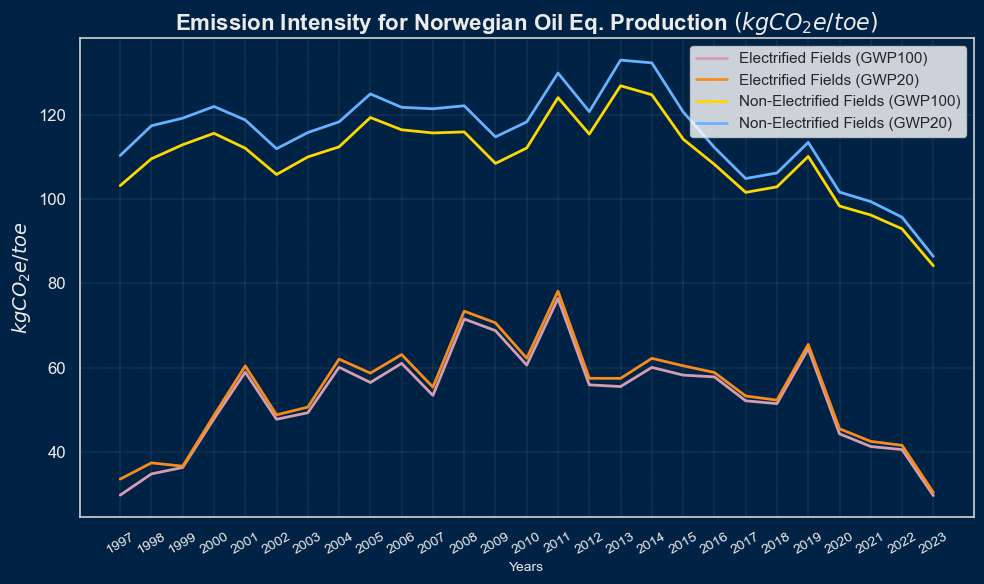

In [382]:
# Creating the same plot with GWP100 and GWP20 for electrified and non-electrified fields

plt.figure(figsize=(10, 6))


# Plotting the electrified intensity
plt.plot(
    electrified_intensity_gwp_100.index,
    electrified_intensity_gwp_100,
    color=line_3_color,
    linewidth=2,
)

plt.plot(
    electrified_intensity_gwp_20.index,
    electrified_intensity_gwp_20,
    color=line_1_color,
    linewidth=2,
)

# Plotting the non-electrified intensity
plt.plot(
    non_electrified_intensity_gwp_100.index,
    non_electrified_intensity_gwp_100,
    color=line_4_color,
    linewidth=2,
)

plt.plot(
    non_electrified_intensity_gwp_20.index,
    non_electrified_intensity_gwp_20,
    color=line_2_color,
    linewidth=2,
)

# Titles and labels
plt.title(
    "Emission Intensity for Norwegian Oil Eq. Production $(kgCO_2e/toe)$",
    fontsize=16,
    fontweight="bold",
    color=text_color,
)

# X axis show every year
plt.xticks(np.arange(1997, 2024, 1))

# Customizing ticks
plt.xticks(fontsize=10, color=text_color, rotation=30)
plt.yticks(fontsize=12, color=text_color)

plt.xlabel("Years", fontsize=10, color=text_color)

plt.ylabel("$kgCO_2e/toe$", fontsize=14, color=text_color)

# Legend
plt.legend(
    [
        "Electrified Fields (GWP100)",
        "Electrified Fields (GWP20)",
        "Non-Electrified Fields (GWP100)",
        "Non-Electrified Fields (GWP20)",
    ],
    loc="upper right",
)

# Grid and layout
plt.grid(True, which="both", linestyle=":", linewidth=0.25)
plt.tight_layout()

# dark blue backround
plt.gca().patch.set_facecolor(background_color)
plt.gcf().patch.set_facecolor(background_color)

# Show plot
plt.show()

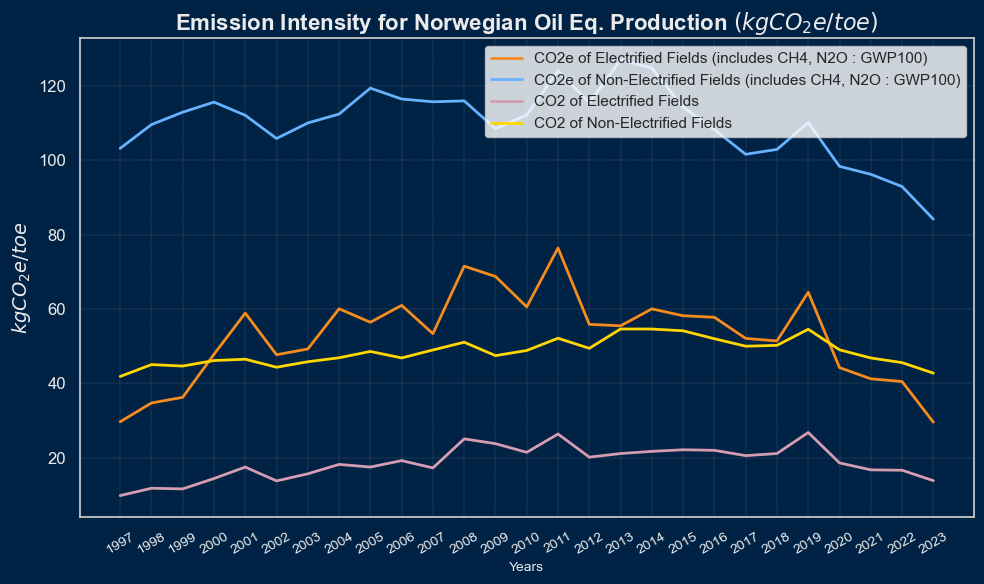

In [362]:
# Creating the same plot with GWP100 and GWP20 for electrified and non-electrified fields

plt.figure(figsize=(10, 6))


# Plotting the electrified intensity
plt.plot(
    electrified_intensity_gwp_100.index,
    electrified_intensity_gwp_100,
    color=line_1_color,
    linewidth=2,
)

# Plotting the non-electrified intensity
plt.plot(
    non_electrified_intensity_gwp_100.index,
    non_electrified_intensity_gwp_100,
    color=line_2_color,
    linewidth=2,
)

# Plotting the electrified intensity
plt.plot(
    electrified_intensity.index, electrified_intensity, color=line_3_color, linewidth=2
)

# Plotting the non-electrified intensity
plt.plot(
    non_electrified_intensity.index,
    non_electrified_intensity,
    color=line_4_color,
    linewidth=2,
)


# Titles and labels
plt.title(
    "Emission Intensity for Norwegian Oil Eq. Production $(kgCO_2e/toe)$",
    fontsize=16,
    fontweight="bold",
    color=text_color,
)

# X axis show every year
plt.xticks(np.arange(1997, 2024, 1))

# Customizing ticks
plt.xticks(fontsize=10, color=text_color, rotation=30)
plt.yticks(fontsize=12, color=text_color)

plt.xlabel("Years", fontsize=10, color=text_color)

plt.ylabel("$kgCO_2e/toe$", fontsize=14, color=text_color)

# Legend
plt.legend(
    [
        "CO2e of Electrified Fields (includes CH4, N2O : GWP100)",
        "CO2e of Non-Electrified Fields (includes CH4, N2O : GWP100)",
        "CO2 of Electrified Fields",
        "CO2 of Non-Electrified Fields",
    ],
    loc="upper right",
)


# Grid and layout
plt.grid(True, which="both", linestyle=":", linewidth=0.25)
plt.tight_layout()

# dark blue backround
plt.gca().patch.set_facecolor(background_color)
plt.gcf().patch.set_facecolor(background_color)

# Show plot
plt.show()

#### Calculating distributed emissions

Some of the fields don't process their own emissions. Hence we need to use the share production volume within each processing field `(processing_field)` to estimate the emissions. The emissions are then distributed to the fields based on their production volume.

The emissions are calculated as follows:

$\text{field emissions} = (\frac{\text{production volume for field}}{\text{total production volume for host processing field}} \times \text{host processing emissions}) + \text{field emissions}$

The total emissions are calculated as the sum of the emissions of the fields within the processing field. The total production volume is calculated as the sum of the production volume of the fields within the processing field.


In [276]:
# Checking the fields that have the following fields_prod_emissions_1997_2023_df[
# [
#    "yearly_co2_emissions_1000_tonnes",
#    "yearly_ch4_emissions_tons",
#    "yearly_nox_emissions_tons",
#    "yearly_oil_spill_emissions_tons",
#    "yearly_water_emissions_m3",
# ] at NaN

fields_prod_emissions_1997_2023_df[
    fields_prod_emissions_1997_2023_df[
        [
            "yearly_co2_emissions_1000_tonnes",
            "yearly_ch4_emissions_tons",
            "yearly_nox_emissions_tons",
            "yearly_oil_spill_emissions_tons",
            "yearly_water_emissions_m3",
        ]
    ]
    .isna()
    .all(axis=1)
]

field  year  net_oil_prod_yearly_mill_sm3  \
0     statfjord nord  1997                       3.93531   
2               frøy  1997                       1.39602   
3                hod  1997                       0.46766   
15       lille-frigg  1997                       0.13218   
21     statfjord øst  1997                       4.14991   
...              ...   ...                           ...   
1793    tommeliten a  2023                       0.08774   
1794           blane  2023                       0.00472   
1798      visund sør  2023                       0.05782   
1800         byrding  2023                       0.01183   
1801            hyme  2023                       0.30909   

      net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
0                          0.17288                       0.09230   
2                          0.28878                       0.00000   
3                          0.09469                       0.02645   
15                         0.27113                       0.00000   
21                         0.25611                       0.13673   
...                            ...                           ...   
1793                       0.09585                       0.01143   
1794                       0.00000                       0.00060   
1798                       0.11078                       0.02729   
1800                       0.00000                       0.00000   
1801                       0.05169                       0.03130   

      net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
0                                 0.00000                          4.20051   
2                                 0.01732                          1.70211   
3                                 0.00000                          0.58879   
15                                0.00327                          0.40655   
21                                0.00000                          4.54272   
...                                   ...                              ...   
1793                              0.00000                          0.19502   
1794                              0.00000                          0.00530   
1798                              0.00000                          0.19589   
1800                              0.00000                          0.01183   
1801                              0.00000                          0.39208   

      produced_water_yearly_mill_sm3  field_id  \
0                            0.00000     43679   
2                            0.00000     43597   
3                            0.00000     43485   
15                           0.00000     43583   
21                           0.00000     43672   
...                              ...       ...   
1793                         0.00309  40867462   
1794                         0.01088   3437650   
1798                         0.00596  20461008   
1800                         0.00000  28975067   
1801                         0.29335  20474183   

      net_oil_prod_monthly_sm3_volatility  \
0                                0.053898   
2                                0.026260   
3                                0.003632   
15                               0.002805   
21                               0.033326   
...                                   ...   
1793                             0.008203   
1794                             0.000397   
1798                             0.008405   
1800                             0.000421   
1801                             0.018244   

      net_gas_prod_monthly_sm3_volatility  \
0                                0.000405   
2                                0.005287   
3                                0.001044   
15                               0.007123   
21                               0.000602   
...                                   ...   
1793                             0.010482   
1794                             0.000

In [277]:
# Before we can start that, we need to fill the NaN values in the emission columns with 0
# emission cols:
# yearly_co2_emissions_1000_tonnes
# yearly_ch4_emissions_tons
# yearly_nox_emissions_tons
# yearly_oil_spill_emissions_tons
# yearly_water_emissions_m3

fields_prod_emissions_1997_2023_df[
    [
        "yearly_co2_emissions_1000_tonnes",
        "yearly_ch4_emissions_tons",
        "yearly_nox_emissions_tons",
        "yearly_oil_spill_emissions_tons",
        "yearly_water_emissions_m3",
    ]
] = fields_prod_emissions_1997_2023_df[
    [
        "yearly_co2_emissions_1000_tonnes",
        "yearly_ch4_emissions_tons",
        "yearly_nox_emissions_tons",
        "yearly_oil_spill_emissions_tons",
        "yearly_water_emissions_m3",
    ]
].fillna(0)

In [278]:
# Checking the dataframe for fields that does not have emissions and does not have a processing field

# fields_without_emissions_and_processing_field = (fields_prod_emissions_1997_2023_df[fields_prod_emissions_1997_2023_df['processing_field'].isna()])
display(
    fields_prod_emissions_1997_2023_df[
        fields_prod_emissions_1997_2023_df["processing_field"].isna()
    ].head()
)

# Setting the fields that does not have a processing field to be their own processing field

fields_prod_emissions_1997_2023_df.loc[
    fields_prod_emissions_1997_2023_df["processing_field"].isna(), "processing_field"
] = fields_prod_emissions_1997_2023_df.loc[
    fields_prod_emissions_1997_2023_df["processing_field"].isna(), "field"
]
display(
    fields_prod_emissions_1997_2023_df[
        fields_prod_emissions_1997_2023_df["processing_field"].isna()
    ].head()
)

field  year  net_oil_prod_yearly_mill_sm3  net_gas_prod_yearly_bill_sm3  \
605   rev  2009                       0.24037                       0.62851   
672   rev  2010                       0.29148                       1.12864   
707   rev  2011                       0.08412                       0.48054   
821   rev  2012                       0.05707                       0.29621   
912   rev  2013                       0.02466                       0.06287   

     net_ngl_prod_yearly_mill_sm3  net_condensate_prod_yearly_mill_sm3  \
605                       0.00000                              0.00000   
672                       0.01900                              0.02453   
707                       0.03324                              0.01957   
821                       0.02173                              0.01226   
912                       0.00781                              0.00285   

     net_oil_eq_prod_yearly_mill_sm3  produced_water_yearly_mill_sm3  \
605                          0.86888                         0.00000   
672                          1.46367                         0.00000   
707                          0.61746                         0.00616   
821                          0.38723                         0.00733   
912                          0.09817                         0.01214   

     field_id  net_oil_prod_monthly_sm3_volatility  \
605   4467554                             0.012385   
672   4467554                             0.007403   
707   4467554                             0.004766   
821   4467554                             0.002037   
912   4467554                             0.001713   

     net_gas_prod_monthly_sm3_volatility  net_ngl_prod_monthly_sm3_volatility  \
605                             0.033015                             0.000000   
672                             0.030383                             0.003186   
707                             0.025951                             0.002499   
821                             0.009701                             0.000960   
912                             0.004285                             0.000697   

     net_condensate_prod_monthly_sm3_volatility  \
605                                    0.000000   
672                                    0.003770   
707                                    0.001139   
821                                    0.000451   
912                                    0.000200   

     net_oil_eq_prod_monthly_sm3_volatility  \
605                                0.045208   
672                                0.039304   
707                                0.033646   
821                                0.012535   
912                                0.006482   

     produced_water_in_field_volatility                   status  \
605                            0.000000  Approved for production   
672                            0.000000                Producing   
707                            0.000613                Producing   
821                            0.000285                Producing   
912                            0.001386                Producing   

    current_status  field_owner processing_field  field_in_emissions  \
605      Producing    4005057.0              NaN                True   
672      Producing    4005057.0              NaN                True   
707      Producing    4005057.0              NaN                True   
821      Producing    4005057.0              NaN                True   
912      Producing    4005057.0              NaN                True   

     facilities_lifetime_mean  facilities_lifetime_std  \
605                       NaN                      NaN   
672                       NaN                      NaN   
707                       NaN                      NaN   
821                       NaN                      NaN   
912                       NaN                      NaN   

     facilities_water_depth_mean  facilities_water_depth_s

Empty DataFrame
Columns: [field, year, net_oil_prod_yearly_mill_sm3, net_gas_prod_yearly_bill_sm3, net_ngl_prod_yearly_mill_sm3, net_condensate_prod_yearly_mill_sm3, net_oil_eq_prod_yearly_mill_sm3, produced_water_yearly_mill_sm3, field_id, net_oil_prod_monthly_sm3_volatility, net_gas_prod_monthly_sm3_volatility, net_ngl_prod_monthly_sm3_volatility, net_condensate_prod_monthly_sm3_volatility, net_oil_eq_prod_monthly_sm3_volatility, produced_water_in_field_volatility, status, current_status, field_owner, processing_field, field_in_emissions, facilities_lifetime_mean, facilities_lifetime_std, facilities_water_depth_mean, facilities_water_depth_std, subsea_facilites_shut_down, surface_facilites_shut_down, subsea_facilites_in_service, surface_facilites_in_service, facility_kind_multi well template, facility_kind_single well template, facility_kind_offshore wind turbine, facility_kind_subsea structure, facility_kind_fpso, facility_kind_jacket 8 legs, facility_kind_condeep monoshaft, facility_kind_loading system, facility_kind_jacket 4 legs, facility_kind_jacket tripod, facility_kind_fsu, facility_kind_semisub steel, facility_kind_condeep 4 shafts, facility_kind_landfall, facility_kind_tlp concrete, facility_kind_jack-up 3 legs, facility_kind_jacket 6 legs, facility_kind_tlp steel, facility_kind_semisub concrete, facility_kind_mopustor, facility_kind_spar, well_status_closed, well_status_drilling, well_status_injecting, well_status_junked, well_status_online/operational, well_status_p&a, well_status_plugged, well_status_producing, well_status_suspended, well_purpose_injection, well_purpose_observation, well_purpose_production, well_subsea_no, well_subsea_yes, well_final_vertical_depth_mean, well_final_vertical_depth_std, well_water_depth_mean, well_water_depth_std, investments_mill_nok, future_investments_mill_nok, yearly_co2_emissions_1000_tonnes, org_number, operator, yearly_ch4_emissions_tons, yearly_nox_emissions_tons, yearly_oil_spill_emissions_tons, yearly_water_emissions_m3, ownership_original, ownership_new_name, current_remaining_recoverable_oil, current_remaining_recoverable_gas, current_remaining_recoverable_ngl, current_remaining_recoverable_condensate, current_remaining_recoverable_oe, original_recoverable_oil, original_recoverable_gas, original_recoverable_ngl, original_recoverable_condensate, original_recoverable_oe, yearly_tco2e_gwp100, yearly_tco2e_gwp20, electrified, years_electrified, electricity_mw, imported_power_2023_gwh/y]
Index: []

In [279]:
# Host processing field production in oe, yearly_ch4_emissions_tons	yearly_nox_emissions_tons	yearly_oil_spill_emissions_tons	yearly_water_emissions_m3, grouped by year and processing field on the only the production columns

processing_production = fields_prod_emissions_1997_2023_df.groupby(
    ["year", "processing_field"]
)[
    "net_oil_eq_prod_yearly_mill_sm3",
    "yearly_ch4_emissions_tons",
    "yearly_nox_emissions_tons",
    "yearly_co2_emissions_1000_tonnes",
].sum()

# Rename columns to oil_fac_prod, gas_fac_prod, ngl_fac_prod, condensate_fac_prod, oil_eq_fac_prod, produced_water
processing_production = processing_production.rename(
    columns={
        "net_oil_eq_prod_yearly_mill_sm3": "oe_fac_prod",
        "yearly_ch4_emissions_tons": "ch4_fac_emissions",
        "yearly_nox_emissions_tons": "nox_fac_emissions",
        "yearly_co2_emissions_1000_tonnes": "co2_fac_emissions",
    }
)

display(processing_production.head())
display(processing_production.describe())

# displaying year 1997

processing_production[processing_production.index.get_level_values("year") == 1997]

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_70777/2771575057.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  processing_production = fields_prod_emissions_1997_2023_df.groupby(


oe_fac_prod  ch4_fac_emissions  nox_fac_emissions  \
year processing_field                                                      
1997 brage                 6.24546         159.684525         856.780000   
     edda                  0.86199           0.000000           0.000000   
     ekofisk              22.81856        1074.381437        8150.617195   
     eldfisk               4.31566          69.893182         777.493376   
     embla                 1.09403           0.000000           0.000000   

                       co2_fac_emissions  
year processing_field                     
1997 brage                    178.756520  
     edda                       0.000000  
     ekofisk                 1338.203363  
     eldfisk                  195.698410  
     embla                      0.000000

oe_fac_prod  ch4_fac_emissions  nox_fac_emissions  co2_fac_emissions
count   929.000000         929.000000         929.000000         929.000000
mean      6.865453         657.810653        1228.838967         300.135845
std       9.379687        1384.455237        1536.516020         360.565618
min       0.000000           0.000000           0.000000           0.000000
25%       0.681600          18.659453         172.760000          28.348217
50%       3.276090         183.153560         630.939904         176.617620
75%       9.226600         578.088239        1754.020996         367.005746
max      49.286680       11427.196781        8697.237602        2048.475425

oe_fac_prod  ch4_fac_emissions  nox_fac_emissions  \
year processing_field                                                      
1997 brage                 6.24546         159.684525         856.780000   
     edda                  0.86199           0.000000           0.000000   
     ekofisk              22.81856        1074.381437        8150.617195   
     eldfisk               4.31566          69.893182         777.493376   
     embla                 1.09403           0.000000           0.000000   
     frigg                 2.20524           0.000000           0.000000   
     gullfaks             30.70376       11007.014045        3957.267400   
     gyda                  3.39588         277.710030         380.180000   
     heidrun              13.78288        1427.516845        1503.980000   
     heimdal               3.11919        1123.722979         270.760000   
     njord                 0.36702          49.794762         662.190000   
     norne                 0.41527         383.058529        2944.992072   
     oseberg              27.26827         933.013065        3606.140000   
     sleipner øst         16.48831           0.000000           0.000000   
     snorre               13.51233         159.530559        2194.480525   
     statfjord            32.43504       10141.199406        4626.839130   
     tor                   0.42122           8.264966         144.729105   
     troll                29.08419        1722.809231        1466.556400   
     valhall               6.30728         610.962122        1255.236000   
     veslefrikk            3.69981          64.319881         973.466100   
     yme                   1.97977         126.134389        1317.523650   
     åsgard               10.45162        1889.529815         427.930000   

                       co2_fac_emissions  
year processing_field                     
1997 brage                    178.756520  
     edda                       0.000000  
     ekofisk                 1338.203363  
     eldfisk                  195.698410  
     embla                      0.000000  
     frigg                      0.000000  
     gullfaks                 919.710697  
     gyda                      96.382270  
     heidrun                  368.185780  
     heimdal                  101.013920  
     njord                     74.143500  
     norne                    761.336994  
     oseberg                  808.695820  
     sleipner øst               0.000000  
     snorre                   383.347942  
     statfjord               1479.849289  
     tor                       27.877500  
     troll                    239.330258  
     valhall                  236.040650  
     veslefrikk               156.204920  
     yme                      133.201530  
     åsgard                   157.075150

In [280]:
# Merging in the grouped emissions and set it on all the fields, but merge on processing field in main dataframe

fields_prod_emissions_1997_2023_df = fields_prod_emissions_1997_2023_df.merge(
    processing_production,
    how="left",
    left_on=["year", "processing_field"],
    right_on=["year", "processing_field"],
)

fields_prod_emissions_1997_2023_df.head()

field  year  net_oil_prod_yearly_mill_sm3  \
0  statfjord nord  1997                       3.93531   
1      veslefrikk  1997                       3.47468   
2            frøy  1997                       1.39602   
3             hod  1997                       0.46766   
4             yme  1997                       1.97977   

   net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
0                       0.17288                       0.09230   
1                       0.13919                       0.08596   
2                       0.28878                       0.00000   
3                       0.09469                       0.02645   
4                       0.00000                       0.00000   

   net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
0                              0.00000                          4.20051   
1                              0.00000                          3.69981   
2                              0.01732                          1.70211   
3                              0.00000                          0.58879   
4                              0.00000                          1.97977   

   produced_water_yearly_mill_sm3  field_id  \
0                             0.0     43679   
1                             0.0     43618   
2                             0.0     43597   
3                             0.0     43485   
4                             0.0     43807   

   net_oil_prod_monthly_sm3_volatility  net_gas_prod_monthly_sm3_volatility  \
0                             0.053898                             0.000405   
1                             0.052851                             0.008952   
2                             0.026260                             0.005287   
3                             0.003632                             0.001044   
4                             0.056455                             0.000000   

   net_ngl_prod_monthly_sm3_volatility  \
0                             0.000334   
1                             0.005461   
2                             0.000000   
3                             0.000238   
4                             0.000000   

   net_condensate_prod_monthly_sm3_volatility  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000942   
3                                    0.000000   
4                                    0.000000   

   net_oil_eq_prod_monthly_sm3_volatility  produced_water_in_field_volatility  \
0                                0.054005                                 0.0   
1                                0.053418                                 0.0   
2                                0.030860                                 0.0   
3                                0.004729                                 0.0   
4                                0.056455                                 0.0   

      status current_status  field_owner processing_field  field_in_emissions  \
0  Producing      Producing      21084.0        statfjord                True   
1  Producing      Shut down      21212.0       veslefrikk                True   
2  Producing      Shut down    3810636.0            frigg               False   
3  Producing      Producing      21052.0          valhall                True   
4  Producing      Producing    2786469.0              yme                True   

   facilities_lifetime_mean  facilities_lifetime_std  \
0                      27.5                15.000000   
1                       NaN                      NaN   
2                       NaN                      NaN   
3                      30.0                 0.000000   
4                      20.0                 7.071068   

   facilities_water_depth_mean  facilities_water_depth_std  \
0                       241.75                   65.030121   
1                          NaN                         NaN   
2                       

In [281]:
# Calculating gwp100 and gwp20 for facility

fields_prod_emissions_1997_2023_df["co2e_fac_emissions_gwp100"] = (
    fields_prod_emissions_1997_2023_df["co2_fac_emissions"] * 1000
    + fields_prod_emissions_1997_2023_df["ch4_fac_emissions"] * 30
    + fields_prod_emissions_1997_2023_df["nox_fac_emissions"] * 296
)

fields_prod_emissions_1997_2023_df["co2e_fac_emissions_gwp20"] = (
    fields_prod_emissions_1997_2023_df["co2_fac_emissions"] * 1000
    + fields_prod_emissions_1997_2023_df["ch4_fac_emissions"] * 84
    + fields_prod_emissions_1997_2023_df["nox_fac_emissions"] * 296
)

In [282]:
# Calculating the share production for each field - production divided by processing field production

# oil eq share production
fields_prod_emissions_1997_2023_df["oe_share_prod"] = (
    fields_prod_emissions_1997_2023_df["net_oil_eq_prod_yearly_mill_sm3"]
    / fields_prod_emissions_1997_2023_df["oe_fac_prod"]
)

# ch4 share emissions = field emissions + processing field emissions * share production
fields_prod_emissions_1997_2023_df["ch4_share_emissions"] = (
    fields_prod_emissions_1997_2023_df["yearly_ch4_emissions_tons"]
    + (
        (fields_prod_emissions_1997_2023_df["ch4_fac_emissions"])
        * fields_prod_emissions_1997_2023_df["oe_share_prod"]
    )
)

# nox share emissions = field emissions + processing field emissions * share production
fields_prod_emissions_1997_2023_df["nox_share_emissions"] = (
    fields_prod_emissions_1997_2023_df["yearly_nox_emissions_tons"]
    + (
        (fields_prod_emissions_1997_2023_df["nox_fac_emissions"])
        * fields_prod_emissions_1997_2023_df["oe_share_prod"]
    )
)

# co2 share emissions = field emissions + processing field emissions * share production
fields_prod_emissions_1997_2023_df["co2_share_emissions"] = (
    fields_prod_emissions_1997_2023_df["yearly_co2_emissions_1000_tonnes"]
    + (
        fields_prod_emissions_1997_2023_df["co2_fac_emissions"]
        * fields_prod_emissions_1997_2023_df["oe_share_prod"]
    )
)

In [283]:
fields_prod_emissions_1997_2023_df.head()

field  year  net_oil_prod_yearly_mill_sm3  \
0  statfjord nord  1997                       3.93531   
1      veslefrikk  1997                       3.47468   
2            frøy  1997                       1.39602   
3             hod  1997                       0.46766   
4             yme  1997                       1.97977   

   net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
0                       0.17288                       0.09230   
1                       0.13919                       0.08596   
2                       0.28878                       0.00000   
3                       0.09469                       0.02645   
4                       0.00000                       0.00000   

   net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
0                              0.00000                          4.20051   
1                              0.00000                          3.69981   
2                              0.01732                          1.70211   
3                              0.00000                          0.58879   
4                              0.00000                          1.97977   

   produced_water_yearly_mill_sm3  field_id  \
0                             0.0     43679   
1                             0.0     43618   
2                             0.0     43597   
3                             0.0     43485   
4                             0.0     43807   

   net_oil_prod_monthly_sm3_volatility  net_gas_prod_monthly_sm3_volatility  \
0                             0.053898                             0.000405   
1                             0.052851                             0.008952   
2                             0.026260                             0.005287   
3                             0.003632                             0.001044   
4                             0.056455                             0.000000   

   net_ngl_prod_monthly_sm3_volatility  \
0                             0.000334   
1                             0.005461   
2                             0.000000   
3                             0.000238   
4                             0.000000   

   net_condensate_prod_monthly_sm3_volatility  \
0                                    0.000000   
1                                    0.000000   
2                                    0.000942   
3                                    0.000000   
4                                    0.000000   

   net_oil_eq_prod_monthly_sm3_volatility  produced_water_in_field_volatility  \
0                                0.054005                                 0.0   
1                                0.053418                                 0.0   
2                                0.030860                                 0.0   
3                                0.004729                                 0.0   
4                                0.056455                                 0.0   

      status current_status  field_owner processing_field  field_in_emissions  \
0  Producing      Producing      21084.0        statfjord                True   
1  Producing      Shut down      21212.0       veslefrikk                True   
2  Producing      Shut down    3810636.0            frigg               False   
3  Producing      Producing      21052.0          valhall                True   
4  Producing      Producing    2786469.0              yme                True   

   facilities_lifetime_mean  facilities_lifetime_std  \
0                      27.5                15.000000   
1                       NaN                      NaN   
2                       NaN                      NaN   
3                      30.0                 0.000000   
4                      20.0                 7.071068   

   facilities_water_depth_mean  facilities_water_depth_std  \
0                       241.75                   65.030121   
1                          NaN                         NaN   
2                       

### Calculating CO2 Equivalent Emissions


We will use a conversion factor of 30 for methane emissions. This is based on the fact that methane has a global warming potential 30 times higher than CO2 over a 100 year period (GWP100). If we use a GWP20, the factor is 84. Hence, we will create to columns, one for each factor. For nitrous oxide $N_2O$ emissions, we will use a factor of 296 for both GWP100 and GWP20 as it has atmpsheric lifetime of 100-120 years, alike CO2.

$ CO_2E \text{(GWP100)} = CO_2 + (CH_4 \times 30) + (N_2O \times 296)$

$ CO_2E \text{(GWP20)} = CO_2 + (CH_4 \times 84) + (N_2O \times 296)$

Source: [IPCC (for GWP100)](https://www.ipcc.ch/site/assets/uploads/2018/03/TAR-04.pdf), [IEA (for GWP20)](https://www.iea.org/reports/methane-tracker-2021/methane-and-climate-change)


In [284]:
# Calculating the CO2 eq. emissions for each field's distributed emissions

# GWP100
fields_prod_emissions_1997_2023_df["tco2e_gwp100_tons"] = (
    fields_prod_emissions_1997_2023_df["co2_share_emissions"] * 1000
    + fields_prod_emissions_1997_2023_df["ch4_share_emissions"] * 30
    + fields_prod_emissions_1997_2023_df["nox_share_emissions"] * 296
)

# GWP20
fields_prod_emissions_1997_2023_df["co2e_gwp20_tons"] = (
    fields_prod_emissions_1997_2023_df["co2_share_emissions"] * 1000
    + fields_prod_emissions_1997_2023_df["ch4_share_emissions"] * 86
    + fields_prod_emissions_1997_2023_df["nox_share_emissions"] * 296
)

In [285]:
# Plotting the CO2 eq. emissions for each field

fields_prod_emissions_1997_2023_df["co2_share_emissions"].describe()

# Printing the top 10 rows with the highest CO2 eq. emissions
fields_prod_emissions_1997_2023_df[
    [
        "field",
        "year",
        "tco2e_gwp100_tons",
        "co2e_gwp20_tons",
        "co2_share_emissions",
        "yearly_co2_emissions_1000_tonnes",
    ]
].sort_values(by="tco2e_gwp100_tons", ascending=False).head(10)

field  year  tco2e_gwp100_tons  co2e_gwp20_tons  co2_share_emissions  \
58     ekofisk  1998       8.600204e+06     8.854328e+06          3718.137866   
11     ekofisk  1997       6.847803e+06     6.958463e+06          2395.076338   
138  statfjord  2000       6.203592e+06     6.333219e+06          2643.772011   
42   statfjord  1998       5.825492e+06     6.421703e+06          2457.820374   
101  statfjord  1999       5.790593e+06     5.944044e+06          2669.454014   
178  statfjord  2001       5.644889e+06     5.769780e+06          2478.516456   
332  statfjord  2005       5.567493e+06     5.649739e+06          2475.079358   
204  statfjord  2002       5.553724e+06     5.662618e+06          2459.426688   
15   statfjord  1997       5.457163e+06     6.439892e+06          2560.788550   
312  statfjord  2004       5.241428e+06     5.335611e+06          2369.850028   

     yearly_co2_emissions_1000_tonnes  
58                        1860.344868  
11                        1217.237623  
138                       1637.032648  
42                        1428.978820  
101                       1599.509551  
178                       1556.526602  
332                       1517.315901  
204                       1515.802394  
15                        1479.849289  
312                       1434.424531

In [286]:
# Plotting the top 10 rows with highest production

fields_prod_emissions_1997_2023_df[
    ["field", "year", "net_oil_eq_prod_yearly_mill_sm3"]
].sort_values(by="net_oil_eq_prod_yearly_mill_sm3", ascending=False).head(10)

field  year  net_oil_eq_prod_yearly_mill_sm3
266            troll  2003                         48.50212
199            troll  2002                         47.54338
440            troll  2007                         46.57443
1273           troll  2018                         46.44625
1176           troll  2017                         45.45579
287            troll  2004                         44.85681
1588           troll  2022                         44.69711
117            troll  2000                         43.77769
337            troll  2005                         43.74200
1747  johan sverdrup  2023                         43.49277

### Emissions Intensity


#### Carbon Equivalent Emissions Intensity

We will calculate methane intensity using the distributed emissions. The carbon equivalent intensity is calculated as the sum of the methane, CO2 and NOX emissions divided by the production volume.

$ CO_2E \text{ intensity (GWP100)} = \frac{CO_2 + (CH_4 \times 30) + (N_2O \times 296)}{\text{Production volume}}$

$ CO_2E \text{ intensity (GWP20)} = \frac{CO_2 + (CH_4 \times 84) + (N_2O \times 296)}{\text{Production volume}}$


In [287]:
# CO2e emission - GWP 100
fields_prod_emissions_1997_2023_df["tco2e/toe_gwp100"] = (
    fields_prod_emissions_1997_2023_df["tco2e_gwp100_tons"]
    / (
        (
            fields_prod_emissions_1997_2023_df["net_oil_eq_prod_yearly_mill_sm3"]
            * 1000000
        )
        / 1.18
    )
)


# CO2e emission - GWP 20
fields_prod_emissions_1997_2023_df["tco2e/ktoe_gwp20"] = (
    fields_prod_emissions_1997_2023_df["co2e_gwp20_tons"]
    / (
        (
            fields_prod_emissions_1997_2023_df["net_oil_eq_prod_yearly_mill_sm3"]
            * 1000000
        )
        / 1.18
    )
)

In [288]:
display(fields_prod_emissions_1997_2023_df["tco2e_gwp100_tons"].describe())

count    1.740000e+03
mean     7.288872e+05
std      1.052256e+06
min      0.000000e+00
25%      6.571287e+04
50%      3.118776e+05
75%      9.054451e+05
max      8.600204e+06
Name: tco2e_gwp100_tons, dtype: float64

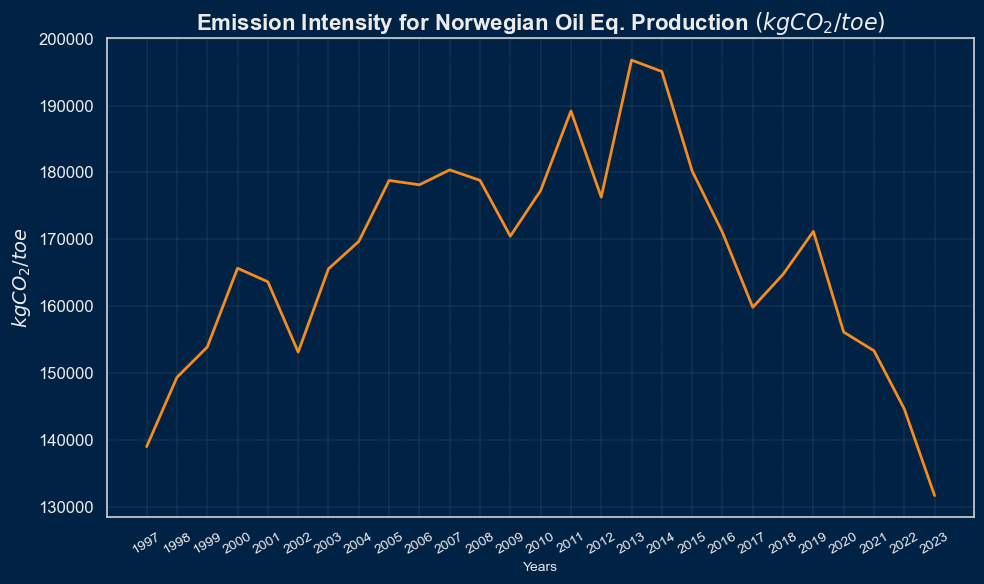

In [289]:
# Printing the average shre CO2e emissions per toe for each year

dist_gwp_100_em_intensity = (
    fields_prod_emissions_1997_2023_df.groupby(["year"])["tco2e_gwp100_tons"].sum()
    / (
        fields_prod_emissions_1997_2023_df.groupby(["year"])[
            "net_oil_eq_prod_yearly_mill_sm3"
        ].sum()
    )
    * 0.84
)

# Creating a plot with the dist_gwp_100_em_intensity
# Blue background
plt.figure(figsize=(10, 6))


# Plotting the electrified intensity
plt.plot(
    dist_gwp_100_em_intensity.index,
    dist_gwp_100_em_intensity,
    color=line_1_color,
    linewidth=2,
)

# Titles and labels
plt.title(
    "Emission Intensity for Norwegian Oil Eq. Production $(kgCO_2/toe)$",
    fontsize=16,
    fontweight="bold",
    color=text_color,
)

# X axis show every year
plt.xticks(np.arange(1997, 2024, 1))

# Customizing ticks
plt.xticks(fontsize=10, color=text_color, rotation=30)
plt.yticks(fontsize=12, color=text_color)

plt.xlabel("Years", fontsize=10, color=text_color)

plt.ylabel("$kgCO_2/toe$", fontsize=14, color=text_color)

# Grid and layout
plt.grid(True, which="both", linestyle=":", linewidth=0.25)
plt.tight_layout()

# dark blue backround
plt.gca().patch.set_facecolor(background_color)
plt.gcf().patch.set_facecolor(background_color)

# Show plot
plt.show()

In [290]:
# Displaying the top 10 rows with the highest CO2e emissions per ktoe - GWP 100 showing full rows

fields_prod_emissions_1997_2023_df[
    [
        "field",
        "year",
        "processing_field",
        "co2_share_emissions",
        "tco2e/toe_gwp100",
        "tco2e_gwp100_tons",
        "net_oil_eq_prod_yearly_mill_sm3",
        "net_oil_prod_yearly_mill_sm3",
        "status",
        "yearly_co2_emissions_1000_tonnes",
        "co2_fac_emissions",
        "oe_share_prod",
        "oe_fac_prod",
    ]
].sort_values(by="tco2e/toe_gwp100", ascending=False).head(10)

field  year processing_field  co2_share_emissions  tco2e/toe_gwp100  \
1711   skirne  2023          heimdal             0.682400               inf   
1041  heimdal  2015          heimdal           131.269823               inf   
210     sigyn  2002     sleipner øst            20.800354               inf   
1627  heimdal  2022          heimdal           108.460063               inf   
1217    maria  2017          kristin            39.719962               inf   
1603    fenja  2022            njord            37.573768               inf   
774   heimdal  2012          heimdal           129.206678               inf   
940   heimdal  2014          heimdal           132.916202               inf   
942   valemon  2014       kvitebjørn            27.362739               inf   
1725  heimdal  2023          heimdal            81.640968       1259.791102   

      tco2e_gwp100_tons  net_oil_eq_prod_yearly_mill_sm3  \
1711        4056.800000                          0.00000   
1041      267570.680666                          0.00000   
210        84518.673800                          0.00000   
1627      169713.082198                          0.00000   
1217      261953.973958                          0.00000   
1603      112302.272112                          0.00000   
774       257859.884824                          0.00000   
940       338475.704638                          0.00000   
942       167629.738560                          0.00000   
1725      138790.545150                          0.00013   

      net_oil_prod_yearly_mill_sm3                   status  \
1711                       0.00000                Producing   
1041                       0.00000                Producing   
210                        0.00000  Approved for production   
1627                       0.00000                Producing   
1217                       0.00000  Approved for production   
1603                       0.00000  Approved for production   
774                        0.00000                Producing   
940                        0.00000                Producing   
942                        0.00000  Approved for production   
1725                       0.00013                Producing   

      yearly_co2_emissions_1000_tonnes  co2_fac_emissions  oe_share_prod  \
1711                          0.682400          83.446553       0.000000   
1041                        131.269823         131.269823       0.000000   
210                          20.800354          20.800354       0.000000   
1627                        108.460063         108.460063       0.000000   
1217                         39.719962         354.409352       0.000000   
1603                         37.573768          74.600337       0.000000   
774                         129.206678         137.840753       0.000000   
940                         132.916202         132.916202       0.000000   
942                          27.362739         122.712312       0.000000   
1725                         81.593341          83.446553       0.000571   

      oe_fac_prod  
1711      0.22777  
1041      1.41605  
210      20.82203  
1627      0.33788  
1217      7.71112  
1603      0.00102  
774       1.02403  
940       1.10923  
942       9.72976  
1725      0.22777

In [291]:
# plot all the rows where the tco2e/toe_gwp100 is infinity

fields_prod_emissions_1997_2023_df[
    fields_prod_emissions_1997_2023_df["tco2e/toe_gwp100"] == np.inf
]

field  year  net_oil_prod_yearly_mill_sm3  \
210     sigyn  2002                           0.0   
774   heimdal  2012                           0.0   
940   heimdal  2014                           0.0   
942   valemon  2014                           0.0   
1041  heimdal  2015                           0.0   
1217    maria  2017                           0.0   
1603    fenja  2022                           0.0   
1627  heimdal  2022                           0.0   
1711   skirne  2023                           0.0   

      net_gas_prod_yearly_bill_sm3  net_ngl_prod_yearly_mill_sm3  \
210                            0.0                           0.0   
774                            0.0                           0.0   
940                            0.0                           0.0   
942                            0.0                           0.0   
1041                           0.0                           0.0   
1217                           0.0                           0.0   
1603                           0.0                           0.0   
1627                           0.0                           0.0   
1711                           0.0                           0.0   

      net_condensate_prod_yearly_mill_sm3  net_oil_eq_prod_yearly_mill_sm3  \
210                                   0.0                              0.0   
774                                   0.0                              0.0   
940                                   0.0                              0.0   
942                                   0.0                              0.0   
1041                                  0.0                              0.0   
1217                                  0.0                              0.0   
1603                                  0.0                              0.0   
1627                                  0.0                              0.0   
1711                                  0.0                              0.0   

      produced_water_yearly_mill_sm3  field_id  \
210                          0.00010   1630100   
774                          0.00000     43590   
940                          0.00000     43590   
942                          0.00000  20460969   
1041                         0.00000     43590   
1217                         0.00110  26465170   
1603                         0.00000  31164879   
1627                         0.00000     43590   
1711                         0.00002   2138816   

      net_oil_prod_monthly_sm3_volatility  \
210                                   0.0   
774                                   0.0   
940                                   0.0   
942                                   0.0   
1041                                  0.0   
1217                                  0.0   
1603                                  0.0   
1627                                  0.0   
1711                                  0.0   

      net_gas_prod_monthly_sm3_volatility  \
210                                   0.0   
774                                   0.0   
940                                   0.0   
942                                   0.0   
1041                                  0.0   
1217                                  0.0   
1603                                  0.0   
1627                                  0.0   
1711                                  0.0   

      net_ngl_prod_monthly_sm3_volatility  \
210                                   0.0   
774                                   0.0   
940                                   0.0   
942                                   0.0   
1041                                  0.0   
1217                                  0.0   
1603                                  0.0   
1627                                  0.0   
1711                                  0.0   

      net_condensate_prod_monthly_sm3_volatility  \
210                                          0.0   
774                                          0.0   
940  

In [292]:
# Displaying the top 10 rows with the highest CO2e emissions per ktoe - GWP 100 showing full rows for 2022

fields_prod_emissions_1997_2023_df[
    [
        "field",
        "year",
        "processing_field",
        "co2_share_emissions",
        "tco2e/toe_gwp100",
        "tco2e_gwp100_tons",
        "net_oil_eq_prod_yearly_mill_sm3",
        "net_oil_prod_yearly_mill_sm3",
        "status",
        "yearly_co2_emissions_1000_tonnes",
        "co2_fac_emissions",
        "oe_share_prod",
        "oe_fac_prod",
    ]
].loc[(fields_prod_emissions_1997_2023_df["year"] == 2022)].sort_values(
    by="tco2e/toe_gwp100", ascending=False
).head(10)

field  year processing_field  co2_share_emissions  \
1627       heimdal  2022          heimdal           108.460063   
1603         fenja  2022            njord            37.573768   
1647         njord  2022            njord           111.626906   
1605    veslefrikk  2022       veslefrikk            36.284312   
1638  sleipner øst  2022     sleipner øst           482.333876   
1586         brage  2022            brage           374.977158   
1654           ula  2022          ekofisk           194.476758   
1600     statfjord  2022        statfjord          1077.509585   
1591         knarr  2022            knarr           124.490766   
1657        balder  2022           balder           251.155232   

      tco2e/toe_gwp100  tco2e_gwp100_tons  net_oil_eq_prod_yearly_mill_sm3  \
1627               inf       1.697131e+05                          0.00000   
1603               inf       1.123023e+05                          0.00000   
1647        426.680043       3.688251e+05                          0.00102   
1605         15.504975       1.426983e+05                          0.01086   
1638         12.249875       9.987800e+05                          0.09621   
1586          2.474033       8.681968e+05                          0.41409   
1654          1.909922       3.530604e+05                          0.21813   
1600          1.686323       2.230663e+06                          1.56090   
1591          1.473610       1.927057e+05                          0.15431   
1657          1.362650       1.144776e+06                          0.99133   

      net_oil_prod_yearly_mill_sm3                   status  \
1627                       0.00000                Producing   
1603                       0.00000  Approved for production   
1647                       0.00102                Producing   
1605                       0.00315                Producing   
1638                       0.01430                Producing   
1586                       0.34927                Producing   
1654                       0.19611                Producing   
1600                       0.57350                Producing   
1591                       0.14233                Producing   
1657                       0.99133                Producing   

      yearly_co2_emissions_1000_tonnes  co2_fac_emissions  oe_share_prod  \
1627                        108.460063         108.460063       0.000000   
1603                         37.573768          74.600337       0.000000   
1647                         37.026569          74.600337       1.000000   
1605                         18.142156          18.142156       1.000000   
1638                        473.755711         757.622889       0.011322   
1586                        187.488579         187.488579       1.000000   
1654                        169.261087         707.506904       0.035640   
1600                        667.550435         676.922427       0.605622   
1591                         62.245383          62.245383       1.000000   
1657                        132.395917         132.395917       0.897001   

      oe_fac_prod  
1627      0.33788  
1603      0.00102  
1647      0.00102  
1605      0.01086  
1638      8.49726  
1586      0.41409  
1654      6.12034  
1600      2.57735  
1591      0.15431  
1657      1.10516

In [293]:
# Calculating the mean of tco2e/toe_gwp100 between 1997 and 2022 across fields

mean_dist_tco2e_per_ktoe = fields_prod_emissions_1997_2023_df["tco2e/toe_gwp100"].mean()

print(f"Mean tco2e per ktoe between 1997 and 2022: {mean_dist_tco2e_per_ktoe}")
# Calculating the mean of tco2e/toe_gwp100 between 1997 and 2022 across fields

mean_co2_per_oe = (
    fields_prod_emissions_1997_2023_df["yearly_co2_emissions_1000_tonnes"] * 1000
) / (fields_prod_emissions_1997_2023_df["net_oil_eq_prod_yearly_mill_sm3"] * 0.84)
mean_co2_per_oe

print(f"Mean CO2 emissions per oe between 1997 and 2022: {mean_co2_per_oe.mean()}")

Mean tco2e per ktoe between 1997 and 2022: inf
Mean CO2 emissions per oe between 1997 and 2022: inf


In [294]:
# Checking all rows where njord is the processing field and year is 2022

fields_prod_emissions_1997_2023_df[
    (fields_prod_emissions_1997_2023_df["processing_field"] == "njord")
    & (fields_prod_emissions_1997_2023_df["year"] == 2022)
]

# After some research HYME is currently open, (opened 2023), but ceased to produce between 2016 and 2022.

field  year  net_oil_prod_yearly_mill_sm3  net_gas_prod_yearly_bill_sm3  \
1597   hyme  2022                       0.00000                           0.0   
1603  fenja  2022                       0.00000                           0.0   
1617  bauge  2022                       0.00000                           0.0   
1647  njord  2022                       0.00102                           0.0   

      net_ngl_prod_yearly_mill_sm3  net_condensate_prod_yearly_mill_sm3  \
1597                           0.0                                  0.0   
1603                           0.0                                  0.0   
1617                           0.0                                  0.0   
1647                           0.0                                  0.0   

      net_oil_eq_prod_yearly_mill_sm3  produced_water_yearly_mill_sm3  \
1597                          0.00000                         0.00000   
1603                          0.00000                         0.00000   
1617                          0.00000                         0.00000   
1647                          0.00102                         0.00004   

      field_id  net_oil_prod_monthly_sm3_volatility  \
1597  20474183                             0.000000   
1603  31164879                             0.000000   
1617  29446221                             0.000000   
1647     43751                             0.000294   

      net_gas_prod_monthly_sm3_volatility  \
1597                                  0.0   
1603                                  0.0   
1617                                  0.0   
1647                                  0.0   

      net_ngl_prod_monthly_sm3_volatility  \
1597                                  0.0   
1603                                  0.0   
1617                                  0.0   
1647                                  0.0   

      net_condensate_prod_monthly_sm3_volatility  \
1597                                         0.0   
1603                                         0.0   
1617                                         0.0   
1647                                         0.0   

      net_oil_eq_prod_monthly_sm3_volatility  \
1597                                0.000000   
1603                                0.000000   
1617                                0.000000   
1647                                0.000294   

      produced_water_in_field_volatility                   status  \
1597                            0.000000                Producing   
1603                            0.000000  Approved for production   
1617                            0.000000  Approved for production   
1647                            0.000012                Producing   

     current_status  field_owner processing_field  field_in_emissions  \
1597      Producing    2987047.0            njord               False   
1603      Producing   20109200.0            njord                True   
1617      Producing    2987047.0            njord               False   
1647      Producing      40585.0            njord                True   

      facilities_lifetime_mean  facilities_lifetime_std  \
1597                     25.00                      0.0   
1603                       NaN                      0.0   
1617                     25.00                      0.0   
1647                     23.75                      2.5   

      facilities_water_depth_mean  facilities_water_depth_std  \
1597                   256.000000                    0.000000   
1603                   325.000000                    0.000000   
1617                   282.000000                    0.000000   
1647                   319.095238                   49.971897   

      subsea_facilites_shut_down  surface_facilites_shut_down  \
1597                         0.0                          0.0   
1603                         0.0                          0.0   
1617                         0.0                          0.0   
1647                         0.0  

In [295]:
# Checking that the sums of emissions are correct
# the distributed emissions of co2e should be equal to the total emissions of co2e

distributed_co2e_total = fields_prod_emissions_1997_2023_df["co2_share_emissions"].sum()

total_co2e = fields_prod_emissions_1997_2023_df[
    "yearly_co2_emissions_1000_tonnes"
].sum()

print(
    f"Total distributed (share) CO2e emissions: {distributed_co2e_total.round(1)} - Total CO2 emissions: {total_co2e.round(1)}"
)

Total distributed (share) CO2e emissions: 557156.2 - Total CO2 emissions: 278826.2


### Plotting the Share Emission Intensities


In [296]:
# Checking that the sums of emissions are correct

# Yearly co2e/toe gwp100

fields_prod_emissions_1997_2023_df["tco2e/toe_gwp100"].groupby(
    fields_prod_emissions_1997_2023_df["year"]
).sum()

year
1997      15.989582
1998      32.330773
1999      11.832282
2000      10.473840
2001      17.733350
2002            NaN
2003      14.877620
2004      16.076332
2005      21.844978
2006      20.520892
2007      21.142153
2008      21.923250
2009      27.624436
2010      28.320290
2011      31.999707
2012            NaN
2013     476.862851
2014            NaN
2015            NaN
2016      51.581122
2017            NaN
2018      63.384733
2019      40.123555
2020     138.505036
2021    1251.641054
2022            NaN
2023            NaN
Name: tco2e/toe_gwp100, dtype: float64

### Data Analysis: Explorative Data Analysis


### Production EDA


#### General Production Statistics


In [297]:
# Ensure all production features are numeric, forcing non-numeric values to NaN
emission_features = [
    "yearly_co2_emissions_1000_tonnes",
    "yearly_ch4_emissions_tons",
    "co2_share_emissions",
    "tco2e_gwp100_tons",
    "tco2e/toe_gwp100",
]

production_features = [
    "net_oil_prod_yearly_mill_sm3",
    "net_gas_prod_yearly_bill_sm3",
    "net_ngl_prod_yearly_mill_sm3",
    "net_condensate_prod_yearly_mill_sm3",
    "net_oil_eq_prod_yearly_mill_sm3",
    "produced_water_yearly_mill_sm3",
]

production_features_volatility = [
    "net_oil_prod_monthly_sm3_volatility",
    "net_gas_prod_monthly_sm3_volatility",
    "net_ngl_prod_monthly_sm3_volatility",
    "net_condensate_prod_monthly_sm3_volatility",
    "net_oil_eq_prod_monthly_sm3_volatility",
    "produced_water_in_field_volatility",
]


# General statistics for production features
production_stats = fields_prod_emissions_1997_2023_df[production_features].describe()
production_stats_volatility = fields_prod_emissions_1997_2023_df[
    production_features_volatility
].describe()
display(production_stats)
display(production_stats_volatility)

net_oil_prod_yearly_mill_sm3  net_gas_prod_yearly_bill_sm3  \
count                   1771.000000                   1771.000000   
mean                       1.884638                      1.426253   
std                        3.413316                      4.326138   
min                        0.000000                      0.000000   
25%                        0.099210                      0.000240   
50%                        0.589360                      0.123530   
75%                        2.164780                      0.798895   
max                       41.289190                     39.784210   

       net_ngl_prod_yearly_mill_sm3  net_condensate_prod_yearly_mill_sm3  \
count                   1771.000000                          1771.000000   
mean                       0.225906                             0.064572   
std                        0.511383                             0.318943   
min                        0.000000                             0.000000   
25%                        0.000000                             0.000000   
50%                        0.022040                             0.000000   
75%                        0.189860                             0.000000   
max                        5.070350                             4.329010   

       net_oil_eq_prod_yearly_mill_sm3  produced_water_yearly_mill_sm3  
count                      1771.000000                     1771.000000  
mean                          3.601358                        2.202234  
std                           6.458177                        4.802091  
min                           0.000000                        0.000000  
25%                           0.326260                        0.007060  
50%                           1.320840                        0.255580  
75%                           4.065360                        2.080305  
max                          48.502120                       38.966800

net_oil_prod_monthly_sm3_volatility  \
count                          1771.000000   
mean                              0.027135   
std                               0.045065   
min                               0.000000   
25%                               0.002671   
50%                               0.011546   
75%                               0.033902   
max                               0.832296   

       net_gas_prod_monthly_sm3_volatility  \
count                          1771.000000   
mean                              0.029570   
std                               0.093216   
min                               0.000000   
25%                               0.000033   
50%                               0.003736   
75%                               0.016356   
max                               1.037163   

       net_ngl_prod_monthly_sm3_volatility  \
count                          1771.000000   
mean                              0.004557   
std                               0.009164   
min                               0.000000   
25%                               0.000000   
50%                               0.000663   
75%                               0.004706   
max                               0.089582   

       net_condensate_prod_monthly_sm3_volatility  \
count                                 1771.000000   
mean                                     0.001435   
std                                      0.007681   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                      0.119442   

       net_oil_eq_prod_monthly_sm3_volatility  \
count                             1771.000000   
mean                                 0.058264   
std                                  0.109220   
min                                  0.000000   
25%                                  0.007581   
50%                                  0.023288   
75%                                  0.062769   
max                                  1.108930   

       produced_water_in_field_volatility  
count                         1771.000000  
mean                             0.031877  
std                              0.059563  
min                              0.000000  
25%                              0.000308  
50%                              0.006680  
75%                              0.036770  
max                              0.442994

#### Histograms for Production Data


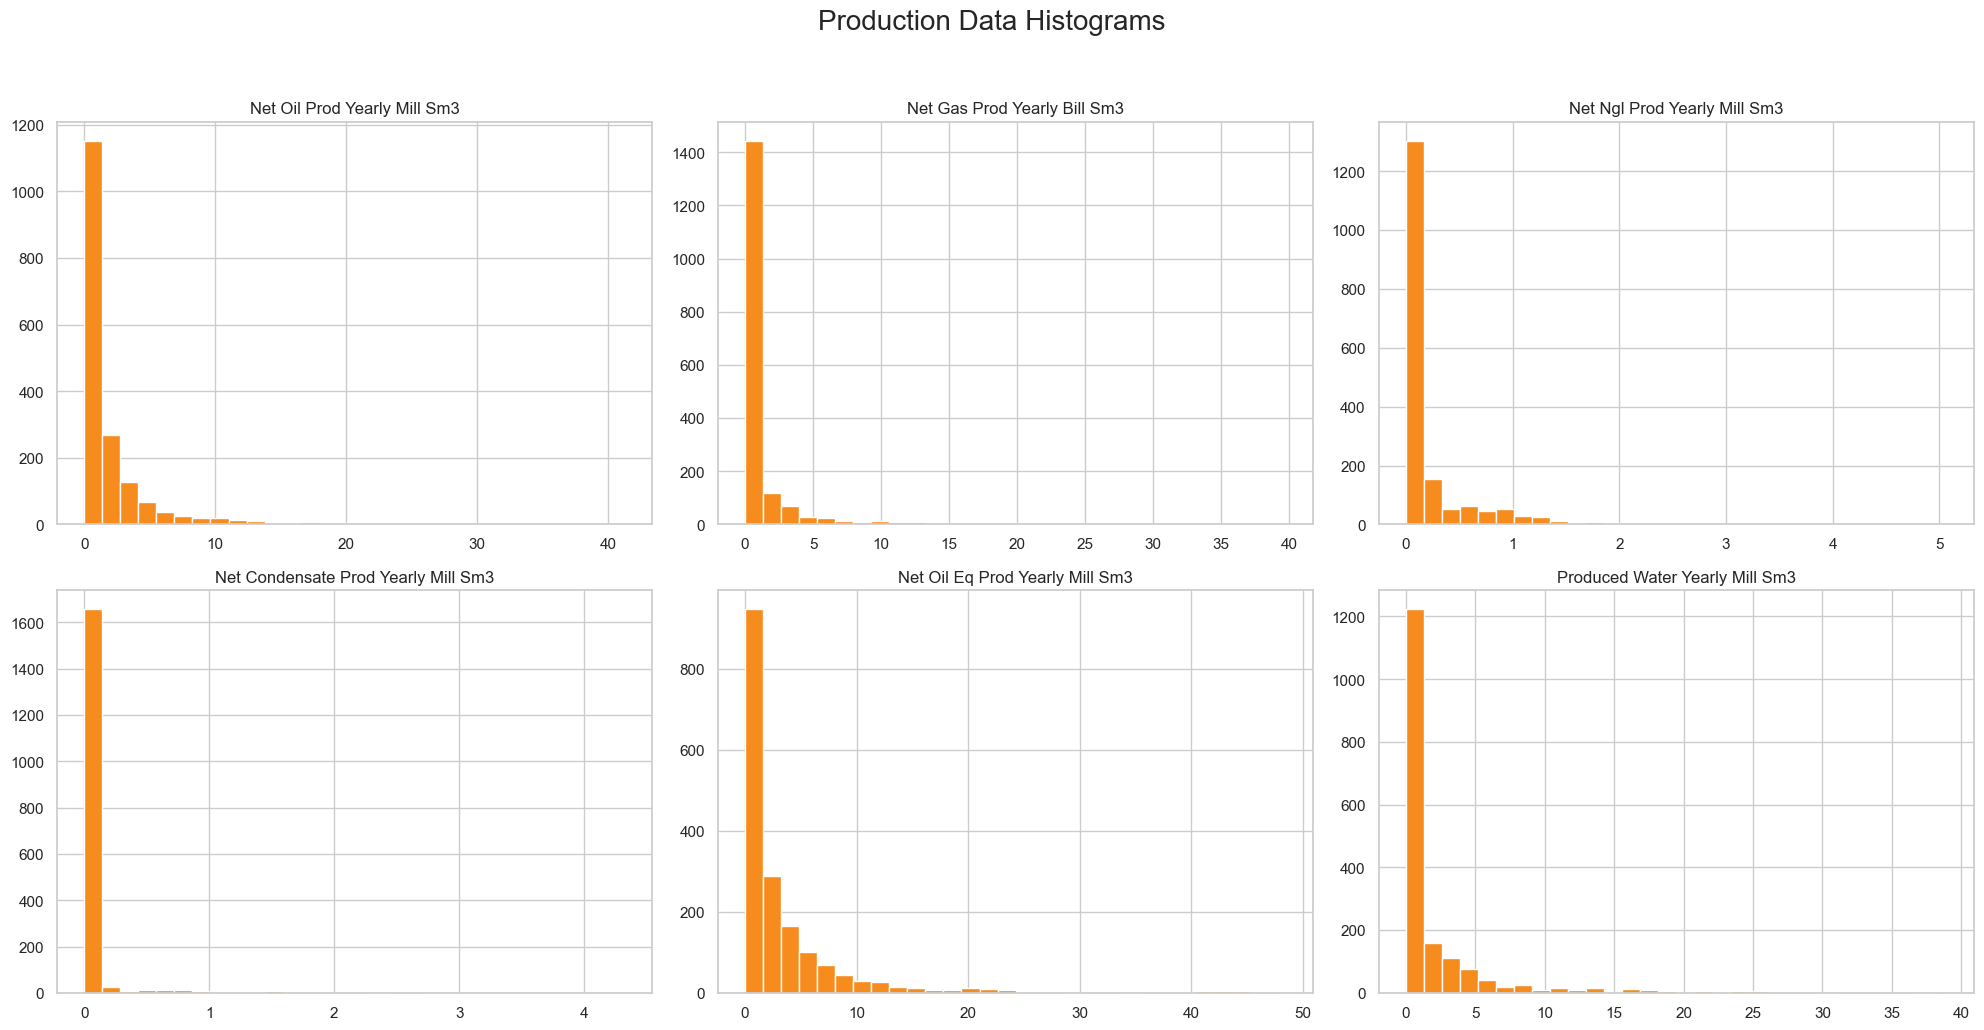

In [327]:
# Function to create a grid of histograms
def plot_histograms(df, features, title, bins=30):
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features, 1):
        # if under 3 features - 1 row, 3 columns
        # if under 6 features - 2 rows, 3 columns
        # if under 9 features - 3 rows, 3 columns
        # if under 12 features - 3 rows, 4 columns
        cols = 3
        rows = 3
        if len(features) < 3:
            rows = 1
            cols = 3
        elif len(features) < 6:
            rows = 2
            cols = 3
        elif len(features) < 9:
            rows = 3
            cols = 3
        else:
            rows = (len(features) + 3) // 4
            cols = 4
        plt.subplot(rows, cols, i)
        df[feature].hist(bins=bins, edgecolor="white", color=line_1_color)
        # Convert title to title case and remove underscores
        feature = feature.replace("_", " ").title()
        plt.title(feature)
        plt.xlabel("")
        plt.ylabel("")

    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    plt.show()


# Plot histograms for production features
plot_histograms(
    fields_prod_emissions_1997_2023_df,
    production_features,
    "Production Data Histograms",
)

Text(0.5, 1.0, 'Net Oil Eq. Production by Year')

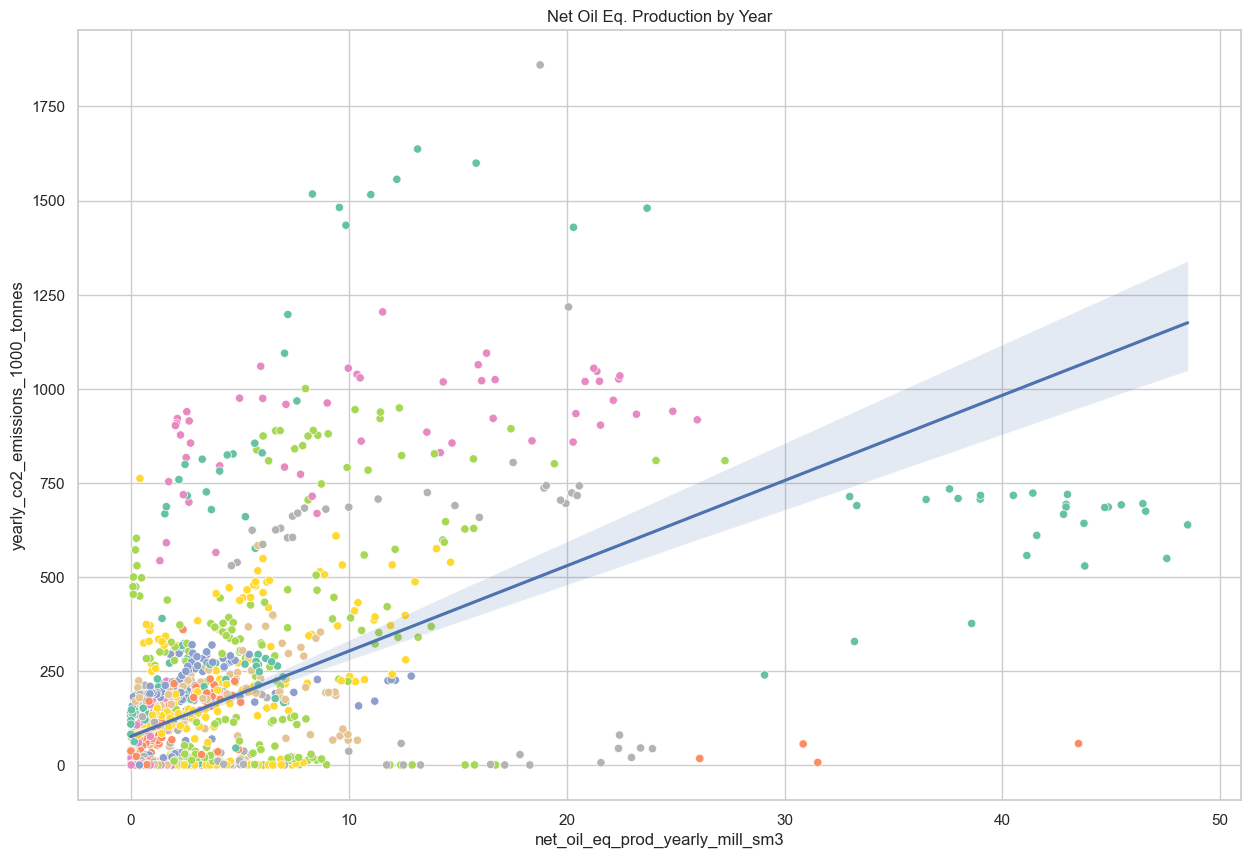

In [299]:
# Create scatterplot where x is year and y is net oil production

plt.figure(figsize=(15, 10))
sns.scatterplot(
    x="net_oil_eq_prod_yearly_mill_sm3",
    y="yearly_co2_emissions_1000_tonnes",
    data=fields_prod_emissions_1997_2023_df,
    hue="field_id",
    palette="Set2",
    # remove underscores from feature y label
).set(
    xlabel="Net Oil Eq. Production (mill sm3)",
    ylabel="Yearly CO2 Emissions (1000 tonnes)",
    title="Yearly CO2 Emissions vs Net Oil Eq. Production",
)

# Plot regression line
sns.regplot(
    x="net_oil_eq_prod_yearly_mill_sm3",
    y="yearly_co2_emissions_1000_tonnes",
    data=fields_prod_emissions_1997_2023_df,
    scatter=False,
)

# Remove field legend
plt.legend([], [], frameon=False)
plt.title("Net Oil Eq. Production by Year")

Text(0.5, 1.0, 'Net Oil Eq. Production by Year')

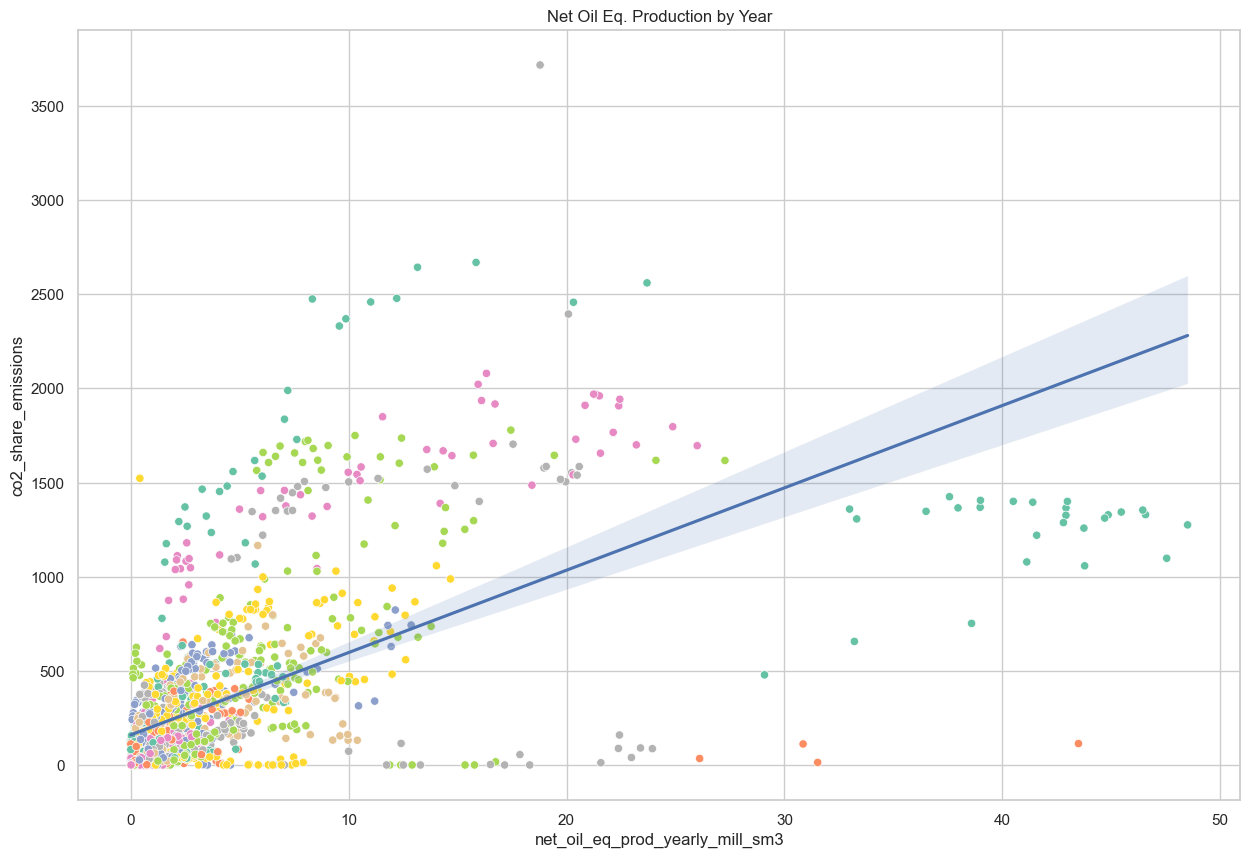

In [300]:
# Create scatterplot where x is year and y is net oil production
#    "co2_share_emissions",
#    "tco2e_gwp100_tons",
#    "tco2e/toe_gwp100",

plt.figure(figsize=(15, 10))
sns.scatterplot(
    x="net_oil_eq_prod_yearly_mill_sm3",
    y="co2_share_emissions",
    data=fields_prod_emissions_1997_2023_df,
    hue="field_id",
    palette="Set2",
    # remove underscores from feature y label
).set(
    xlabel="Net Oil Eq. Production (mill sm3)",
    ylabel="Yearly Distributed CO2 Emissions (tonnes)",
    title="Yearly CO2 Emissions vs Net Oil Eq. Production",
)

# Plot regression line
sns.regplot(
    x="net_oil_eq_prod_yearly_mill_sm3",
    y="co2_share_emissions",
    data=fields_prod_emissions_1997_2023_df,
    scatter=False,
)

# Remove field legend
plt.legend([], [], frameon=False)
plt.title("Net Oil Eq. Production by Year")

Text(0.5, 1.0, 'Net Oil Eq. Production by Year')

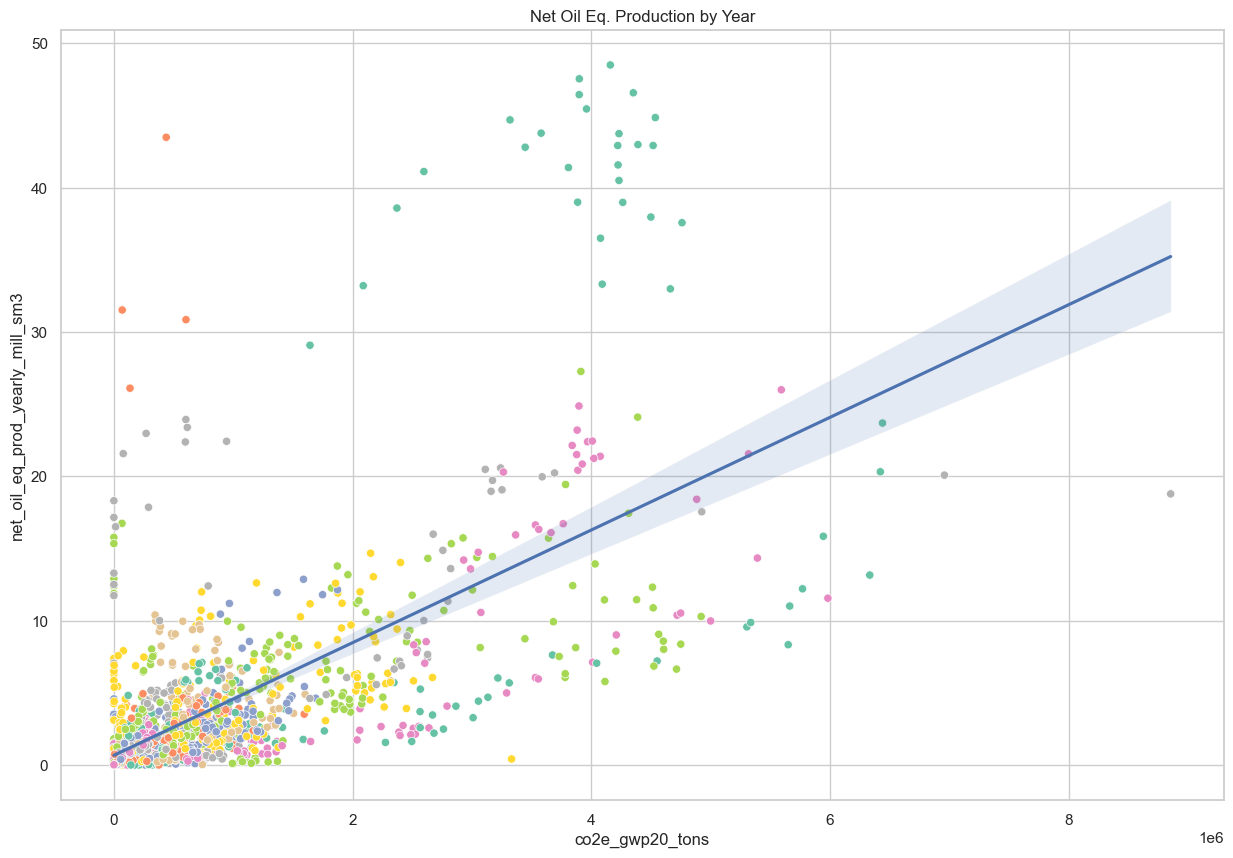

In [301]:
# Create scatterplot where x is year and y is net oil production
#    "co2_share_emissions",
#    "tco2e_gwp100_tons",
#    "tco2e/toe_gwp100",

plt.figure(figsize=(15, 10))
sns.scatterplot(
    x="co2e_gwp20_tons",
    y="net_oil_eq_prod_yearly_mill_sm3",
    data=fields_prod_emissions_1997_2023_df,
    hue="field_id",
    palette="Set2",
    # remove underscores from feature y label
).set(
    xlabel="Yearly CO2E GWP 20 (tonnes)",
    ylabel="Net Oil Eq. Production (mill sm3)",
    title="Yearly CO2 Emissions vs Net Oil Eq. Production",
)

# Plot regression line
sns.regplot(
    x="co2e_gwp20_tons",
    y="net_oil_eq_prod_yearly_mill_sm3",
    data=fields_prod_emissions_1997_2023_df,
    scatter=False,
)

# Remove field legend
plt.legend([], [], frameon=False)
plt.title("Net Oil Eq. Production by Year")

/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_70777/998486146.py:13: UserWarning: 
The palette list has fewer values (20) than needed (114) and will cycle, which may produce an uninterpretable plot.
  scatter = sns.scatterplot(


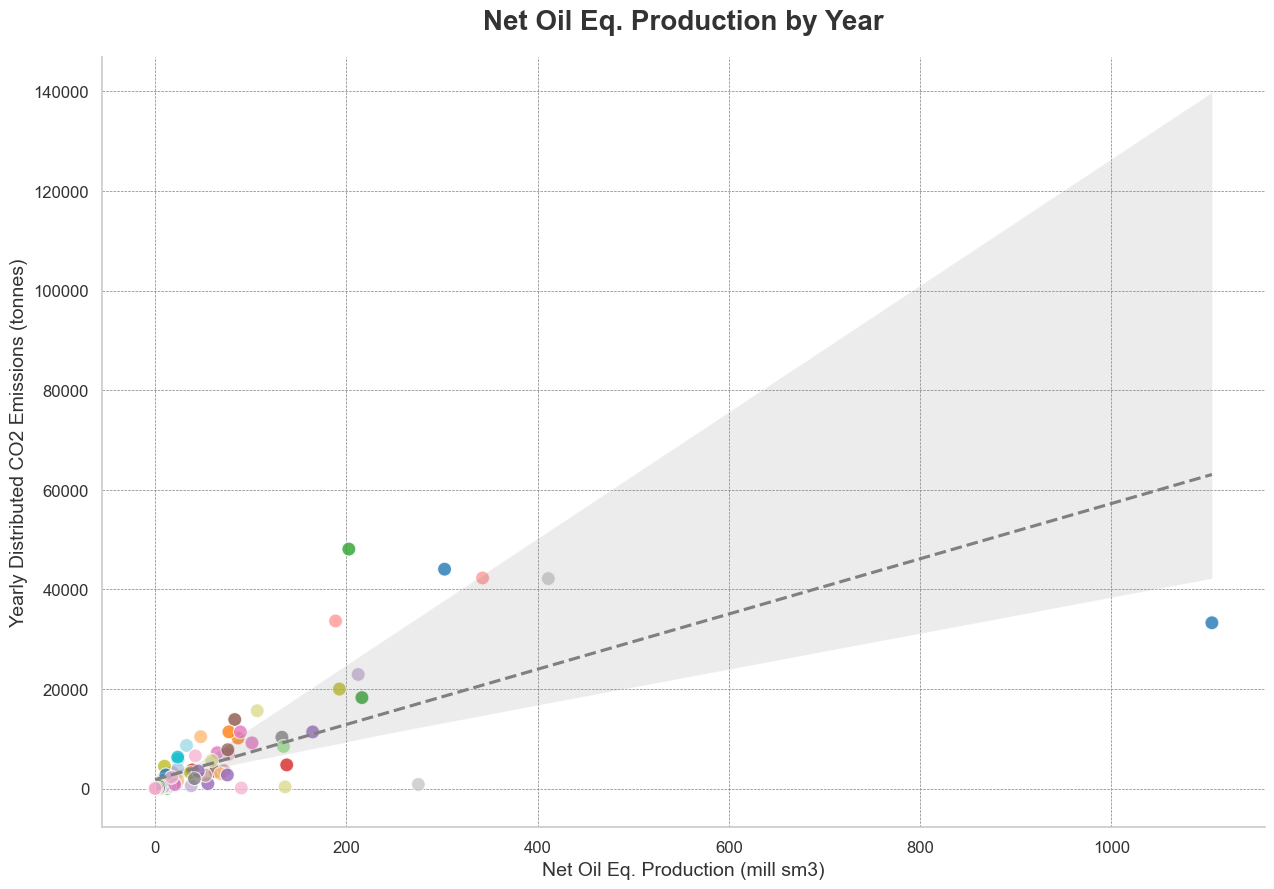

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame
# Assuming `fields_prod_emissions_1997_2023_df` is already loaded with necessary columns

plt.figure(figsize=(15, 10))

sns.set(style="whitegrid")

# Create the scatter plot
scatter = sns.scatterplot(
    x="net_oil_eq_prod_yearly_mill_sm3",
    y="co2_share_emissions",
    data=fields_prod_emissions_1997_2023_df.groupby(["field_id"]).sum().reset_index(),
    hue="field_id",
    # sns blue color palette
    palette=sns.color_palette("tab20"),
    edgecolor="w",
    s=100,  # size of the markers
    alpha=0.8,
)

# Plot regression line
sns.regplot(
    x="net_oil_eq_prod_yearly_mill_sm3",
    y="co2_share_emissions",
    data=fields_prod_emissions_1997_2023_df.groupby(["field_id"]).sum().reset_index(),
    scatter=False,
    color="gray",
    line_kws={"linestyle": "--"},
)

# Customize labels and title
scatter.set(
    xlabel="Net Oil Eq. Production (mill sm3)",
    ylabel="Yearly Distributed CO2 Emissions (tonnes)",
    title="Yearly CO2 Emissions vs Net Oil Eq. Production",
)

# Style adjustments
plt.title(
    "Net Oil Eq. Production by Year",
    fontsize=20,
    weight="bold",
    color="#333333",
    pad=20,
)
plt.xlabel("Net Oil Eq. Production (mill sm3)", fontsize=14, color="#333333")
plt.ylabel("Yearly Distributed CO2 Emissions (tonnes)", fontsize=14, color="#333333")

# Adjusting ticks
plt.xticks(fontsize=12, color="#333333")
plt.yticks(fontsize=12, color="#333333")

# Hide legend
plt.legend([], [], frameon=False)
# Customize the grid
plt.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray")

# Removing top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

In [303]:
# Printing number of observations for each field
fields_prod_emissions_1997_2023_df["field_id"].value_counts().sum()

1771

#### Histograms for Production Volatility Data


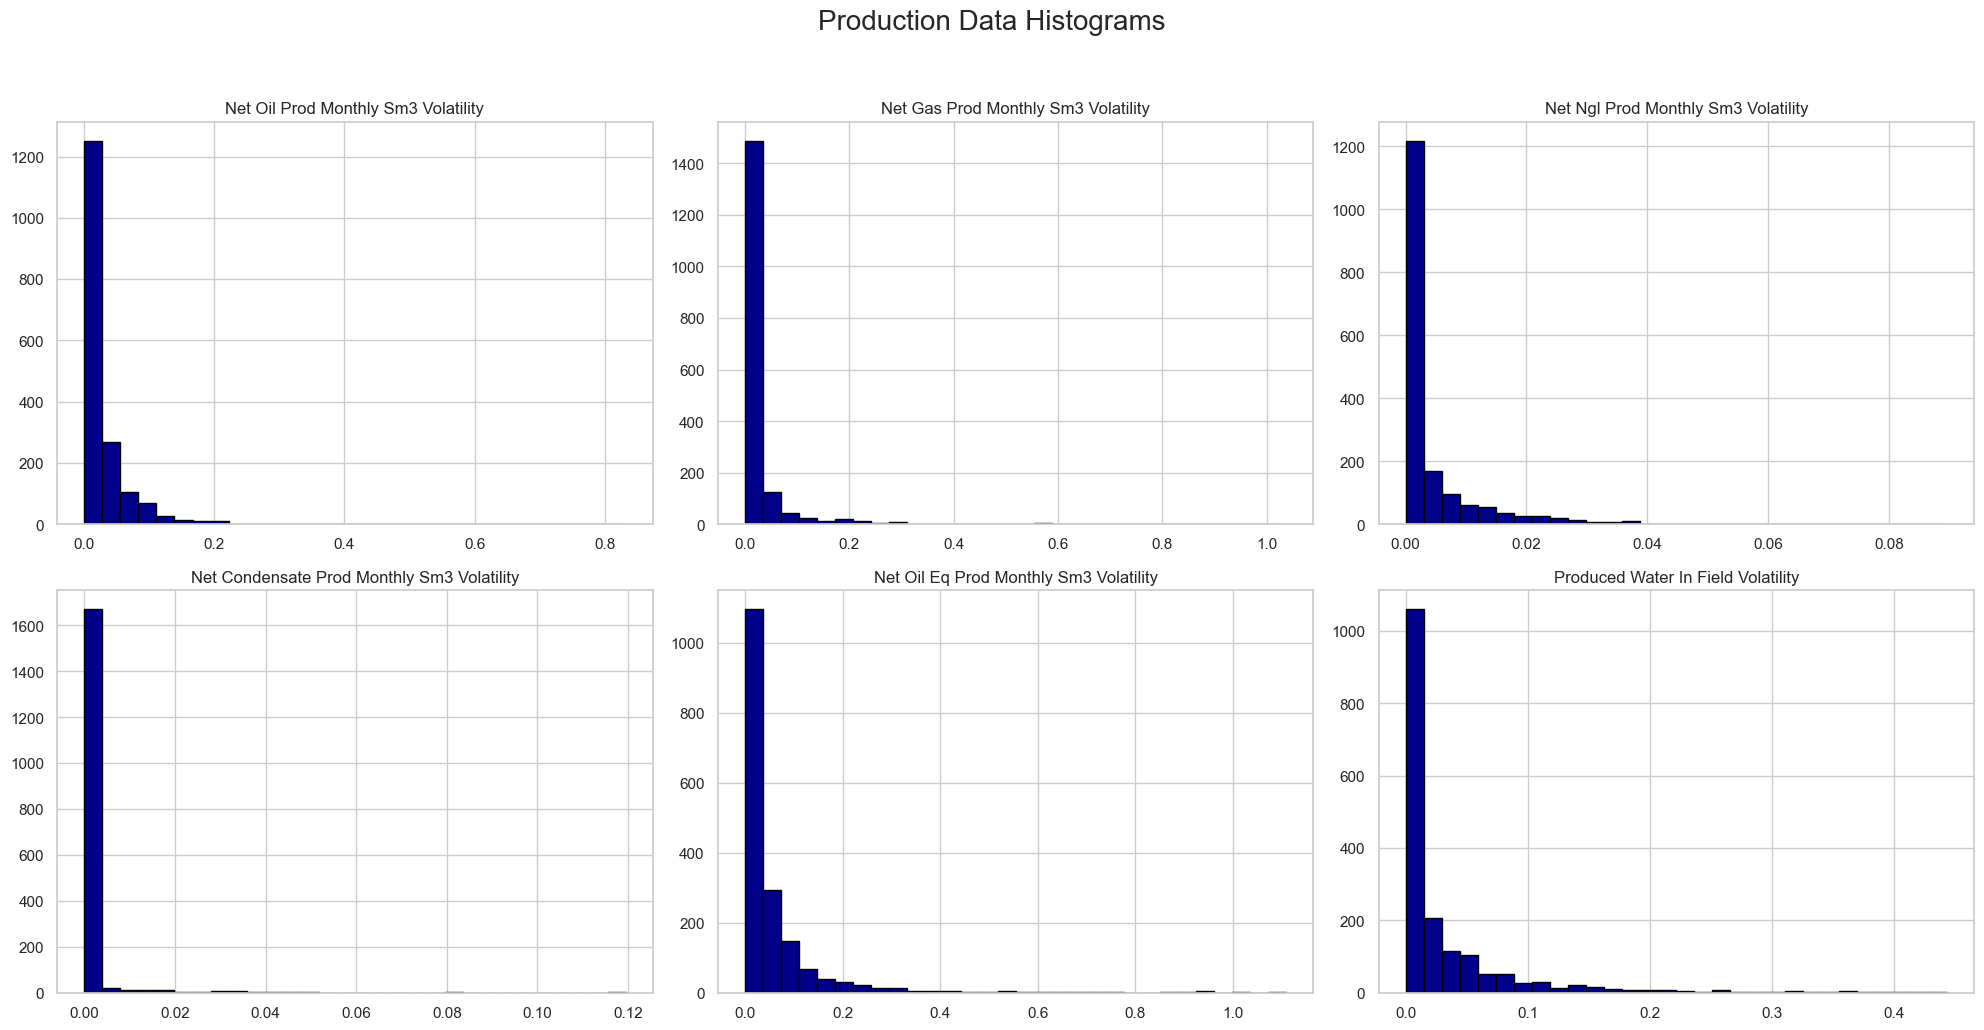

In [304]:
# Plot histograms for production features volatility

# Plot histograms for production features
plot_histograms(
    fields_prod_emissions_1997_2023_df,
    production_features_volatility,
    "Production Data Histograms",
)

#### Scatter Plot and Correlation Matrix of Production Data


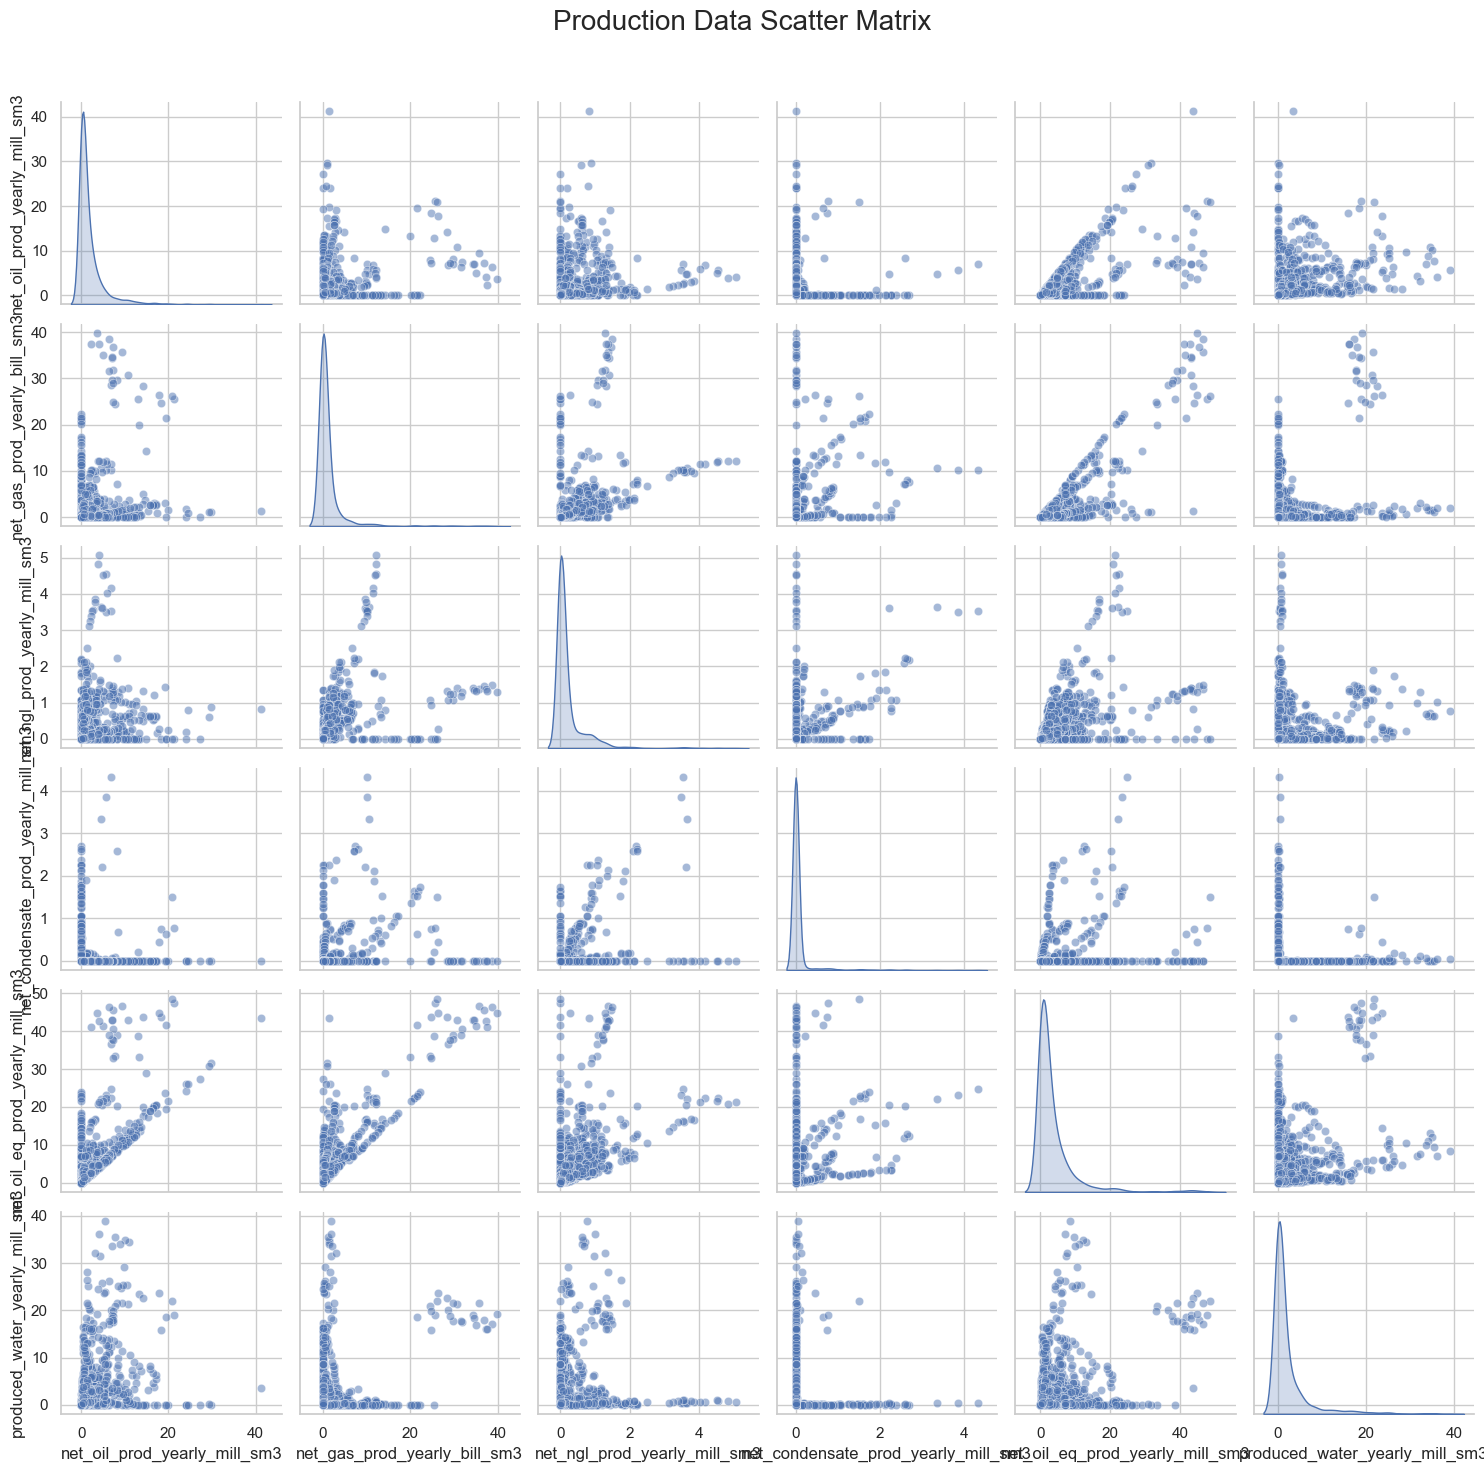

In [305]:
# Drop rows with NaN values in production features
cleaned_production_df = fields_prod_emissions_1997_2023_df[
    production_features + emission_features
].dropna()


# Function to create scatter plot matrix
def plot_scatter_matrix(df, features, title):
    sns.pairplot(df[features], diag_kind="kde", plot_kws={"alpha": 0.5})
    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# Plot scatter matrix for production features
plot_scatter_matrix(
    cleaned_production_df, production_features, "Production Data Scatter Matrix"
)

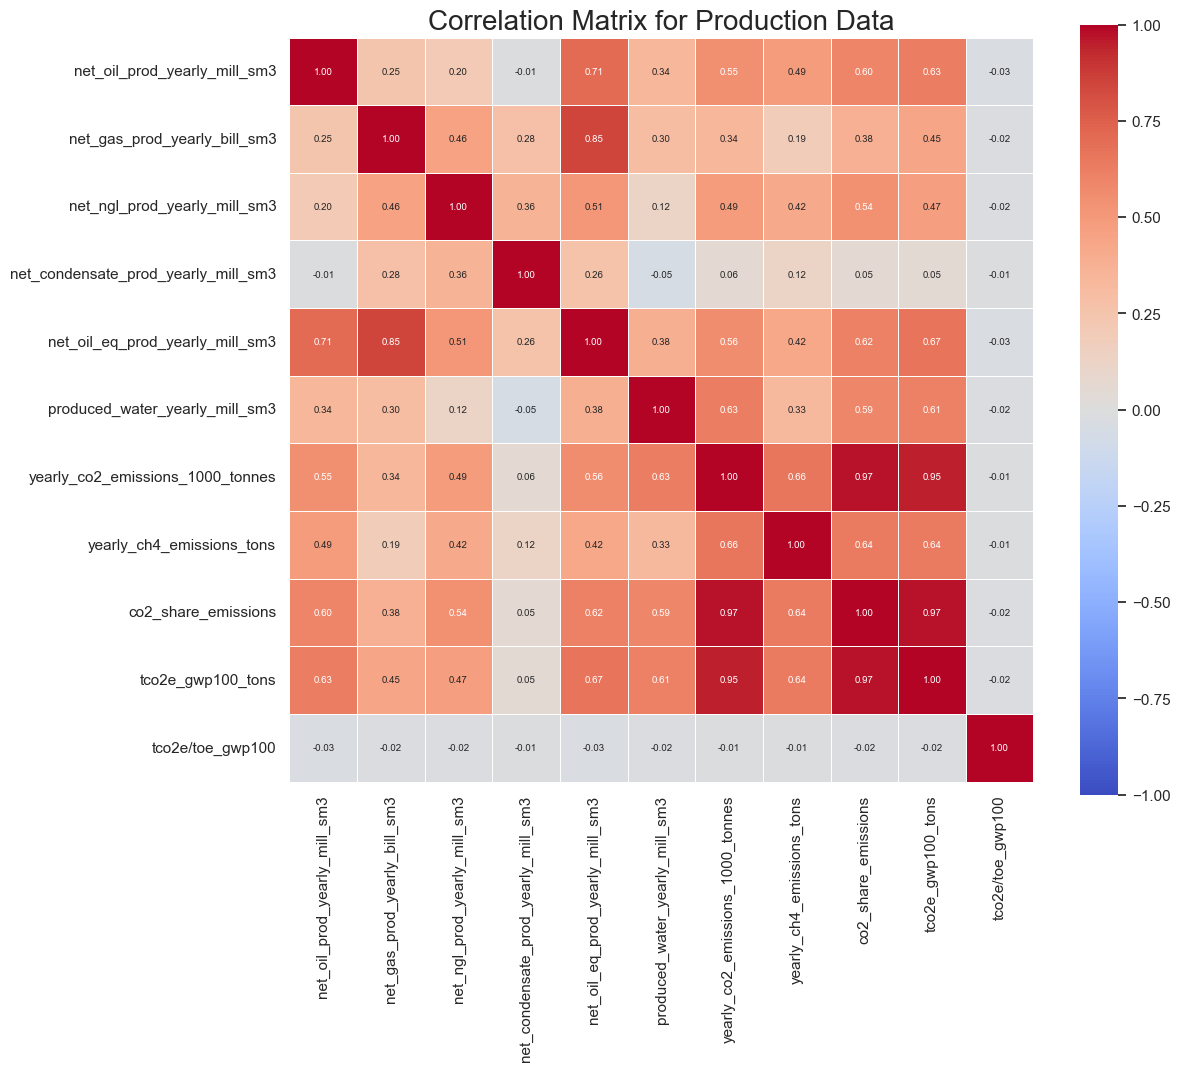

In [306]:
# Compute the correlation matrix for production features
correlation_matrix = cleaned_production_df.corr()


# Function to plot correlation matrix
def plot_correlation_matrix(corr_matrix, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        square=True,
        linewidths=0.5,
        annot_kws={"size": 7},
        fmt=".2f",
    )
    plt.title(title, fontsize=20)
    plt.show()


# Plot the correlation matrix for production features
plot_correlation_matrix(correlation_matrix, "Correlation Matrix for Production Data")

#### Scatter Plot and Correlation Matrix of Production Volatility Data


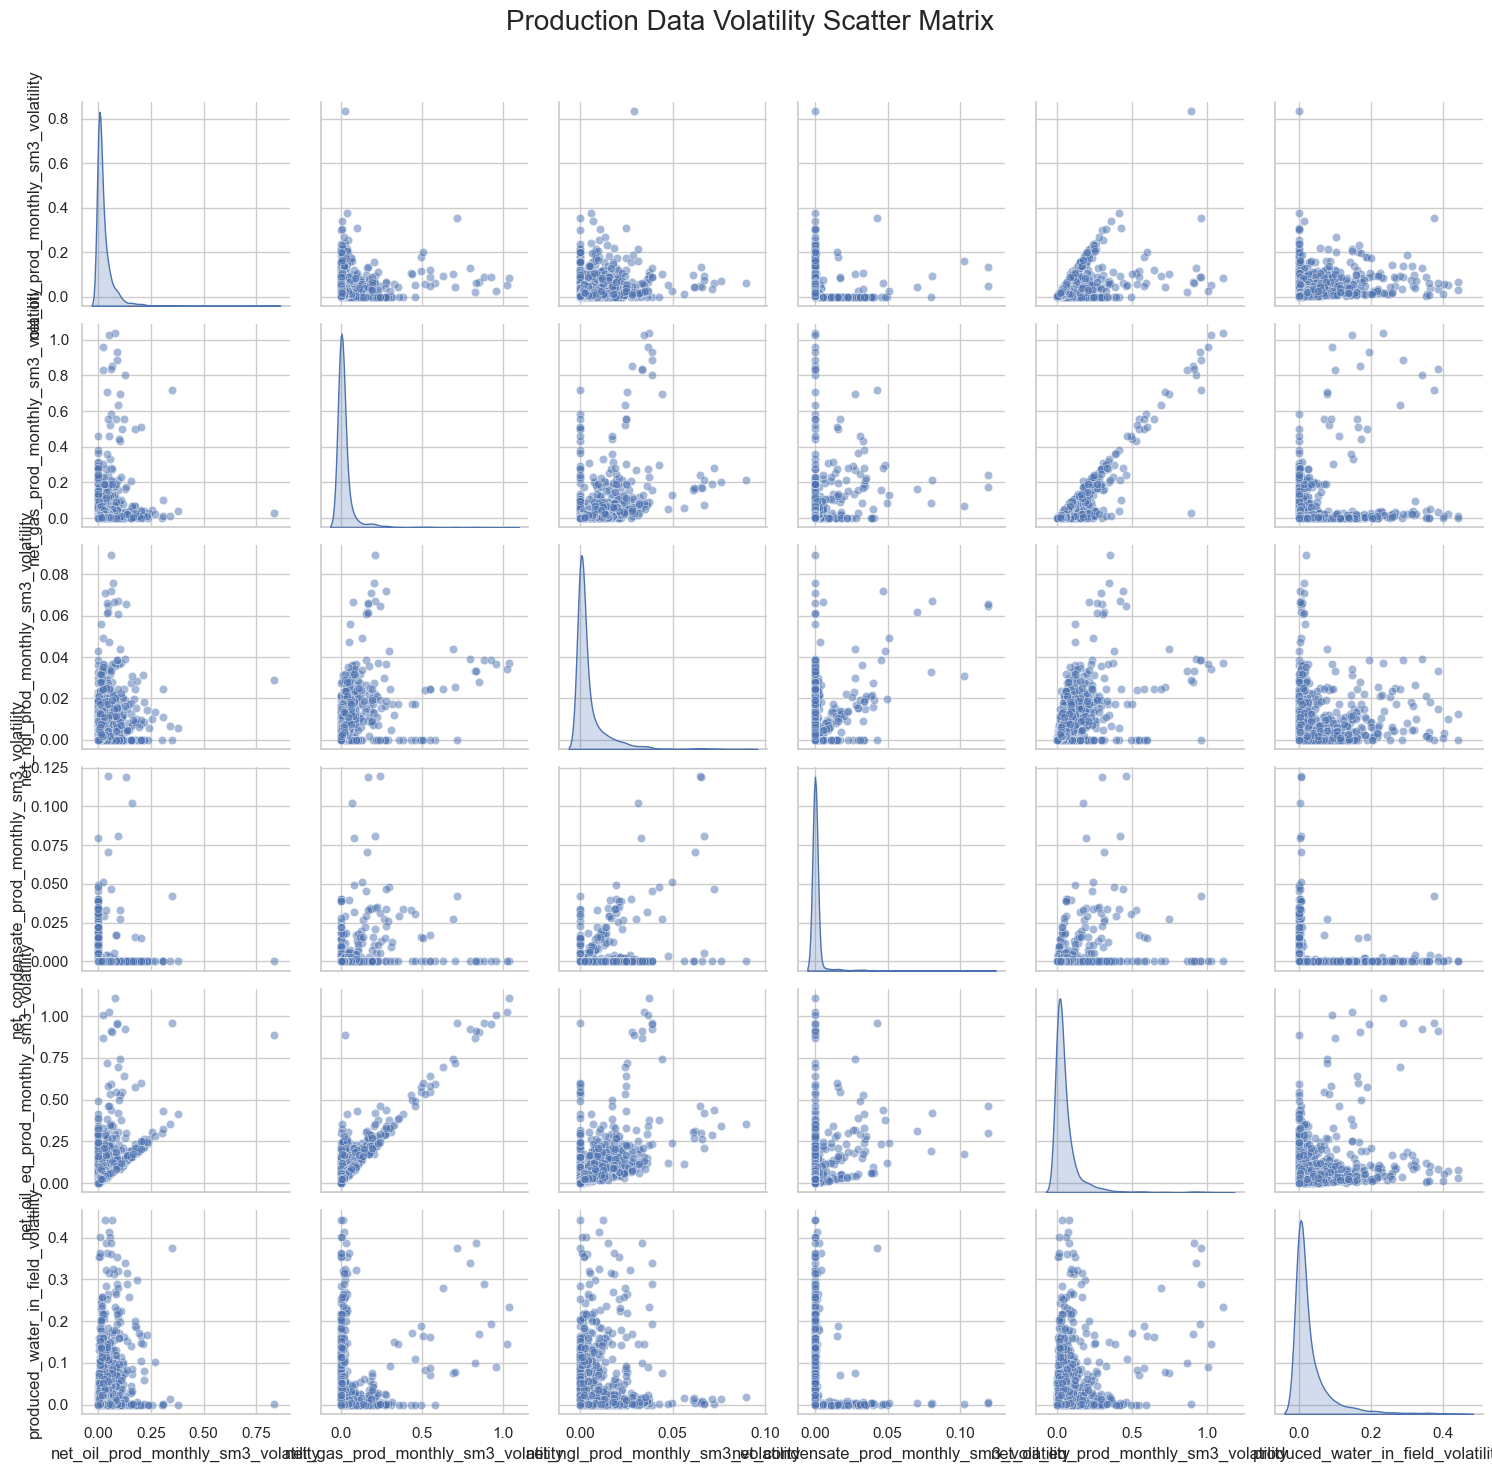

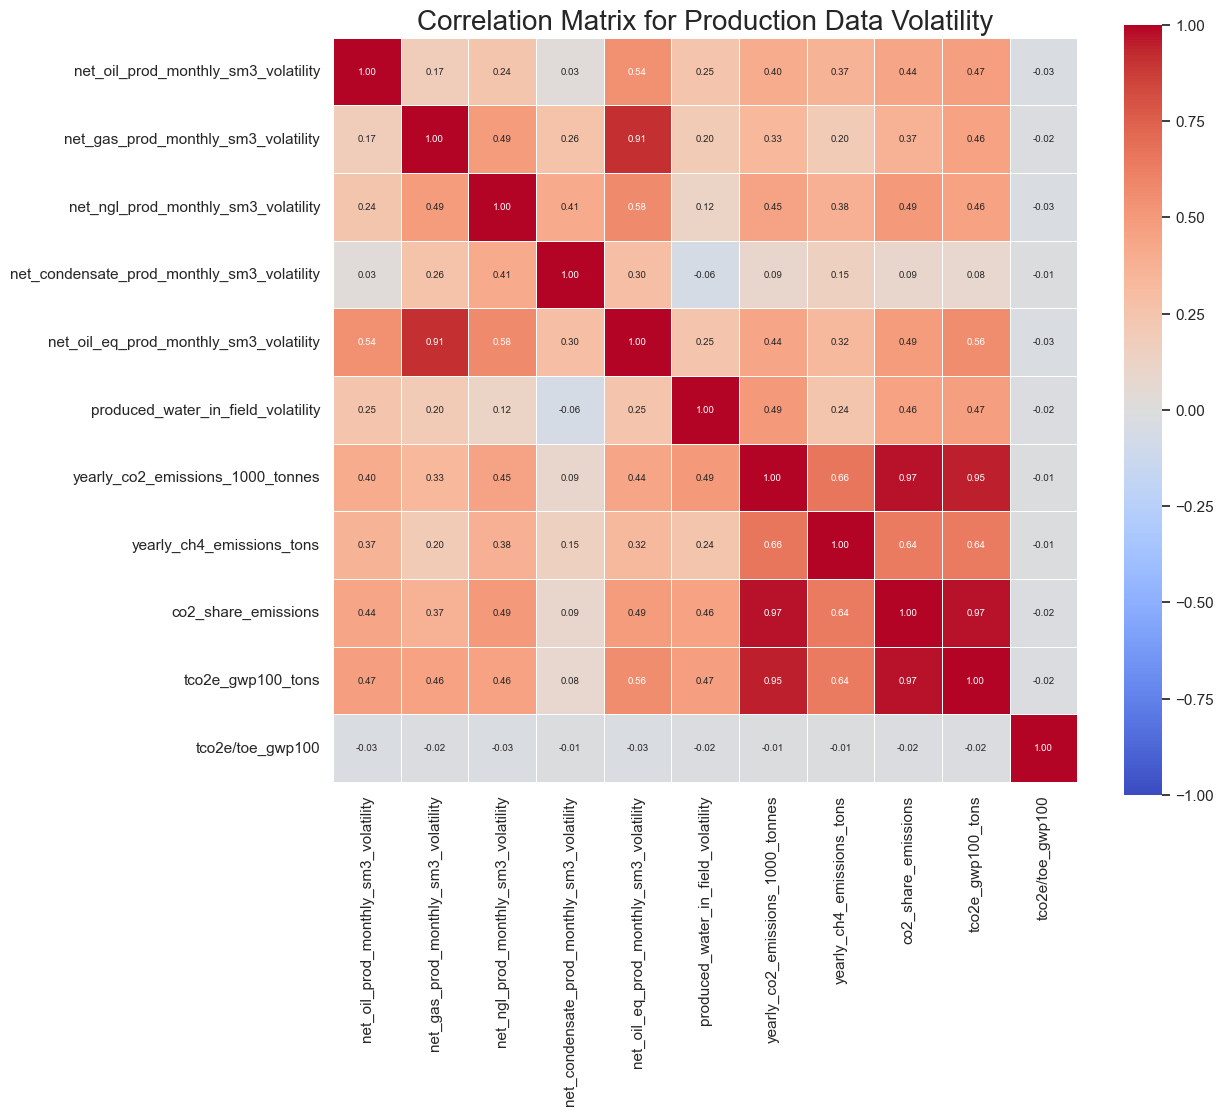

In [307]:
# Plotting the scatter plot and correlation matrix for production features volatility

# Drop rows with NaN values in production features
cleaned_production_volatility_df = fields_prod_emissions_1997_2023_df[
    production_features_volatility + emission_features
].dropna()

# Plot scatter matrix for production features volatility
plot_scatter_matrix(
    cleaned_production_volatility_df,
    production_features_volatility,
    "Production Data Volatility Scatter Matrix",
)

# Compute the correlation matrix for production features volatility
correlation_matrix_volatility = cleaned_production_volatility_df.corr()

# Plot the correlation matrix for production features volatility
plot_correlation_matrix(
    correlation_matrix_volatility,
    "Correlation Matrix for Production Data Volatility",
)

#### Skewness and Outlier Detection


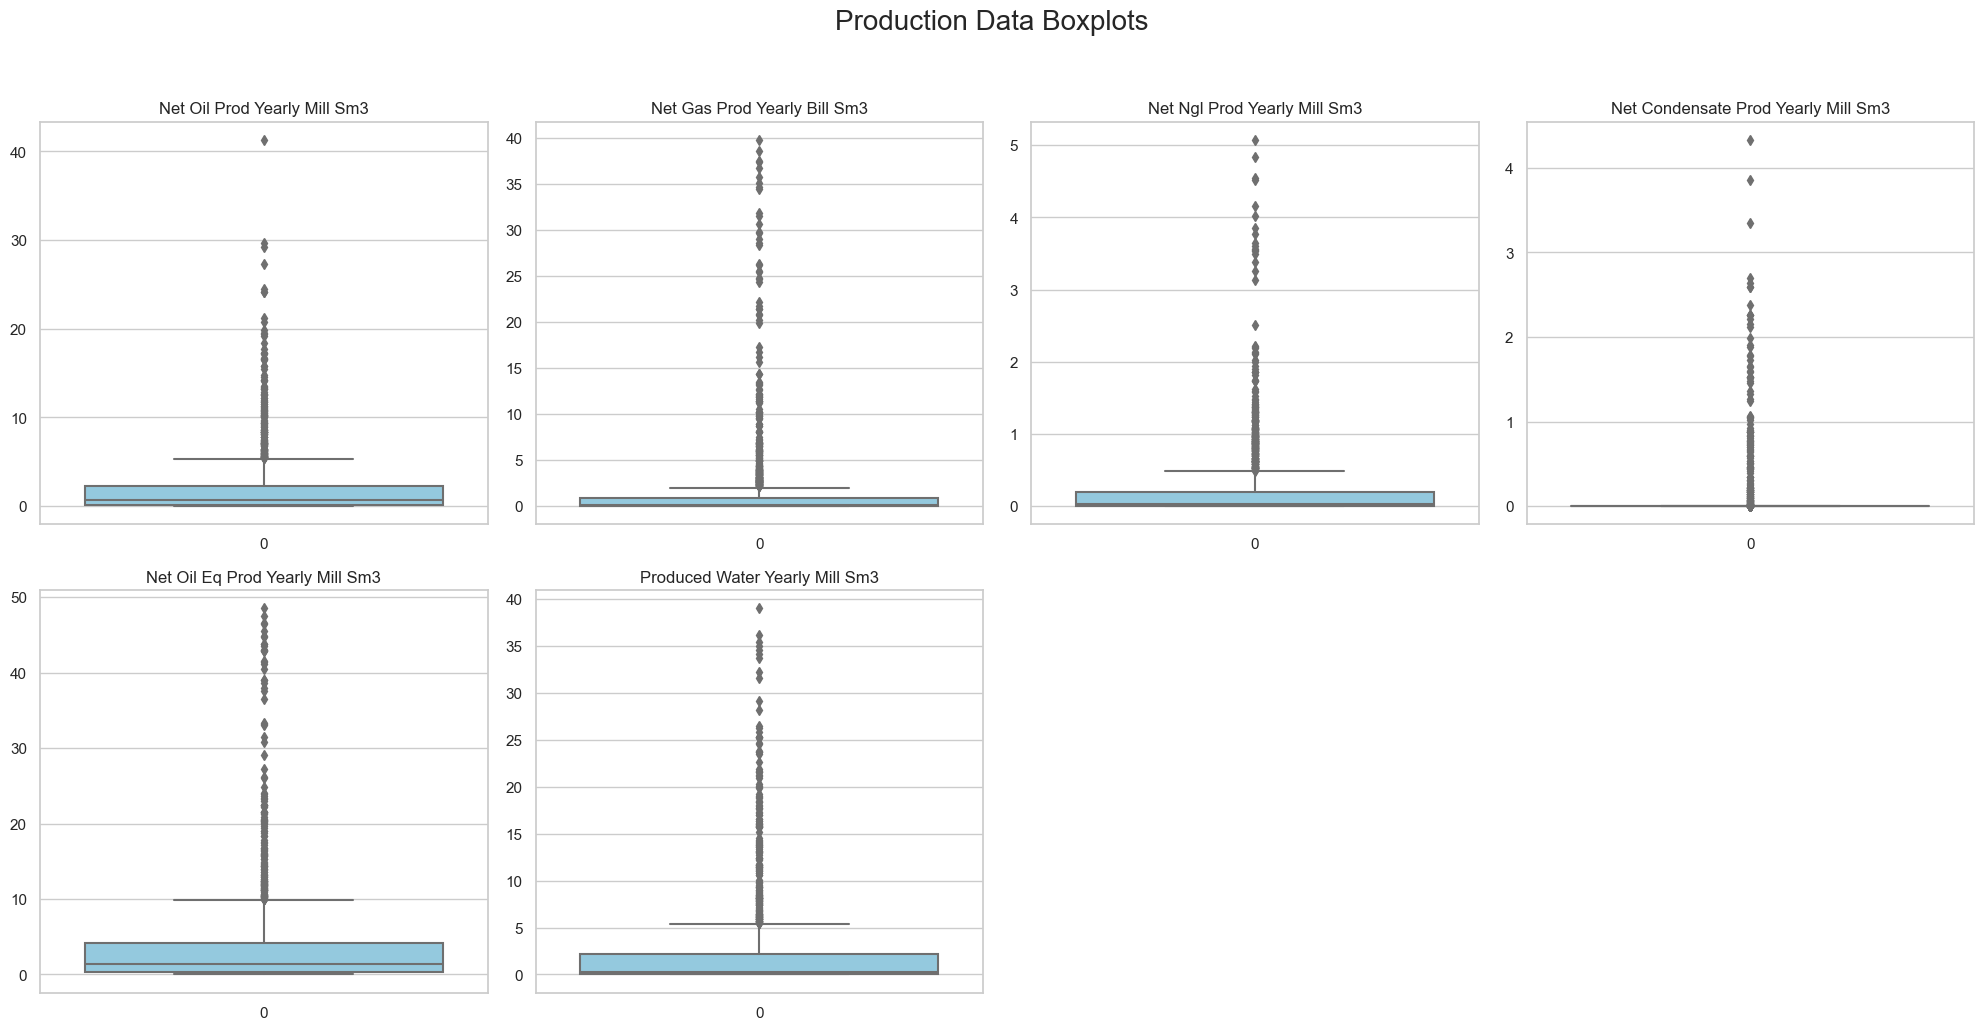

In [308]:
# Compute skewness for production features
skewness_values = cleaned_production_df.skew()
skewness_values


# Function to plot boxplots for outlier detection
def plot_boxplots(df, features, title):
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 4, i)
        sns.boxplot(df[feature], color="skyblue")
        # Convert title to title case and remove underscores
        feature = feature.replace("_", " ").title()
        plt.title(feature)
        plt.xlabel("")
        plt.ylabel("")
    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# Plot boxplots for production features
plot_boxplots(cleaned_production_df, production_features, "Production Data Boxplots")

### Emissions EDA


In [309]:
# Define Emission Data features
emission_features = [
    "yearly_co2_emissions_1000_tonnes",
    "yearly_ch4_emissions_tons",
    "yearly_nox_emissions_tons",
    "yearly_oil_spill_emissions_tons",
    "yearly_water_emissions_m3",
    "ch4_fac_emissions",
    "nox_fac_emissions",
    "co2_fac_emissions",
    "ch4_share_emissions",
    "nox_share_emissions",
    "co2_share_emissions",
    "tco2e_gwp100_tons",
    "co2e_gwp20_tons",
    "tco2e/toe_gwp100",
    "tco2e/ktoe_gwp20",
]

key_emission_features = [
    "yearly_co2_emissions_1000_tonnes",
    "tco2e_gwp100_tons",
    "co2_share_emissions",
    "tco2e/ktoe_gwp20",
]

# General statistics for emission features
emission_stats = fields_prod_emissions_1997_2023_df[emission_features].describe()
emission_stats

yearly_co2_emissions_1000_tonnes  yearly_ch4_emissions_tons  \
count                       1771.000000                1771.000000   
mean                         157.439978                 345.062731   
std                          259.823997                1025.454736   
min                            0.000000                   0.000000   
25%                            0.000000                   0.000000   
50%                           22.764700                   7.533359   
75%                          202.205230                 239.466602   
max                         1860.344868               11427.196781   

       yearly_nox_emissions_tons  yearly_oil_spill_emissions_tons  \
count                1771.000000                      1771.000000   
mean                  644.602710                        34.493302   
std                  1094.836012                       140.228410   
min                     0.000000                         0.000000   
25%                     0.000000                         0.000000   
50%                   188.230000                         0.024241   
75%                   789.754332                        11.049198   
max                  8145.884915                      4137.197766   

       yearly_water_emissions_m3  ch4_fac_emissions  nox_fac_emissions  \
count               1.771000e+03        1771.000000        1771.000000   
mean                2.607831e+06        1003.283010        1846.051474   
std                 9.088683e+06        1682.801217        1840.934950   
min                 0.000000e+00           0.000000           0.000000   
25%                 0.000000e+00         117.001575         335.885549   
50%                 1.112030e+03         384.904262        1046.648208   
75%                 6.792907e+05        1089.157675        3032.973624   
max                 7.907276e+07       11427.196781        8697.237602   

       co2_fac_emissions  ch4_share_emissions  nox_share_emissions  \
count        1771.000000          1740.000000          1740.000000   
mean          465.162966           702.263528          1309.508747   
std           430.699514          1746.802485          1972.968898   
min             0.000000             0.000000             0.000000   
25%           115.494318            24.681677           100.384806   
50%           286.610203           165.583845           514.652561   
75%           849.902348           581.256823          1612.903906   
max          2048.475425         20325.784002         16033.539766   

       co2_share_emissions  tco2e_gwp100_tons  co2e_gwp20_tons  \
count          1740.000000       1.740000e+03     1.740000e+03   
mean            320.204690       7.288872e+05     7.682139e+05   
std             460.066442       1.052256e+06     1.118293e+06   
min               0.000000       0.000000e+00     0.000000e+00   
25%              29.027957       6.571287e+04     6.981448e+04   
50%             132.446331       3.118776e+05     3.325852e+05   
75%             399.588197       9.054451e+05     9.434538e+05   
max            3718.137866       8.600204e+06     8.854328e+06   

       tco2e/toe_gwp100  tco2e/ktoe_gwp20  
count       1728.000000       1728.000000  
mean                inf               inf  
std                 NaN               NaN  
min            0.000000          0.000000  
25%            0.111189          0.116217  
50%            0.230295          0.242883  
75%            0.490188          0.513428  
max                 inf               inf

#### Emission Correlation Matrix and Scatter Plot


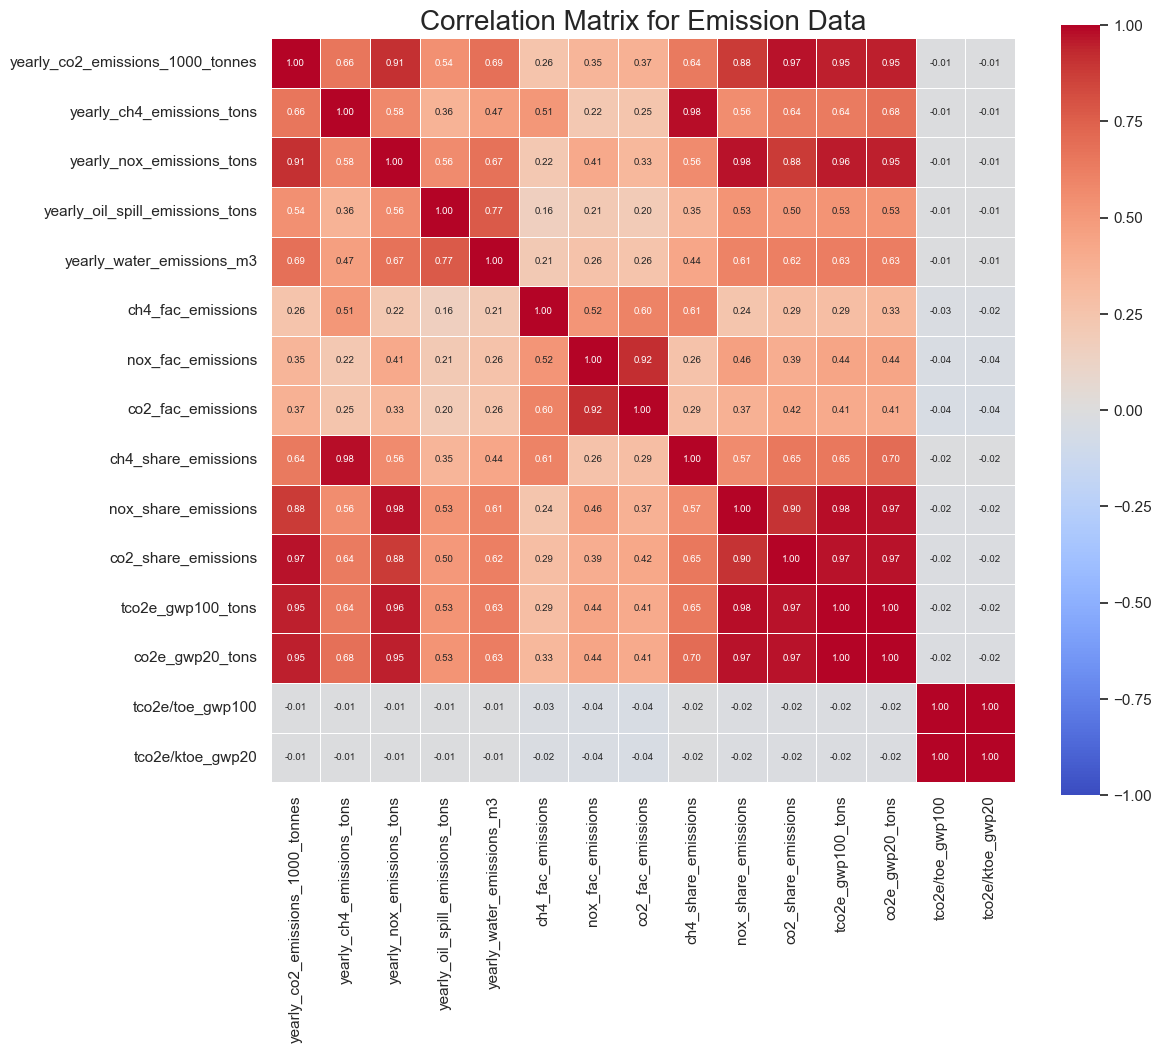

In [310]:
# Drop rows with NaN values in emission features
cleaned_emission_df = fields_prod_emissions_1997_2023_df[emission_features].dropna()

# Plot scatter matrix for emission features
# plot_scatter_matrix(
#    cleaned_emission_df, emission_features, "Emission Data Scatter Matrix"
# )

# Compute the correlation matrix for emission features
emission_corr_matrix = cleaned_emission_df.corr()

# Plot the correlation matrix for emission features
plot_correlation_matrix(emission_corr_matrix, "Correlation Matrix for Emission Data")

ValueError: num must be an integer with 1 <= num <= 12, not 13

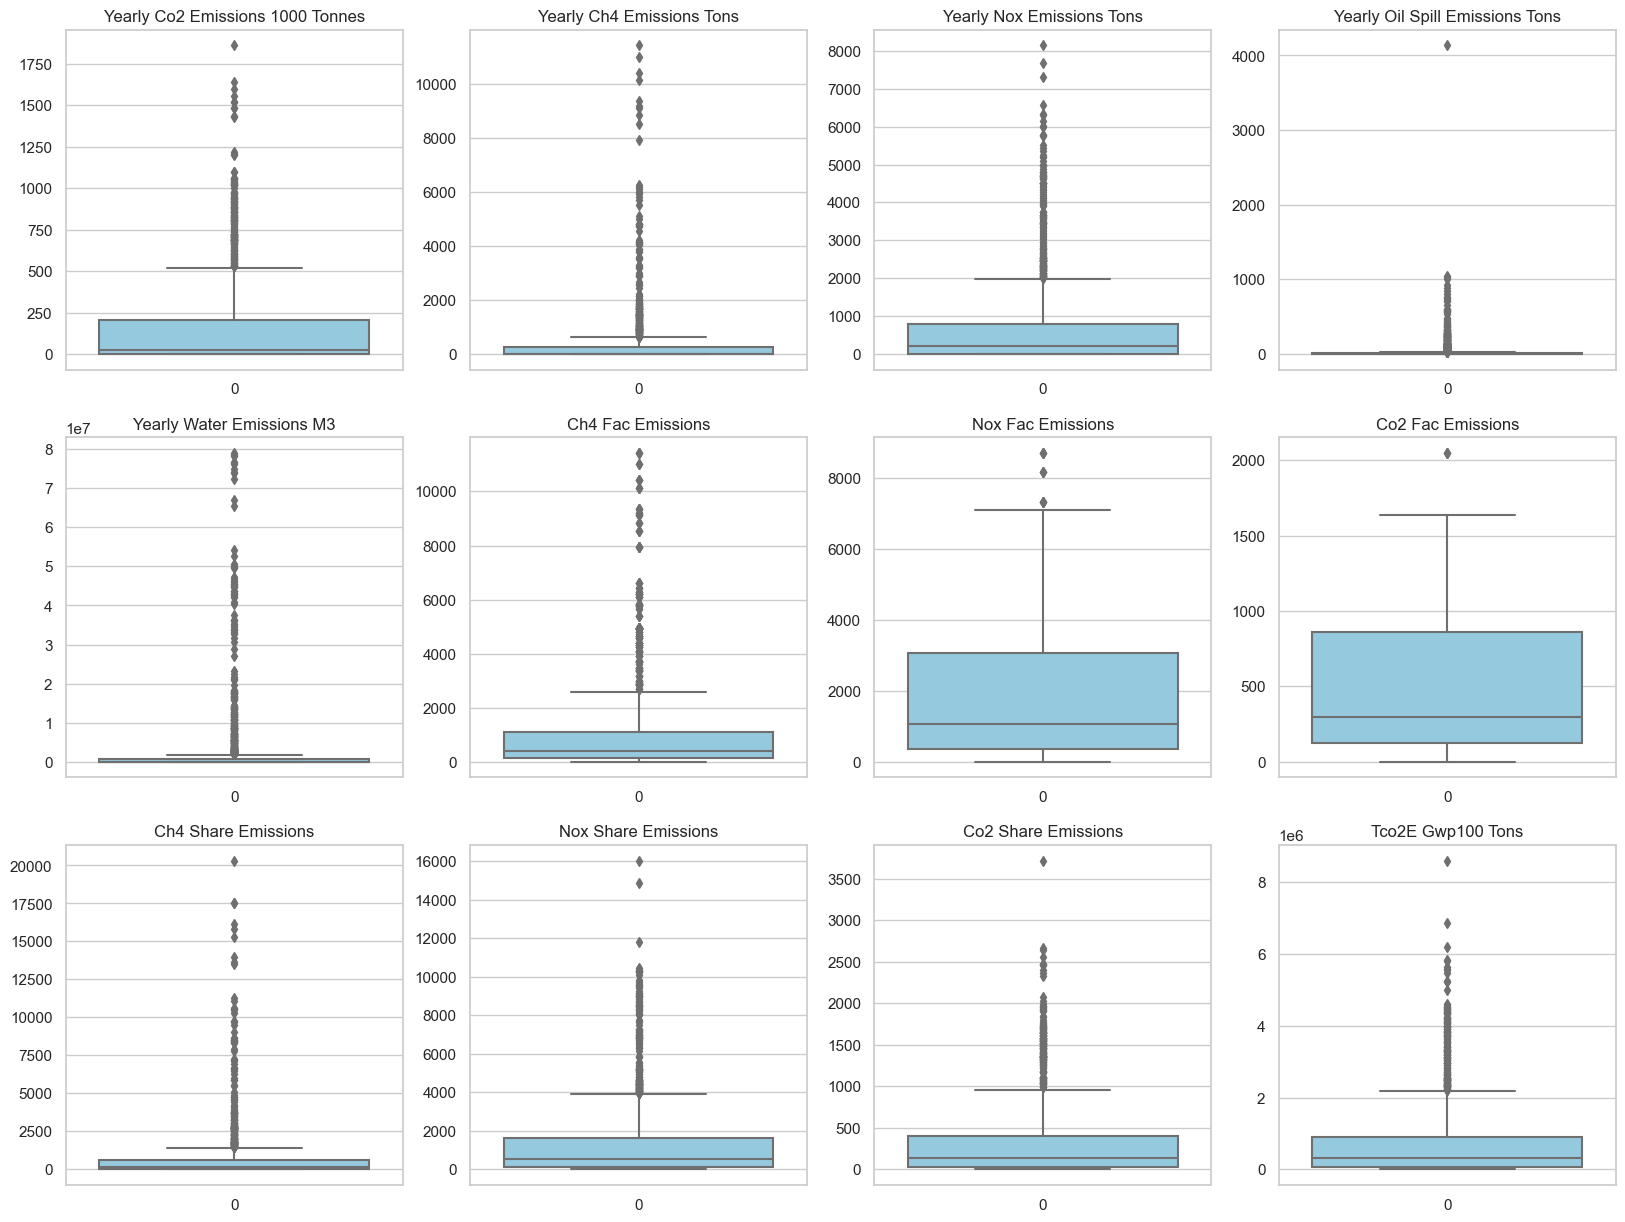

In [311]:
# Compute skewness for emission features
emission_skewness = cleaned_emission_df.skew()
emission_skewness

# Plot boxplots for emission features
plot_boxplots(cleaned_emission_df, emission_features, "Emission Data Boxplots")

In [ ]:
def plot_fields_emissions_over_time(df, features, title="Fields Emissions Over Time"):
    """
    Plots line diagrams for multiple features over time.

    Parameters:
    - df: DataFrame containing the data
    - features: List of features to plot
    - title: Title of the plot
    """
    # Set up the color palette
    num_colors = len(df["field"].unique())
    palette = sns.color_palette("tab20", num_colors)

    num_features = len(features)
    cols = 1 if num_features == 1 else 2
    rows = (num_features + 1) // 2

    plt.figure(figsize=(cols * 10, rows * 6))

    for i, feature in enumerate(features, 1):
        plt.subplot(rows, cols, i)
        sns.lineplot(
            data=df,
            x="year",
            y=feature,
            hue="field",
            palette=palette,
            marker="o",
            alpha=0.7,
            legend=False,
        )
        # Convert title to title case and remove underscores
        feature = feature.replace("_", " ").title()
        plt.title(f"{feature} from 1997 to 2023", fontsize=15)
        # Show every year on the x-axis
        plt.xticks(df["year"].unique())
        plt.xticks(rotation=45, ha="right")
        plt.xlabel("Year", fontsize=12)
        # remove underscore from the feature y label
        plt.ylabel(feature.replace("_", " ").title(), fontsize=12)
        # plt.ylabel("Emissions (1000 tonnes)", fontsize=12)
        plt.grid(True)

    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# Example usage
plot_fields_emissions_over_time(
    fields_prod_emissions_1997_2023_df,
    emission_features,
    title="Yearly Emissions of Fields Over Time",
)

### Facility and Field Characteristics EDA


In [ ]:
# Define Facility and Field Characteristics features
facility_features = [
    "facilities_lifetime_mean",
    "facilities_water_depth_mean",
    "subsea_facilites_shut_down",
    "surface_facilites_shut_down",
    "subsea_facilites_in_service",
    "surface_facilites_in_service",
    "well_final_vertical_depth_mean",
    "well_water_depth_mean",
    "electrified",
    "years_electrified",
    "electricity_mw",
]

cols_with_well_status = [
    col for col in fields_prod_emissions_1997_2023_df if "well_status_" in col
]

cols_with_well_purpose = [
    col for col in fields_prod_emissions_1997_2023_df if "well_purpose_" in col
]

cols_with_facility_kind = [
    col for col in fields_prod_emissions_1997_2023_df if "kind" in col
]

facility_features += (
    cols_with_well_status + cols_with_well_purpose + cols_with_facility_kind
)

# General statistics for facility features
facility_stats = fields_prod_emissions_1997_2023_df[facility_features].describe()
facility_stats

In [ ]:
# Printing cols_with_well_status, cols_with_well_purpose, cols_with_facility_kind, facility_features and the list constituents

print("Well Status Columns:")
print(cols_with_well_status)
print("\nWell Purpose Columns:")
print(cols_with_well_purpose)
print("\nFacility Kind Columns:")
print(cols_with_facility_kind)

####


In [ ]:
# Drop rows with NaN values in facility features
cleaned_facility_with_emissions_df = fields_prod_emissions_1997_2023_df[
    facility_features + key_emission_features
].dropna()

In [ ]:
# Plot scatter matrix for facility features
plot_scatter_matrix(
    cleaned_facility_with_emissions_df,
    facility_features,
    "Facility and Field Characteristics Scatter Matrix",
)

In [ ]:
# Plot correlation matrix for facility kind features

corr_df = fields_prod_emissions_1997_2023_df[
    cols_with_facility_kind + key_emission_features
].dropna()

plot_correlation_matrix(corr_df.corr(), "Correlation Matrix for Facility Kind Features")

In [ ]:
# Plotting well status


corr_df = fields_prod_emissions_1997_2023_df[
    cols_with_well_status + key_emission_features
].dropna()

plot_correlation_matrix(corr_df.corr(), "Correlation Matrix for Well Status")

In [ ]:
# Plotting well purpose

corr_df = fields_prod_emissions_1997_2023_df[
    cols_with_well_purpose + key_emission_features
].dropna()

plot_correlation_matrix(corr_df.corr(), "Correlation Matrix for Facility Purposes")

### Investments EDA


In [ ]:
# Define Investments and Recoverables features
investment_features = [
    "investments_mill_nok",
    "future_investments_mill_nok",
    "current_remaining_recoverable_oil",
    "current_remaining_recoverable_gas",
    "current_remaining_recoverable_ngl",
    "current_remaining_recoverable_condensate",
    "current_remaining_recoverable_oe",
    "original_recoverable_oil",
    "original_recoverable_gas",
    "original_recoverable_ngl",
    "original_recoverable_condensate",
    "original_recoverable_oe",
]

# General statistics for investment features
investment_stats = fields_prod_emissions_1997_2023_df[investment_features].describe()
investment_stats

In [ ]:
# Plot histograms for investment features
plot_histograms(
    fields_prod_emissions_1997_2023_df,
    investment_features,
    "Investments and Recoverables Histograms",
)

In [ ]:
# Drop rows with NaN values in investment features
cleaned_investment_df = fields_prod_emissions_1997_2023_df[
    investment_features + key_emission_features
].dropna()


# Plot scatter matrix for investment features
plot_scatter_matrix(
    cleaned_investment_df,
    investment_features,
    "Investments and Recoverables Scatter Matrix",
)

# Compute the correlation matrix for investment features
investment_corr_matrix = cleaned_investment_df.corr()

# Plot the correlation matrix for investment features
plot_correlation_matrix(
    investment_corr_matrix,
    "Correlation Matrix for Investments and Recoverables",
)

In [ ]:
# Compute skewness for investment features

investment_skewness = cleaned_investment_df.skew()


plot_boxplots(
    cleaned_investment_df,
    investment_features,
    "Investments and Recoverables Boxplots",
)

In [ ]:
# Plot
plt.figure(figsize=(10, 6))

# Setting x as the average production across fields
net_oil_prod_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_oil_prod_yearly_mill_sm3"]
    .sum()
    .index
)
net_oil_prod_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_oil_prod_yearly_mill_sm3"]
    .sum()
    .values
)

net_gas_prod_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_gas_prod_yearly_bill_sm3"]
    .sum()
    .index
)
net_gas_prod_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_gas_prod_yearly_bill_sm3"]
    .sum()
    .values
)

net_ngl_prod_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_ngl_prod_yearly_mill_sm3"]
    .sum()
    .index
)
net_ngl_prod_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_ngl_prod_yearly_mill_sm3"]
    .sum()
    .values
)

net_oil_eq_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "net_oil_eq_prod_yearly_mill_sm3"
    ]
    .sum()
    .index
)
net_oil_eq_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "net_oil_eq_prod_yearly_mill_sm3"
    ]
    .sum()
    .values
)


plt.plot(net_oil_prod_x, net_oil_prod_y, color="#00338D", linewidth=2)  # Dark blue
plt.plot(net_gas_prod_x, net_gas_prod_y, color="#000000", linewidth=2)  # Black
plt.plot(net_ngl_prod_x, net_ngl_prod_y, color="#D3D3D3", linewidth=2)  # Light gray
plt.plot(net_oil_eq_x, net_oil_eq_y, color="#00A1DE", linewidth=2)  # Light blue

# Titles and labels
plt.title(
    "Total Yearly Oil Eq. Production (Million $sm^3$)",
    fontsize=16,
    fontweight="bold",
    color="#00338D",
)
plt.xlabel("Years", fontsize=14, color="#00338D")
plt.ylabel("Million $sm^3$", fontsize=14, color="#00338D")

# Customizing ticks
plt.xticks(fontsize=12, color="#00338D")
plt.yticks(fontsize=12, color="#00338D")

# Legend
plt.legend(
    [
        "Net Oil Production",
        "Net Gas Production (Billion $sm^3$)",
        "Net NGL Production",
        "Net Oil Eq. Production",
    ],
    loc="upper right",
    fontsize=12,
)

# Grid and layout
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Plotting the emissions for co2 and ch4

plt.figure(figsize=(10, 6))

# Setting x as the average production across fields
co2_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "yearly_co2_emissions_1000_tonnes"
    ]
    .sum()
    .index
)
co2_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "yearly_co2_emissions_1000_tonnes"
    ]
    .sum()
    .values
)

ch4_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["yearly_ch4_emissions_tons"]
    .sum()
    .index
)
ch4_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["yearly_ch4_emissions_tons"]
    .sum()
    .values
)

# Multiplying the ch4 emissions by 25 to get the equivalent in CO2 emissions
# ch4_x = ch4_x * 25

plt.plot(co2_x, co2_y, color="#00338D", linewidth=2)  # Red
plt.plot(ch4_x, ch4_y, color="#000000", linewidth=2)  # Green

# Titles and labels
plt.title(
    "Total Yearly Reported CO2 and CH4 Emissions",
    fontsize=16,
    fontweight="bold",
    color="#00338D",
)
plt.xlabel("Years", fontsize=14, color="#00338D")
plt.ylabel("Tons", fontsize=14, color="#00338D")

# Customizing ticks to be every year
plt.xticks(fontsize=10, color="#00338D", rotation=30)
plt.yticks(fontsize=12, color="#00338D")

# X axis show every year
plt.xticks(np.arange(1997, 2024, 1))

# Legend
plt.legend(["CO2 Emissions", "CH4 Emissions"], loc="upper right", fontsize=12)

# Grid and layout
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# describing the reserve columns

reserve_cols = [
    "current_remaining_recoverable_oil",
    "current_remaining_recoverable_gas",
    "current_remaining_recoverable_ngl",
    "current_remaining_recoverable_condensate",
    "current_remaining_recoverable_oe",
    "original_recoverable_oil",
    "original_recoverable_gas",
    "original_recoverable_ngl",
    "original_recoverable_condensate",
    "original_recoverable_oe",
]

fields_prod_emissions_1997_2023_df[reserve_cols].describe()

In [ ]:
# Total yearly oe production in million sm3

total_oe_production = fields_prod_emissions_1997_2023_df.groupby("year")[
    "net_oil_eq_prod_yearly_mill_sm3"
].sum()

# Calculating the total original original_recoverable_oe by counting each field once
total_original_recoverable_oe = (
    fields_prod_emissions_1997_2023_df[["field", "original_recoverable_oe"]]
    .drop_duplicates()["original_recoverable_oe"]
    .sum()
)


display(total_oe_production)
display(total_original_recoverable_oe)

# Cumaulative sum the production from total_oe_production and for each year subtract it from the total_original_recoverable_oe
# to get the remaining recoverable oe for each year

remaining_recoverable_oe = total_original_recoverable_oe - total_oe_production.cumsum()
display(remaining_recoverable_oe)

In [ ]:
# Sum of current remaining recoverable oe

# Calculating the total original original_recoverable_oe by counting each field once
total_remaining_recoverable_oe = (
    fields_prod_emissions_1997_2023_df[["field", "current_remaining_recoverable_oe"]]
    .drop_duplicates()["current_remaining_recoverable_oe"]
    .sum()
)

# sm3 to toe : 1 sm3 = 0.84 toe
print(
    f"Remaining Recoverable Oil Eq.: {total_remaining_recoverable_oe*0.84} million toe"
)


# 5.80 mmbtu/barrel × 20.31 kg C/mmbtu × 44 kg CO2/12 kg C × 1 metric ton/1,000 kg = 0.43 metric tons CO2/barrel =  0.43 x 7.49 = 0.36 metric tons CO2/toe
# Using this conversion rate, calculate th amount of CO2 the remaining recoverable oe can produce

remaining_recoverable_oe_co2 = total_remaining_recoverable_oe * 1000000 * 0.36 * 0.84

print(
    f"CO2 Potential by burning remaining recoverable reserves: {(remaining_recoverable_oe_co2/1000000000).round(2)} GtCO2"
)

In [ ]:
# Remaining recoverable gas
# Calculating the total original original_recoverable_gas by counting each field once
total_original_recoverable_gas = (
    fields_prod_emissions_1997_2023_df[["field", "original_recoverable_gas"]]
    .drop_duplicates()["original_recoverable_gas"]
    .sum()
)

# Calculating the total original original_recoverable_gas by counting each field once
total_remaining_recoverable_gas = (
    fields_prod_emissions_1997_2023_df[["field", "current_remaining_recoverable_gas"]]
    .drop_duplicates()["current_remaining_recoverable_gas"]
    .sum()
)

print("Remaining Recoverable Gas")
print(f"Original Recoverable Gas: {total_original_recoverable_gas} billion sm3")
print(f"Remaining Recoverable Gas: {total_remaining_recoverable_gas} billion sm3")

In [ ]:
# Remaining recoverable NGL
# Calculating the total original original_recoverable_ngl by counting each field once
total_original_recoverable_ngl = (
    fields_prod_emissions_1997_2023_df[["field", "original_recoverable_ngl"]]
    .drop_duplicates()["original_recoverable_ngl"]
    .sum()
)

# Calculating the total original original_recoverable_ngl by counting each field once
total_remaining_recoverable_ngl = (
    fields_prod_emissions_1997_2023_df[["field", "current_remaining_recoverable_ngl"]]
    .drop_duplicates()["current_remaining_recoverable_ngl"]
    .sum()
)

print("Remaining Recoverable NGL")
print(f"Original Recoverable NGL: {total_original_recoverable_ngl} million sm3")
print(f"Remaining Recoverable NGL: {total_remaining_recoverable_ngl} million sm3")

In [ ]:
# Remaining recoverable oil
# Calculating the total original original_recoverable_oil by counting each field once
total_original_recoverable_oil = (
    fields_prod_emissions_1997_2023_df[["field", "original_recoverable_oil"]]
    .drop_duplicates()["original_recoverable_oil"]
    .sum()
)

# Calculating the total original original_recoverable_oil by counting each field once
total_remaining_recoverable_oil = (
    fields_prod_emissions_1997_2023_df[["field", "current_remaining_recoverable_oil"]]
    .drop_duplicates()["current_remaining_recoverable_oil"]
    .sum()
)

print("Remaining Recoverable Oil")
print(f"Original Recoverable Oil: {total_original_recoverable_oil} million sm3")
print(f"Remaining Recoverable Oil: {total_remaining_recoverable_oil} million sm3")

In [ ]:
# Plotting the remaining_recoverable_oe over time

plt.figure(figsize=(10, 6))

plt.plot(
    remaining_recoverable_oe.index,
    remaining_recoverable_oe.values,
    color="#00338D",
    linewidth=2,
)

# Titles and labels
plt.title(
    "Remaining Recoverable Oil Eq. Reserves on the Norwegian Continental Shelf (1997-2023)",
    fontsize=16,
    fontweight="bold",
    color="#00338D",
)

plt.xlabel("Years", fontsize=14, color="#00338D")
plt.ylabel("Million $sm^3$", fontsize=14, color="#00338D")

# Customizing ticks
plt.xticks(fontsize=12, color="#00338D")
plt.yticks(fontsize=12, color="#00338D")

# Grid and layout
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Pie chart showing the current remaining recoverable oe as of total original recoverable oe

# OE
remaining_recoverable_oe_percentage = (
    total_remaining_recoverable_oe / total_original_recoverable_oe
)

# Gas
remaining_recoverable_gas_percentage = (
    total_remaining_recoverable_gas / total_original_recoverable_gas
)

# Oil
remaining_recoverable_oil_percentage = (
    total_remaining_recoverable_oil / total_original_recoverable_oil
)

# NGL
remaining_recoverable_ngl_percentage = (
    total_remaining_recoverable_ngl / total_original_recoverable_ngl
)

In [ ]:
pie_main = [
    remaining_recoverable_oe_percentage * 100,
    100 - 100 * remaining_recoverable_oe_percentage,
]

pie_oil = [
    remaining_recoverable_oil_percentage * 100,
    100 - 100 * remaining_recoverable_oil_percentage,
]
pie_gas = [
    remaining_recoverable_gas_percentage * 100,
    100 - 100 * remaining_recoverable_gas_percentage,
]
pie_ngl = [
    remaining_recoverable_ngl_percentage * 100,
    100 - 100 * remaining_recoverable_ngl_percentage,
]

# Data for the main pie chart
labels_main = ["Remaining", "Depleted"]
# colors_main = ["#404040", "#0A76DB"]  # Professional color palette
# colors_main = ["#0A76DB", "#404040"]  # Professional color palette
colors_main = ["#F68B1E", "#EBEBEB"]  # Professional color palette
explode_main = (0.1, 0)  # Explode the remaining slice

labels_smaller = ["Remaining", "Depleted"]
# colors_smaller = ["#404040", "#0A76DB"]  # Professional color palette
# colors_smaller = ["#0A76DB", "#404040"]  # Professional color palette
colors_smaller = ["#F68B1E", "#EBEBEB"]  # Professional color palette
explode_smaller = (0.1, 0)

# Plotting the main pie chart and the smaller ones
fig, axs = plt.subplots(
    1, 4, figsize=(20, 7), gridspec_kw={"width_ratios": [3, 1, 1, 1]}
)

fig.suptitle(
    "Norwegian Fossil Fuel Reserves (Current Open Fields)", fontsize=20, color="white"
)

# Main pie chart
axs[0].pie(
    pie_main,
    explode=explode_main,
    labels=labels_main,
    colors=colors_main,
    autopct="%1.0f%%",
    startangle=120,
    textprops={"color": "#EBEBEB", "fontsize": 14},
    wedgeprops=dict(edgecolor="#003366"),
)
axs[0].add_artist(plt.Circle((0, 0), 0.5, fc="#003366"))
axs[0].set_title("Overall in Oil Equivalents", fontsize=16, color="white", pad=20)
axs[0].axis("equal")

# Smaller pie chart 1
axs[1].pie(
    pie_oil,
    explode=explode_smaller,
    labels=labels_smaller,
    colors=colors_smaller,
    autopct="%1.0f%%",
    startangle=120,
    textprops={"color": "#EBEBEB", "fontsize": 14},
    wedgeprops=dict(edgecolor="#003366"),
)
axs[1].add_artist(plt.Circle((0, 0), 0.3, fc="#003366"))
axs[1].axis("equal")
axs[1].set_title("Oil ", fontsize=16, color="white")

# Smaller pie chart 2
axs[2].pie(
    pie_gas,
    explode=explode_smaller,
    labels=labels_smaller,
    colors=colors_smaller,
    autopct="%1.0f%%",
    startangle=120,
    textprops={"color": "#EBEBEB", "fontsize": 14},
    wedgeprops=dict(edgecolor="#003366"),
)
axs[2].add_artist(plt.Circle((0, 0), 0.3, fc="#003366"))
axs[2].axis("equal")
axs[2].set_title("Gas", fontsize=16, color="white")

# Smaller pie chart 3
axs[3].pie(
    pie_ngl,
    explode=explode_smaller,
    labels=labels_smaller,
    colors=colors_smaller,
    textprops={"color": "#EBEBEB", "fontsize": 14},
    autopct="%1.0f%%",
    startangle=120,
    wedgeprops=dict(edgecolor="#003366"),
)
axs[3].add_artist(plt.Circle((0, 0), 0.30, fc="#003366"))
axs[3].axis("equal")
axs[3].set_title("NGL", fontsize=16, color="white")

# set background for whole visual to dark blue
fig.patch.set_facecolor("#003366")

# Adjust layout
plt.tight_layout()

plt.show()

# mckinsey orange = #F68B1E

In [ ]:
# Calculating the average CO2 intensity per oil equivalent production in 2023
# calculating the average CO2 intensity per oil equivalent production for each year

yearly_emission_intensity = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "yearly_co2_emissions_1000_tonnes"
    ].sum()
    * 1000
) / (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "net_oil_eq_prod_yearly_mill_sm3"
    ].sum()
    * 1000
    / 1.18
)


print(
    f"Annual Carbon Emission Intensity for Norwegian Oil Eq. Production (kgCO2/toe):\n {yearly_emission_intensity}"
)

In [ ]:
# Plotting the Annual Carbon Emission Intensity for Norwegian Oil Eq. Production (kgCO2/toe):

text_color = "#EBEBEB"
background_color = "#003366"
line_1_color = "#F68B1E"

plt.figure(figsize=(10, 6))

# Setting x as the average production across fields
intensity_x = yearly_emission_intensity.index
intensity_y = yearly_emission_intensity.values

plt.plot(intensity_x, intensity_y, color=line_1_color, linewidth=2)  # Orange
# Titles and labels
plt.title(
    "Annual Emission Intensity for Norwegian Oil Eq. Production $(kgCO_2/toe)$",
    fontsize=16,
    fontweight="bold",
    color=text_color,
)

# X axis show every year
plt.xticks(np.arange(1997, 2024, 1))

# Customizing ticks
plt.xticks(fontsize=10, color=text_color, rotation=30)
plt.yticks(fontsize=12, color=text_color)

plt.xlabel("Years", fontsize=10, color=text_color)

plt.ylabel("$kgCO_2/toe$", fontsize=14, color=text_color)

# Grid and layout
plt.grid(True, which="both", linestyle=":", linewidth=0.25)
plt.tight_layout()

# dark blue backround
plt.gca().patch.set_facecolor("#003366")
plt.gcf().patch.set_facecolor("#003366")

# Show plot
plt.show()

#### Conversion of toe to boe

$ 1 toe = 7.49 boe $


In [ ]:
print(
    f"Annual Carbon Emission Intensity for Norwegian Oil Eq. Production (kgCO2/boe): \n {yearly_emission_intensity/7.49}"
)

In [ ]:
# Assuming `yearly_emission_intensity` and `fields_prod_emissions_1997_2023_df` are already loaded

# Plotting the kgCO2/boe for each year
plt.figure(figsize=(14, 8))

# Setting x as the average production across fields
co2_intensity_x = yearly_emission_intensity.index
co2_intensity_y = yearly_emission_intensity.values / 7.49

# Plot CO2 intensity on the primary y-axis
plt.plot(
    co2_intensity_x,
    co2_intensity_y,
    color="#00338D",
    linewidth=2,
    label="CO2 Intensity (kgCO2/boe)",
)

# Titles and labels
plt.title(
    "Annual CO2 Intensity for Norwegian Oil Eq. Production (kgCO2/boe)",
    fontsize=16,
    fontweight="bold",
    color="#00338D",
    pad=20,
)

# Left y-axis label
plt.ylabel("CO2 Intensity (kgCO2/boe)", fontsize=14, color="#00338D")

# Customizing x-axis
plt.xticks(fontsize=12, color="#00338D", rotation=30)
plt.xlabel("Years", fontsize=14, color="#00338D")

# Grid and layout
plt.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray")
plt.tight_layout()

# Create a right-hand y-axis for production
ax2 = plt.twinx()

# Plot production on the secondary y-axis
production_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "net_oil_eq_prod_yearly_mill_sm3"
    ].sum()
    * 1000000
    / (7.49 * 365)
)

ax2.plot(
    co2_intensity_x,
    production_y,
    color="#000000",
    linewidth=2,
    linestyle="--",
    label="Production (million boe/day)",
)
ax2.set_ylabel("Production (million boe/day)", fontsize=14, color="#000000")
# Show every year
plt.xticks(np.arange(1997, 2024, 1))

# Customizing secondary y-axis ticks
ax2.tick_params(axis="y", labelcolor="#000000", labelsize=12)

# Adding legends
plt.legend(loc="upper left", fontsize=12)
# ax2.legend(loc="upper right", fontsize=12)

# Show plot
plt.show()

In [ ]:
# Assuming `yearly_emission_intensity` and `fields_prod_emissions_1997_2023_df` are already loaded

# Plotting the kgCO2/boe for each year
plt.figure(figsize=(14, 8))

# Setting x as the average production across fields
co2_intensity_x = yearly_emission_intensity.index
co2_intensity_y = yearly_emission_intensity.values / 7.49

# Plot CO2 intensity on the primary y-axis
plt.plot(
    co2_intensity_x,
    co2_intensity_y,
    color="#00338D",
    linewidth=2,
    label="CO2 Intensity (kgCO2/boe)",
)

# Titles and labels
plt.title(
    "Annual CO2 Intensity for Norwegian Oil Eq. Production (kgCO2/boe)",
    fontsize=16,
    fontweight="bold",
    color="#00338D",
    pad=20,
)

# Left y-axis label
plt.ylabel("CO2 Intensity (kgCO2/boe)", fontsize=14, color="#00338D")

# Customizing x-axis
plt.xticks(fontsize=12, color="#00338D", rotation=30)
plt.xlabel("Years", fontsize=14, color="#00338D")

# Plot production on the secondary y-axis
production_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "net_oil_eq_prod_yearly_mill_sm3"
    ].sum()
    * 1000000
    / (7.49 * 365)
)

# Show every year
plt.xticks(np.arange(1997, 2024, 1))

# Show plot
plt.show()

In [ ]:
# Plotting the co2e emissions
plt.figure(figsize=(14, 8))

# Setting x as the average production across fields
co2e_gwp100_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["tco2e_gwp100_tons"].sum().index
)
co2e_gwp100_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["tco2e_gwp100_tons"].sum().values
    / 1000000
)

co2e_gwp20_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["co2e_gwp20_tons"].sum().index
)
co2e_gwp20_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["co2e_gwp20_tons"].sum().values
    / 1000000
)

plt.plot(co2e_gwp100_x, co2e_gwp100_y, color="#00338D", linewidth=2)
plt.plot(co2e_gwp20_x, co2e_gwp20_y, color="#000000", linewidth=2)

# Titles and labels
plt.title(
    "Annual CO2 Equivalent Emissions",
    fontsize=16,
    fontweight="bold",
    color="#00338D",
    pad=20,
)

# Labels GWP 100 and GWP 20
plt.xlabel("Years", fontsize=14, color="#00338D")
plt.ylabel("$MtCO_2e$", fontsize=14, color="#00338D")

# Customizing ticks
plt.xticks(fontsize=10, color="#00338D")
plt.yticks(fontsize=12, color="#00338D")

# Legend
plt.legend(
    ["$MtCO_2e$ Emissions (GWP 100)", "$MtCO_2e$ Emissions (GWP 20)"],
    loc="upper right",
    fontsize=12,
)

# Adding a short horizontal line for the running average every 5 years

# Average for 1997-2001
avg_1997_2001 = co2e_gwp100_y[:5].mean()
plt.hlines(
    y=avg_1997_2001, xmin=1997, xmax=2002, color="gray", linestyle="--", linewidth=1
)
plt.text(
    1999,
    avg_1997_2001 + 0.1,
    f"Avg. 1997-2001: {avg_1997_2001.round(1)}",
    color="black",
    fontsize=12,
)

# Average for 2002-2006
avg_2002_2006 = co2e_gwp100_y[5:10].mean()
plt.hlines(
    y=avg_2002_2006, xmin=2002, xmax=2007, color="gray", linestyle="--", linewidth=1
)
plt.text(
    2004,
    avg_2002_2006 + 0.1,
    f"Avg. 2002-2006: {avg_2002_2006.round(1)}",
    color="black",
    fontsize=12,
)

# Average for 2007-2011
avg_2007_2011 = co2e_gwp100_y[10:15].mean()
plt.hlines(
    y=avg_2007_2011, xmin=2007, xmax=2012, color="gray", linestyle="--", linewidth=1
)
plt.text(
    2009,
    avg_2007_2011 + 0.1,
    f"Avg. 2007-2011: {avg_2007_2011.round(1)}",
    color="black",
    fontsize=12,
)

# Average for 2012-2016
avg_2012_2016 = co2e_gwp100_y[15:20].mean()
plt.hlines(
    y=avg_2012_2016, xmin=2012, xmax=2017, color="gray", linestyle="--", linewidth=1
)
plt.text(
    2014,
    avg_2012_2016 + 0.1,
    f"Avg. 2012-2016: {avg_2012_2016.round(1)}",
    color="black",
    fontsize=12,
)

# Average for 2017-2021
avg_2017_2021 = co2e_gwp100_y[20:].mean()
plt.hlines(
    y=avg_2017_2021, xmin=2017, xmax=2022, color="gray", linestyle="--", linewidth=1
)
plt.text(
    2019,
    avg_2017_2021 + 0.1,
    f"Avg. 2017-2021: {avg_2017_2021.round(1)}",
    color="black",
    fontsize=12,
)

plt.xticks(np.arange(1997, 2024, 1), rotation=30)

# Grid and layout
plt.grid(True, which="both", linestyle="--", linewidth=0.5, color="gray")
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Plotting yearly production in oil equivalent, oil, ndl, gas and condensate

plt.figure(figsize=(10, 6))

# Setting x as the average production across fields
oe_production_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "net_oil_eq_prod_yearly_mill_sm3"
    ]
    .sum()
    .index
)
oe_production_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "net_oil_eq_prod_yearly_mill_sm3"
    ]
    .sum()
    .values
)

oil_prod_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_oil_prod_yearly_mill_sm3"]
    .sum()
    .index
)

oil_prod_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_oil_prod_yearly_mill_sm3"]
    .sum()
    .values
)

ngl_prod_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_ngl_prod_yearly_mill_sm3"]
    .sum()
    .index
)

ngl_prod_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_ngl_prod_yearly_mill_sm3"]
    .sum()
    .values
)

gas_prod_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_gas_prod_yearly_bill_sm3"]
    .sum()
    .index
)

gas_prod_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")["net_gas_prod_yearly_bill_sm3"]
    .sum()
    .values
)

condensate_prod_x = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "net_condensate_prod_yearly_mill_sm3"
    ]
    .sum()
    .index
)

condensate_prod_y = (
    fields_prod_emissions_1997_2023_df.groupby("year")[
        "net_condensate_prod_yearly_mill_sm3"
    ]
    .sum()
    .values
)

plt.plot(oe_production_x, oe_production_y, color="#00338D", linewidth=2)  # Dark blue
plt.plot(oil_prod_x, oil_prod_y, color="#000000", linewidth=2)  # Black
plt.plot(ngl_prod_x, ngl_prod_y, color="#D3D3D3", linewidth=2)  # Light gray
plt.plot(gas_prod_x, gas_prod_y, color="#00A1DE", linewidth=2)  # Light blue
plt.plot(condensate_prod_x, condensate_prod_y, color="#FFD700", linewidth=2)  # Gold

# Titles and labels
plt.title(
    "Total Yearly Oil Equivalent Production",
    fontsize=16,
    fontweight="bold",
    color="#00338D",
)

plt.xlabel("Years", fontsize=14, color="#00338D")

plt.ylabel("Million $sm^3$", fontsize=14, color="#00338D")

# Customizing ticks
plt.xticks(fontsize=12, color="#00338D")
plt.yticks(fontsize=12, color="#00338D")

# Grid and layout
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Legend
plt.legend(
    [
        "Net Oil Equivalent Production",
        "Net Oil Production",
        "Net NGL Production",
        "Net Gas Production",
        "Net Condensate Production",
    ],
    loc="upper right",
    fontsize=12,
)

# Show plot
plt.show()

### Data Export


In [ ]:
# Exporting the dataframe to a csv file unless the file exists, check if the export is successful

filename_path = "../../data/output/emissions_and_production/cleaned/fields_prod_emissions_intensities_1997_2023.csv"

if not os.path.exists(filename_path):
    fields_prod_emissions_1997_2023_df.to_csv(filename_path, index=False)
    print("Saved file")
else:
    print("File already exists")